In [1]:
import fnmatch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from ipywidgets import interactive
import numpy as np
import os
import glob
from scipy.ndimage import gaussian_filter as smooth
import platform

%run sessionlists
from VIGOR_utils import *
from VIGOR_plotting import *
from VIGOR_MODELS_Functions import *

plt.style.use('./Figures/paper.mplstyle')

In [598]:
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43']
            
alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))
vars = alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R
names = 'alpha', 'alpha_t', 'alpha_R', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t', 'mu_R', 'sigma', 'sigma_t', 'sigma_R'

In [599]:
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
              'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
              'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43']

intact = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43']

lesion = ['RatF30', 'RatF31', 'RatM30', 'RatF40', 'RatF41', 'RatM41', 'RatM42']


brainstatus = {'RatF00': 'normal', 'RatF01': 'normal', 'RatF02': 'normal',
               'RatM00': 'normal', 'RatM01': 'normal', 'RatM02': 'normal',
               'RatF30': 'DLS', 'RatF31': 'DLS', 'RatF32': 'normal', 'RatF33': 'normal',
               'RatM30': 'DLS', 'RatM31': 'normal', 'RatM32': 'normal',
               'RatF40': 'DLS', 'RatF41': 'DMS', 'RatF42': 'normal',
               'RatM40': 'normal', 'RatM41': 'DLS', 'RatM42': 'DMS', 'RatM43': 'normal'}


rat_markers = {}
intact_map = plt.cm.get_cmap('winter')
lesion_map = plt.cm.get_cmap('autumn')

markers = {'normal': 'o', 'DLS': 'X', 'DMS': 'x'}
lines = {'normal': '-', 'DLS': '-', 'DMS': '-'}
colormaps = {'normal': intact_map, 'DLS': lesion_map, 'DMS': lesion_map}

for index, animal in enumerate(animalList):
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[colormaps[brainstatus[animal]](index/len(animalList)), 'd', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[colormaps[brainstatus[animal]](index/len(animalList)), 's', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")


0.017212671290369307 0.00820976467420011 0.6770661676307556


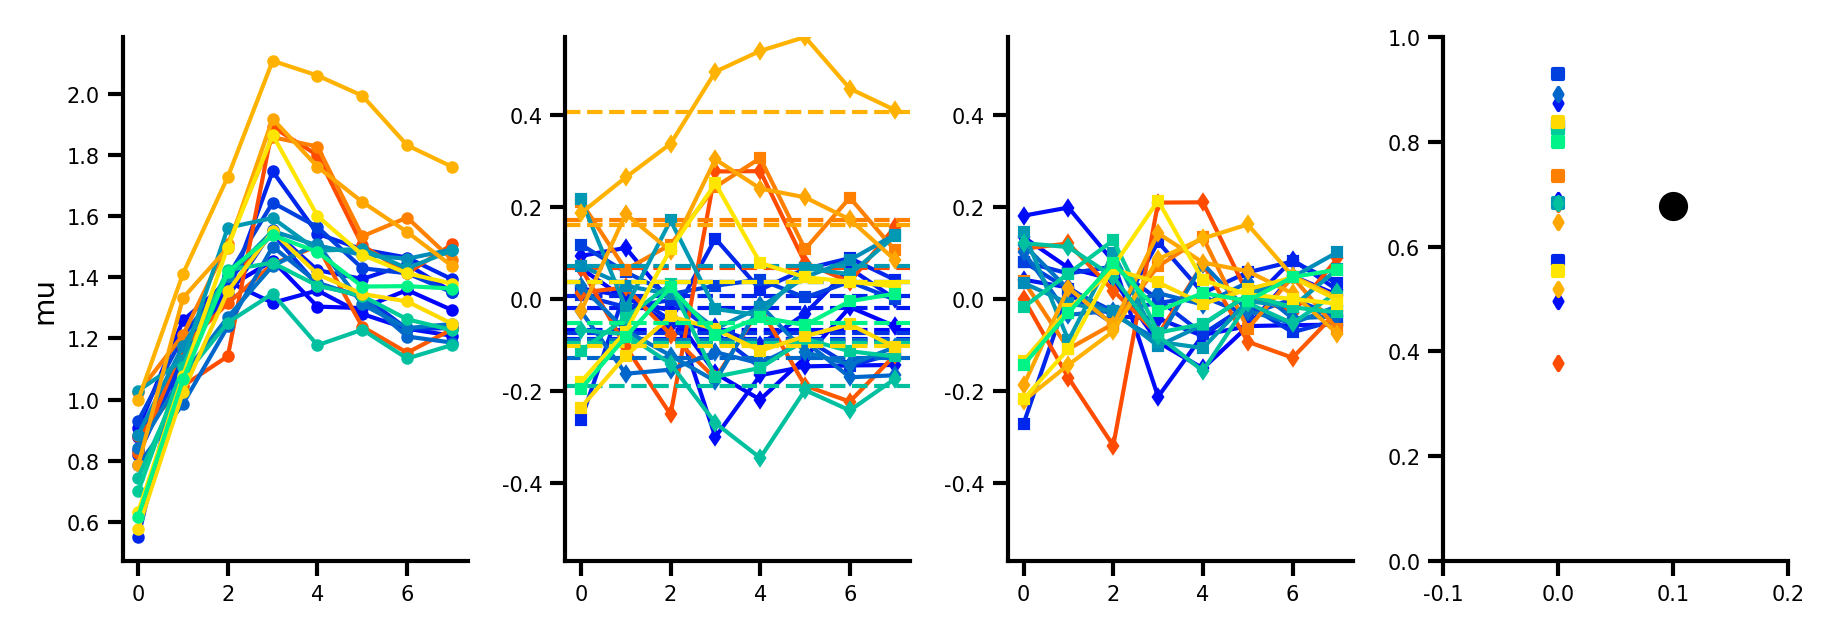

{'RatF00': -0.06769765129053583, 'RatF01': -0.08749952640463406, 'RatF02': -0.018937943439300383, 'RatM00': 0.0072335486862092, 'RatM01': -0.07283586491015855, 'RatM02': 0.037322847000926036, 'RatF30': 0.06763717317427134, 'RatF31': -0.09533590593605536, 'RatF32': -0.12800694579346142, 'RatF33': -0.08934533455000636, 'RatM30': 0.17217598349872745, 'RatM31': 0.037631367749423106, 'RatM32': 0.07111429684248663, 'RatF40': 0.16056946332919925, 'RatF41': 0.4070317171397898, 'RatF42': -0.18891111709927208, 'RatM40': -0.0955226158991658, 'RatM41': -0.10170397484393008, 'RatM42': 0.03743395497210594, 'RatM43': -0.05235347222662124}


In [600]:
def do_stuff(var, name='', animalList=animalList):
    fig, axs = plt.subplots(1, 4, figsize=(6, 2))

    conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]

    expected_60 = np.mean([var[animal]["60"] for animal in animalList])
    expected_90 = np.mean([var[animal]["90"] for animal in animalList])
    expected_120 = np.mean([var[animal]["120"] for animal in animalList])
    expected_20 = np.mean([var[animal]["20"] for animal in animalList])
    expected_10 = np.mean([var[animal]["10"] for animal in animalList])
    expected_2 = np.mean([var[animal]["2"] for animal in animalList])
    expected_rev10 = np.mean([var[animal]["rev10"] for animal in animalList])
    expected_rev20 = np.mean([var[animal]["rev20"] for animal in animalList])

    individual_intercepts = {}
    remaining_residuals = {}
    x = np.arange(len(conds))
    ymax = 0

    for animal in animalList:

        try:
            color = rat_markers[animal][0]
            marker = rat_markers[animal][1]
        except:
            color = 'k'
            marker = 'o'


        y = np.array([
            var[animal]["60"], 
                        var[animal]["90"], 
                        var[animal]["120"],
                        var[animal]["rev20"], 
                        var[animal]["rev10"], 
                        var[animal]["2"], 
                        var[animal]["10"], 
                        var[animal]["20"]])

        axs[0].plot(x, y, label=animal, marker='o', markersize=2, color=color)


        #############################""
        y_expected = np.array([
                                var[animal]["60"] - expected_60,
                                var[animal]["90"] - expected_90,
                                var[animal]["120"] - expected_120,
                                var[animal]["rev20"] - expected_rev20,
                                var[animal]["rev10"] - expected_rev10,
                                var[animal]["2"] - expected_2,
                                var[animal]["10"] - expected_10,
                                var[animal]["20"] - expected_20])


        axs[1].plot(x, y_expected, label=animal, marker=marker, markersize=2, color=color)

        #find intercept
        X = np.ones((len(x), 1))
        Y = y_expected.reshape(-1, 1)
        coefficients = np.linalg.lstsq(X, Y, rcond=None)[0]
        intercept = coefficients[0][0]
        axs[1].axhline(y=intercept, linestyle='--', label='Intercept', color=color)
        individual_intercepts[animal] = intercept

        ######################################

        y_corrected = np.array([
                                var[animal]["60"] - expected_60 - individual_intercepts[animal],
                                var[animal]["90"] - expected_90 - individual_intercepts[animal],
                                var[animal]["120"] - expected_120 - individual_intercepts[animal],
                                var[animal]["rev20"] - expected_rev20 - individual_intercepts[animal],
                                var[animal]["rev10"] - expected_rev10 - individual_intercepts[animal],
                                var[animal]["2"] - expected_2 - individual_intercepts[animal],
                                var[animal]["10"] - expected_10 - individual_intercepts[animal],
                                var[animal]["20"] - expected_20 - individual_intercepts[animal]])
        
        axs[2].plot(x, y_corrected, label=animal, marker=marker, markersize=2, color=color)
        remaining_residuals[animal] = np.var(y_corrected)


        temp_ymax = np.max([np.max(np.abs(y_corrected)), np.max(np.abs(y_expected))])

        if temp_ymax > ymax:
            ymax = temp_ymax



    alp = np.var(list(individual_intercepts.values()))
    eps = np.mean(list(remaining_residuals.values()))
    ICC_pop = alp / (alp + eps)

    print(alp, eps, ICC_pop)


    # individual ICC
    ICC_indiv = {}
    for animal in animalList:
        try:
            color = rat_markers[animal][0]
            marker = rat_markers[animal][1]
        except:
            color = 'k'
            marker = 'o'
        ICC_indiv[animal] = alp / (alp + remaining_residuals[animal])
        axs[3].scatter(0,  ICC_indiv[animal], color=color, marker=marker, s=5)



    axs[1].set_ylim(-ymax, ymax)
    axs[2].set_ylim(-ymax, ymax)
    
    axs[3].scatter(0.1, ICC_pop, label="ICC_pop", color='black')
    axs[3].set_ylim(0, 1)
    axs[3].set_xlim(-0.1, 0.2)

    axs[0].set_ylabel(name)
    plt.show()
    print(individual_intercepts)

do_stuff(mu, 'mu')
# do_stuff(sigma)
# do_stuff(alpha, 'alpha')

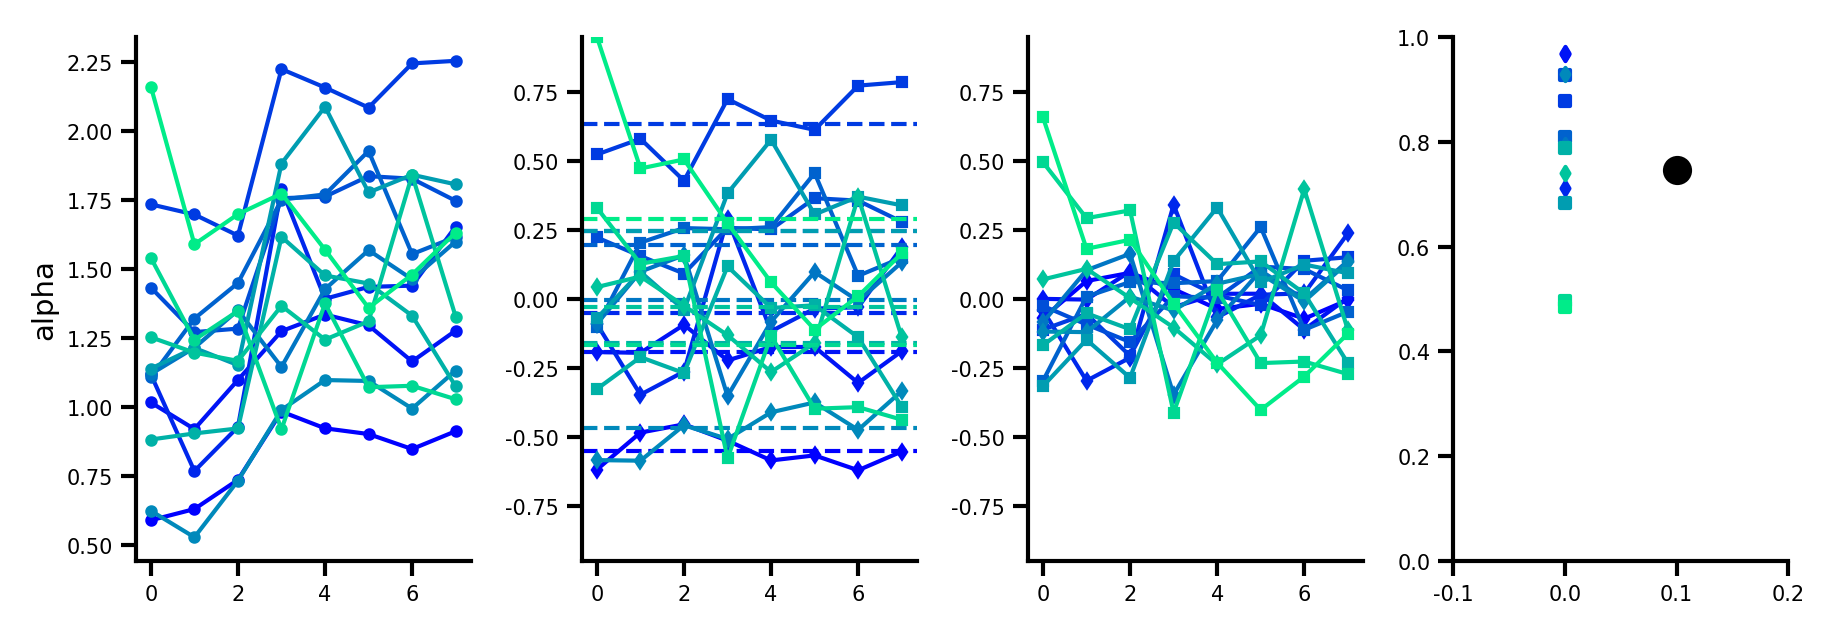

{'RatF00': -0.5500626743880214, 'RatF01': -0.1931936087953162, 'RatF02': -0.05048303657510113, 'RatM00': 0.6356812099084528, 'RatM01': 0.248371798087379, 'RatM02': 0.19583435057665277, 'RatF32': -0.005092262585041301, 'RatF33': -0.4665730504125287, 'RatM31': 0.24629804632170502, 'RatM32': -0.15904751462831365, 'RatF42': -0.027750061108792624, 'RatM40': -0.1655529931153656, 'RatM43': 0.29156979671429023}


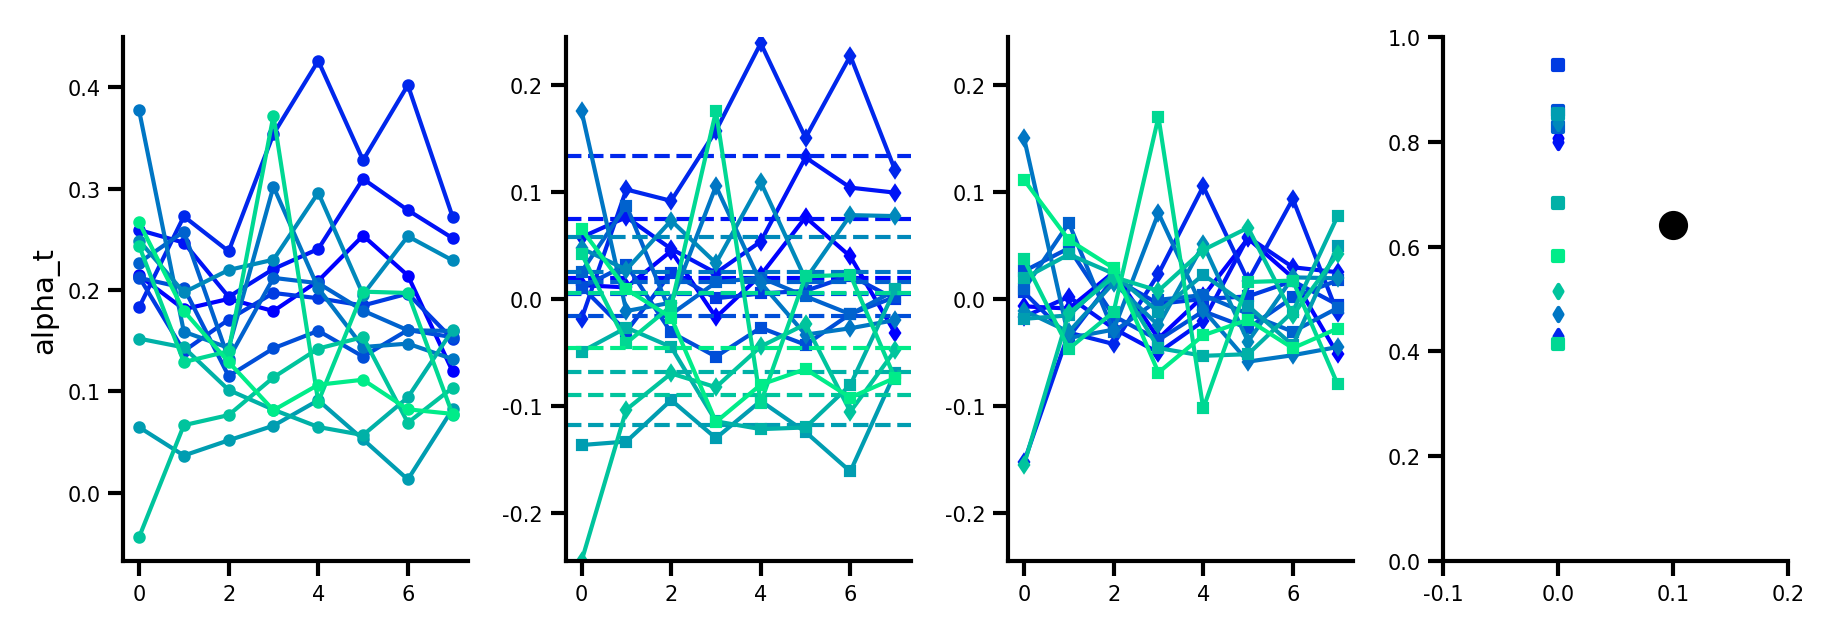

{'RatF00': 0.01984321526195161, 'RatF01': 0.07455947801664871, 'RatF02': 0.1340799657585155, 'RatM00': 0.005161572297657152, 'RatM01': -0.015518956195387157, 'RatM02': 0.016386265022887123, 'RatF32': 0.025241880269273077, 'RatF33': 0.05827959629176168, 'RatM31': -0.1181851690939925, 'RatM32': -0.06862887323269519, 'RatF42': -0.09033768956932257, 'RatM40': 0.005338882775715595, 'RatM43': -0.04622016760301312}


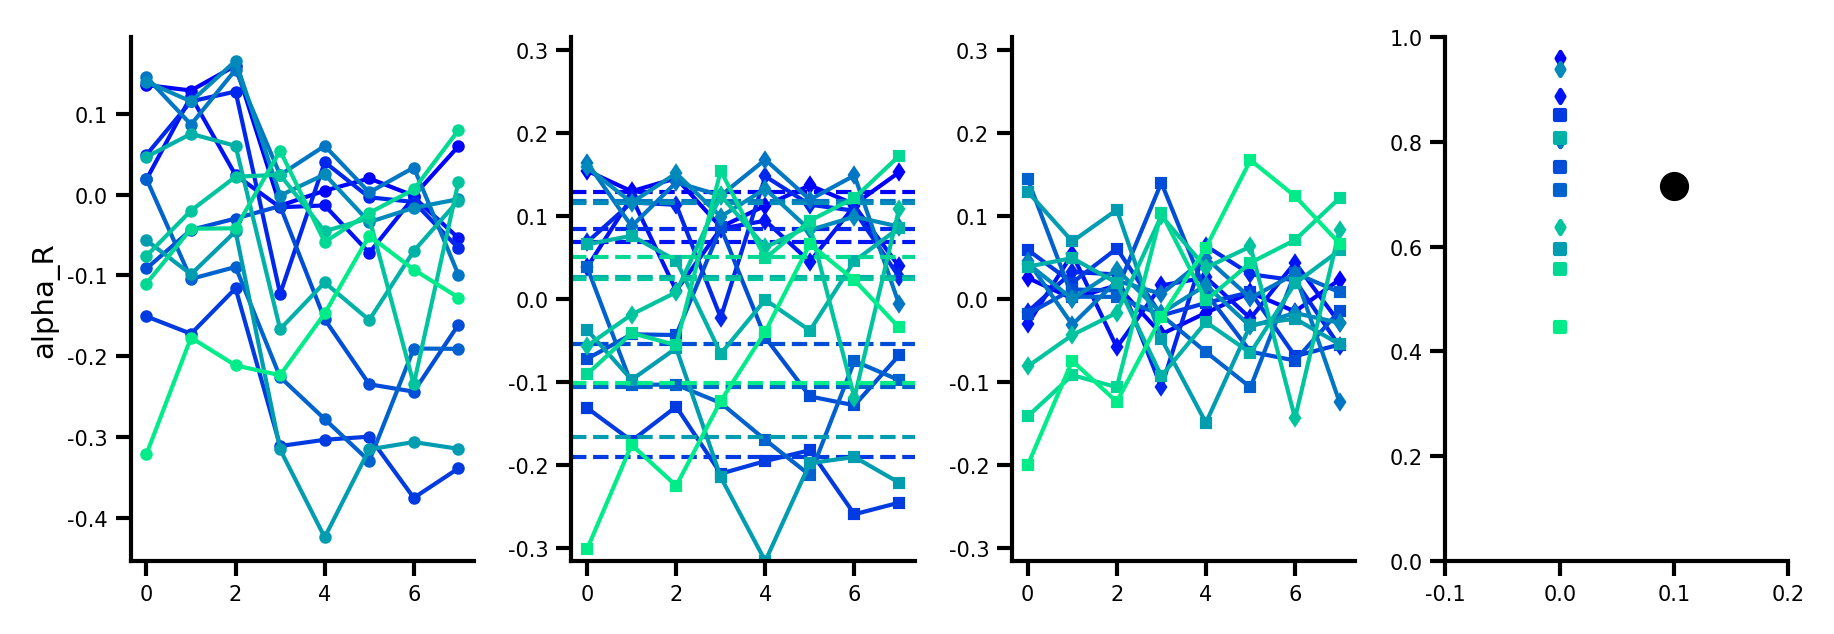

{'RatF00': 0.12915586574216475, 'RatF01': 0.06831465781569816, 'RatF02': 0.0838582613823976, 'RatM00': -0.19053556047571374, 'RatM01': -0.053913920896314055, 'RatM02': -0.10590253725905252, 'RatF32': 0.11854349908733497, 'RatF33': 0.11602163857413543, 'RatM31': -0.16668728814555275, 'RatM32': 0.026898108116223004, 'RatF42': 0.02473977721117853, 'RatM40': 0.0506601522846297, 'RatM43': -0.10115265343712918}


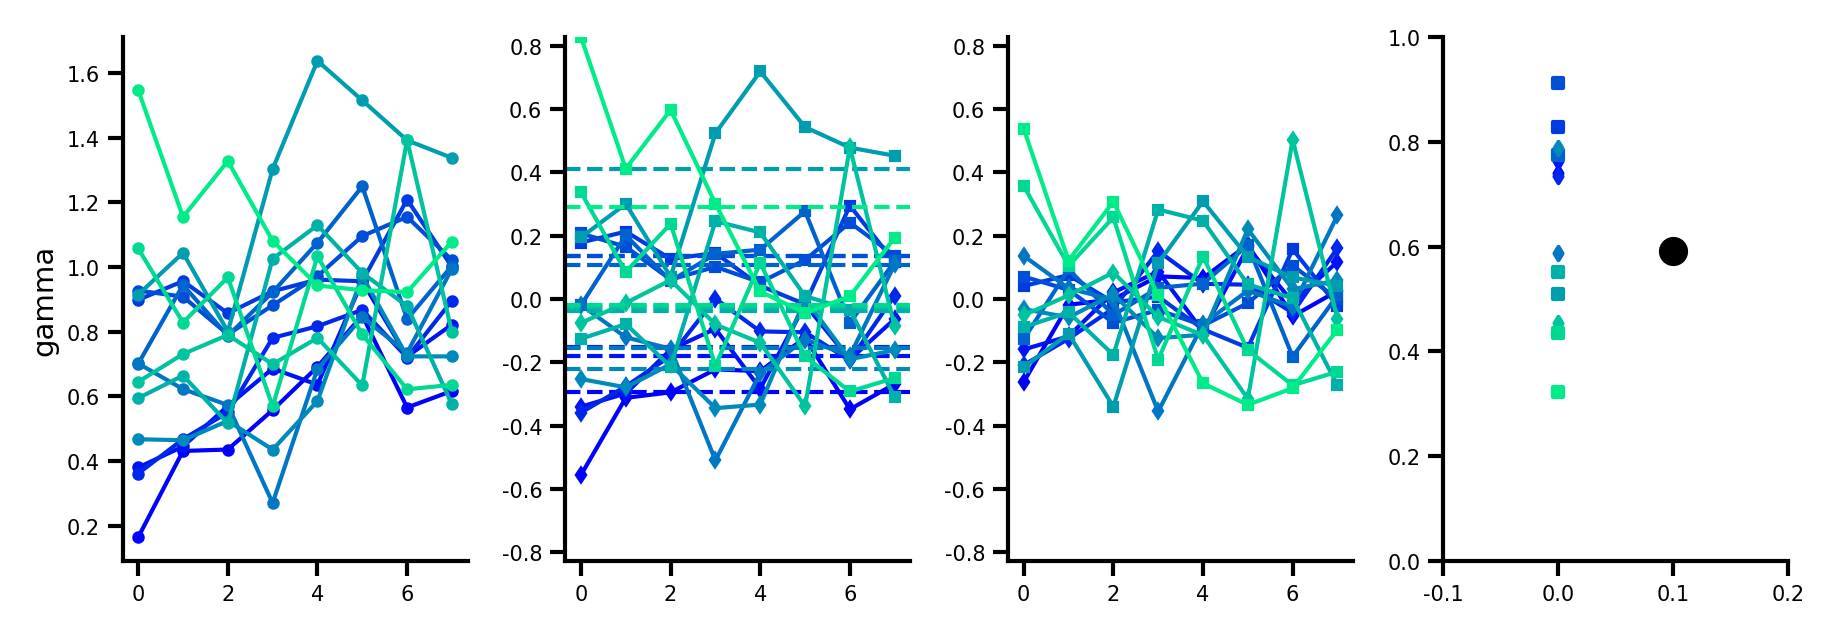

{'RatF00': -0.29385175297407057, 'RatF01': -0.1806741069532366, 'RatF02': -0.15032864350029757, 'RatM00': 0.1374615584663218, 'RatM01': 0.13622702902345332, 'RatM02': 0.10726910079595896, 'RatF32': -0.1545970661744777, 'RatF33': -0.22087877711737364, 'RatM31': 0.4101893178660687, 'RatM32': -0.03703005728835558, 'RatF42': -0.02402833231396913, 'RatM40': -0.019790540347917027, 'RatM43': 0.2900322705178947}


KeyboardInterrupt: 

In [700]:
for var, n in zip(vars, names):
    do_stuff(var, n)

In [650]:
conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]

def compute_ICC(var, animalList=animalList, bootstrap=False, n_samples=1000):
    expected_values = {cond: np.mean([var[animal][cond] for animal in animalList]) for cond in conds}
    individual_intercepts = {}
    remaining_residuals = {}
    x = np.arange(len(conds))

    for animal in animalList:
        # compute expected value for each condition
        y = np.array([var[animal][cond] for cond in conds])
        y_expected = y - np.array([expected_values[cond] for cond in conds])

        # compute intercept for each animal
        X = np.ones((len(x), 1))
        coefficients = np.linalg.lstsq(X, y_expected.reshape(-1, 1), rcond=None)[0]
        intercept = coefficients[0][0]
        individual_intercepts[animal] = intercept

        # compute residuals for each animal
        y_corrected = y_expected - individual_intercepts[animal]
        remaining_residuals[animal] = np.var(y_corrected)

    # population ICC = variance of intercepts / (variance of intercepts + mean of residuals)
    alp = np.var(list(individual_intercepts.values()))
    eps = np.mean(list(remaining_residuals.values()))
    ICC_pop = alp / (alp + eps)

    # individual ICC = variance of intercepts / (variance of intercepts + residuals)
    ICC_indiv = {animal: alp / (alp + remaining_residuals[animal]) for animal in animalList}

    # confidence interval 
    lower_bound = None
    upper_bound = None
    ICC_bootstrap = None

    if bootstrap:
        # create bootstrap samples from estimated variance and residuals
        # compute ICC for each sample, compute confidence interval
        ICC_bootstrap = np.zeros(n_samples)
        samples = generate_bootstrap_samples(var, alp, eps, n=n_samples)
        for i in range(n_samples):
            ICC_bootstrap[i] = compute_ICC(samples[i], animalList=animalList)[0]
        
        lower_bound = np.percentile(ICC_bootstrap, 5)
        upper_bound = np.percentile(ICC_bootstrap, 95)

    return ICC_pop, ICC_indiv, [lower_bound, upper_bound, ICC_bootstrap]
        
def generate_bootstrap_samples(var, intercept_variance, residual_variance, n=1000):
    samples = []
    for i in range(n):
        sample = {}
        for animal in animalList:
            rand1 = np.random.normal(0, np.sqrt(intercept_variance))
            sample[animal] = {}
            for cond in conds:
                rand2 = np.random.normal(0, np.sqrt(residual_variance))
                sample[animal][cond] = var[animal][cond] + rand1 + rand2
        samples.append(sample)
    return samples


compute_ICC(alpha, animalList=animalList, bootstrap=True);


alpha M vs F p = 0.3408
alpha M vs F p = MannwhitneyuResult(statistic=9.0, pvalue=0.4)
alpha_t M vs F p = 0.4899
alpha_t M vs F p = MannwhitneyuResult(statistic=8.0, pvalue=0.6285714285714286)
alpha_R M vs F p = 0.547
alpha_R M vs F p = MannwhitneyuResult(statistic=8.0, pvalue=0.6285714285714286)
gamma M vs F p = 0.7631
gamma M vs F p = MannwhitneyuResult(statistic=6.0, pvalue=1.0)
gamma_t M vs F p = 0.5184
gamma_t M vs F p = MannwhitneyuResult(statistic=4.0, pvalue=0.6285714285714286)
gamma_R M vs F p = 0.9111
gamma_R M vs F p = MannwhitneyuResult(statistic=6.0, pvalue=1.0)
mu M vs F p = 0.2929
mu M vs F p = MannwhitneyuResult(statistic=9.0, pvalue=0.4)
mu_t M vs F p = 0.6755
mu_t M vs F p = MannwhitneyuResult(statistic=5.0, pvalue=0.8571428571428571)
mu_R M vs F p = 0.8961
mu_R M vs F p = MannwhitneyuResult(statistic=5.0, pvalue=0.8571428571428571)
sigma M vs F p = 0.4941
sigma M vs F p = MannwhitneyuResult(statistic=9.0, pvalue=0.4)
sigma_t M vs F p = 0.3449
sigma_t M vs F p = Mannw

(0.0, 1.0)

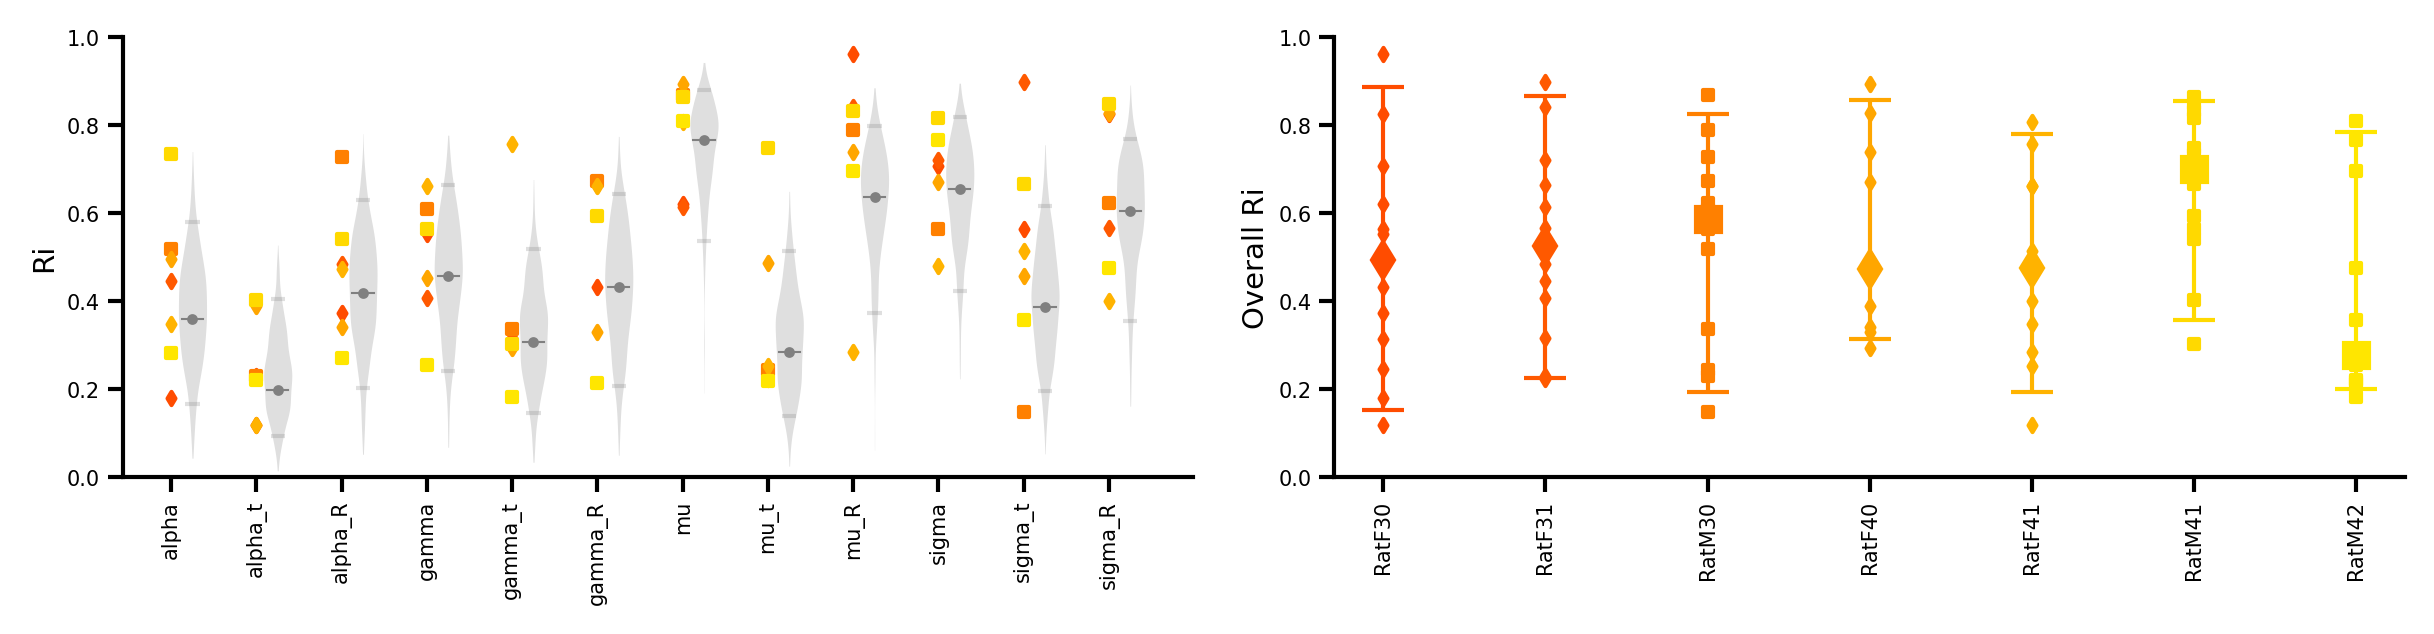

In [623]:
lesion = ['RatF30', 'RatF31', 'RatM30', 'RatF40', 'RatF41', 'RatM41', 'RatM42']
vars = alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R
names = ('alpha', 'alpha_t', 'alpha_R', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t', 'mu_R', 'sigma', 'sigma_t', 'sigma_R')



fig, axs = plt.subplots(1, 2, figsize=(8, 2))

populationRi = {}
conf_bottom = {}
conf_top = {}
indivRi = {}
ICC_bootstrap = {}

for i, (var, name) in enumerate(zip(vars, names)):
    populationRi[name], indivRi[name], (conf_bottom[name], conf_top[name], ICC_bootstrap[name]) = compute_ICC(var, animalList=lesion, bootstrap=True)

for i, (var, name) in enumerate(zip(vars, names)):
    femalesRi = [indivRi[name][animal] for animal in lesion if 'F' in animal]
    malesRi = [indivRi[name][animal] for animal in lesion if 'M' in animal]

    print(f'{name} M vs F p = {exact_mc_perm_test(malesRi, femalesRi)}')
    print(f'{name} M vs F p = {stats.mannwhitneyu(malesRi, femalesRi)}')

    for animal in lesion:
        axs[0].scatter(i, indivRi[name][animal], color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)

    line = 0.25/2
    axs[0].plot([i+.25-line, i+.25+line], [populationRi[name], populationRi[name]], color='gray', lw=0.5, zorder=1)
    axs[0].scatter(i+.25, populationRi[name], color='gray', s=2.5)

    violin_parts = axs[0].violinplot(positions=[i+.25], 
                    dataset=[ICC_bootstrap[name]],
                    widths=.33, showextrema=False, 
                    quantiles=[0.05, 0.95])
    
    for vp in violin_parts['bodies']:
        vp.set_facecolor('gray')
        vp.set_edgecolor('gray')
        vp.set_linewidth(0)
        vp.set_alpha(.25)
        vp.set_zorder(0)
    # for vp in violin_parts['cquantiles']:
    violin_parts['cquantiles'].set_facecolor('gray')
    violin_parts['cquantiles'].set_edgecolor('gray')
    violin_parts['cquantiles'].set_linewidth(1)
    violin_parts['cquantiles'].set_alpha(.25)
    violin_parts['cquantiles'].set_zorder(1)
    
    for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
        try:
            vp = violin_parts[partname]
            vp.set_edgecolor('gray')
            vp.set_linewidth(0)
            vp.set_alpha(0)
        except:
            pass

for i, animal in enumerate(lesion):

    axs[1].scatter([i] * len([indivRi[name][animal] for name in names]),
                    [indivRi[name][animal] for name in names],
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)
                    
    lower = np.percentile([indivRi[name][animal] for name in names], 5)
    upper = np.percentile([indivRi[name][animal] for name in names], 95)

    axs[1].errorbar(i, np.median([indivRi[name][animal] for name in names]), 
                    yerr=[[np.median([indivRi[name][animal] for name in names]) - lower], 
                            [upper - np.median([indivRi[name][animal] for name in names])]],
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], 
                    capsize=5, capthick=1, elinewidth=1)


axs[0].set_xticks(range(len(vars)))
axs[0].set_xticklabels(names, rotation=90)
axs[0].set_ylabel('Ri')
axs[0].set_ylim(0, 1)
# axs[0].set_yticklabels('')
# axs[0].set_yticks([0, 0.5, 0.75, .9, 1])
# axs[0].set_yticks([0.25, 0.625, 0.825, .95], minor=True)
# axs[0].set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
# axs[0].tick_params(which='minor', length=0)



axs[1].set_xticks(range(len(lesion)))
axs[1].set_xticklabels(lesion, rotation=90)
axs[1].set_ylabel('Overall Ri')
axs[1].set_ylim(0, 1)
# axs[1].set_yticklabels('')
# axs[1].set_yticks([0, 0.5, 0.75, .9, 1])
# axs[1].set_yticks([0.25, 0.625, 0.825, .95], minor=True)
# axs[1].set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
# axs[1].tick_params(which='minor', length=0)


alpha M vs F p = 0.1595
alpha M vs F p = MannwhitneyuResult(statistic=11.0, pvalue=0.18065268065268064)
alpha_t M vs F p = 0.3803
alpha_t M vs F p = MannwhitneyuResult(statistic=29.0, pvalue=0.2948717948717949)
alpha_R M vs F p = 0.0504
alpha_R M vs F p = MannwhitneyuResult(statistic=8.0, pvalue=0.07342657342657342)
gamma M vs F p = 0.5692
gamma M vs F p = MannwhitneyuResult(statistic=19.0, pvalue=0.8356643356643356)
gamma_t M vs F p = 0.5563
gamma_t M vs F p = MannwhitneyuResult(statistic=14.0, pvalue=0.36596736596736595)
gamma_R M vs F p = 0.0907
gamma_R M vs F p = MannwhitneyuResult(statistic=10.0, pvalue=0.13752913752913754)
mu M vs F p = 0.9292
mu M vs F p = MannwhitneyuResult(statistic=23.0, pvalue=0.8356643356643356)
mu_t M vs F p = 0.3341
mu_t M vs F p = MannwhitneyuResult(statistic=29.0, pvalue=0.2948717948717949)
mu_R M vs F p = 0.4019
mu_R M vs F p = MannwhitneyuResult(statistic=15.0, pvalue=0.4452214452214452)
sigma M vs F p = 0.5418
sigma M vs F p = MannwhitneyuResult(stat

(0.0, 1.0)

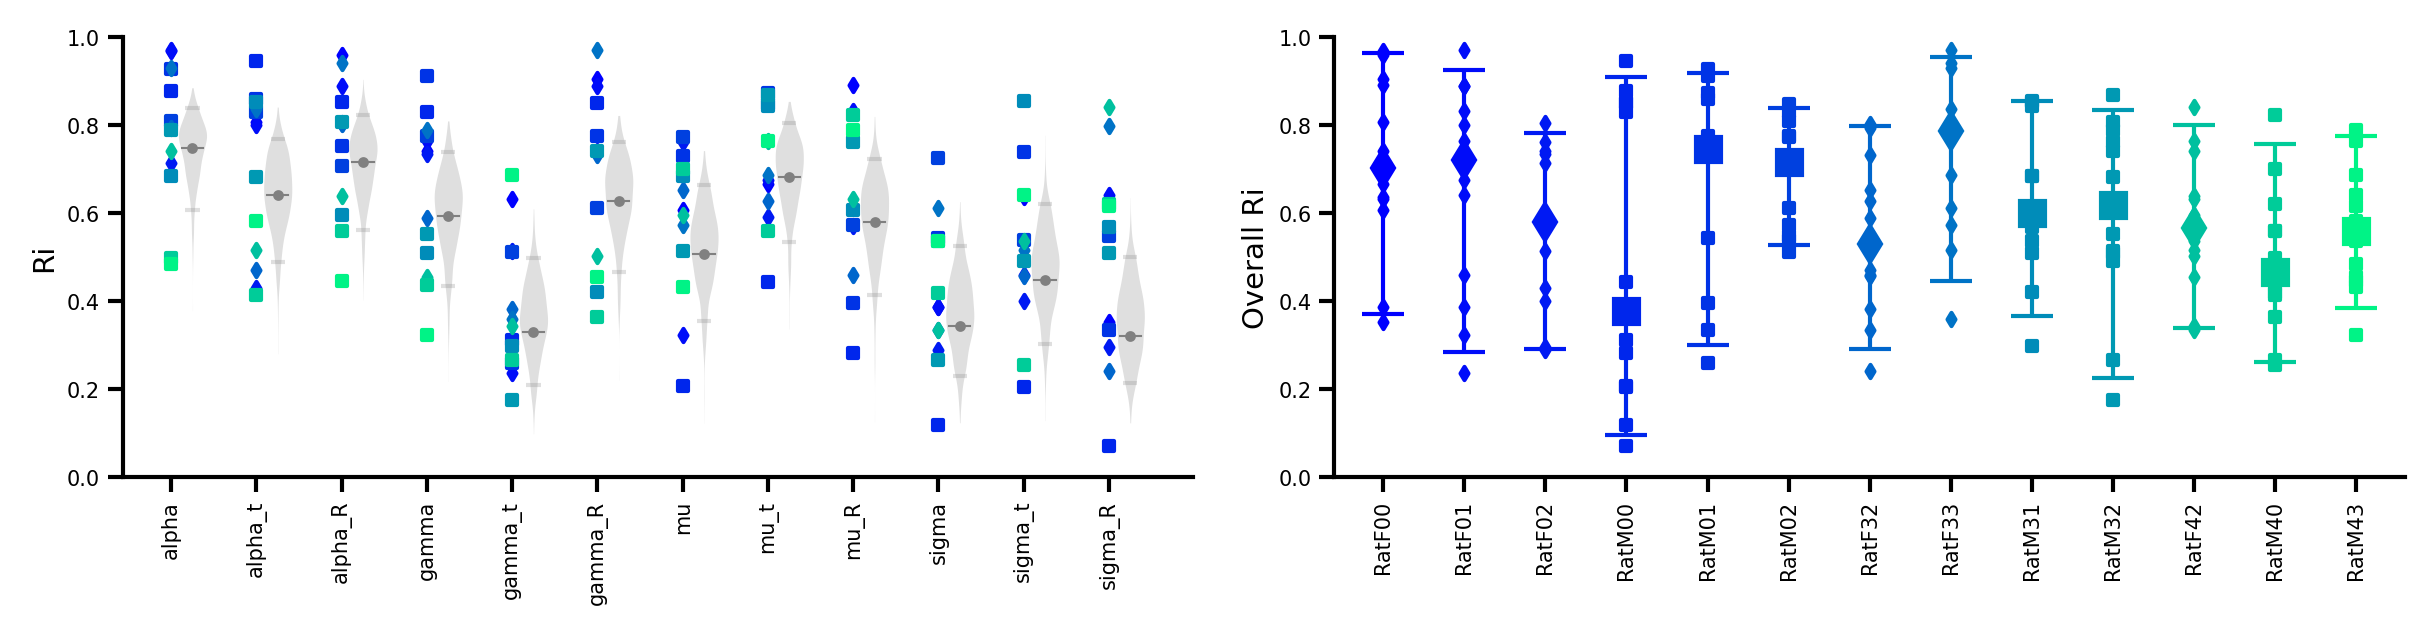

In [632]:
vars = alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R
names = ('alpha', 'alpha_t', 'alpha_R', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t', 'mu_R', 'sigma', 'sigma_t', 'sigma_R')



fig, axs = plt.subplots(1, 2, figsize=(8, 2))

populationRi = {}
conf_bottom = {}
conf_top = {}
indivRi = {}
ICC_bootstrap = {}

for i, (var, name) in enumerate(zip(vars, names)):
    populationRi[name], indivRi[name], (conf_bottom[name], conf_top[name], ICC_bootstrap[name]) = compute_ICC(var, animalList=intact, bootstrap=True)

for i, (var, name) in enumerate(zip(vars, names)):
    femalesRi = [indivRi[name][animal] for animal in intact if 'F' in animal]
    malesRi = [indivRi[name][animal] for animal in intact if 'M' in animal]

    print(f'{name} M vs F p = {exact_mc_perm_test(malesRi, femalesRi)}')
    print(f'{name} M vs F p = {stats.mannwhitneyu(malesRi, femalesRi)}')

    for animal in intact:
        axs[0].scatter(i, indivRi[name][animal], color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)

    line = 0.25/2
    axs[0].plot([i+.25-line, i+.25+line], [populationRi[name], populationRi[name]], color='gray', lw=0.5, zorder=1)
    axs[0].scatter(i+.25, populationRi[name], color='gray', s=2.5)

    violin_parts = axs[0].violinplot(positions=[i+.25], 
                    dataset=[ICC_bootstrap[name]],
                    widths=.33, showextrema=False, 
                    quantiles=[0.05, 0.95])
    
    for vp in violin_parts['bodies']:
        vp.set_facecolor('gray')
        vp.set_edgecolor('gray')
        vp.set_linewidth(0)
        vp.set_alpha(.25)
        vp.set_zorder(0)
    # for vp in violin_parts['cquantiles']:
    violin_parts['cquantiles'].set_facecolor('gray')
    violin_parts['cquantiles'].set_edgecolor('gray')
    violin_parts['cquantiles'].set_linewidth(1)
    violin_parts['cquantiles'].set_alpha(.25)
    violin_parts['cquantiles'].set_zorder(1)
    
    for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
        try:
            vp = violin_parts[partname]
            vp.set_edgecolor('gray')
            vp.set_linewidth(0)
            vp.set_alpha(0)
        except:
            pass

for i, animal in enumerate(intact):

    axs[1].scatter([i] * len([indivRi[name][animal] for name in names]),
                    [indivRi[name][animal] for name in names],
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)
                    
    lower = np.percentile([indivRi[name][animal] for name in names], 5)
    upper = np.percentile([indivRi[name][animal] for name in names], 95)

    axs[1].errorbar(i, np.median([indivRi[name][animal] for name in names]), 
                    yerr=[[np.median([indivRi[name][animal] for name in names]) - lower], 
                            [upper - np.median([indivRi[name][animal] for name in names])]],
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], 
                    capsize=5, capthick=1, elinewidth=1)


axs[0].set_xticks(range(len(vars)))
axs[0].set_xticklabels(names, rotation=90)
axs[0].set_ylabel('Ri')
axs[0].set_ylim(0, 1)
# axs[0].set_yticklabels('')
# axs[0].set_yticks([0, 0.5, 0.75, .9, 1])
# axs[0].set_yticks([0.25, 0.625, 0.825, .95], minor=True)
# axs[0].set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
# axs[0].tick_params(which='minor', length=0)



axs[1].set_xticks(range(len(intact)))
axs[1].set_xticklabels(intact, rotation=90)
axs[1].set_ylabel('Overall Ri')
axs[1].set_ylim(0, 1)
# axs[1].set_yticklabels('')
# axs[1].set_yticks([0, 0.5, 0.75, .9, 1])
# axs[1].set_yticks([0.25, 0.625, 0.825, .95], minor=True)
# axs[1].set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
# axs[1].tick_params(which='minor', length=0)


significance level = 0.004166666666666667
alpha intact vs lesion p = 0.015
alpha intact vs lesion p = MannwhitneyuResult(statistic=77.0, pvalue=0.011145510835913313)
alpha_t intact vs lesion p = 0.0216
alpha_t intact vs lesion p = MannwhitneyuResult(statistic=71.0, pvalue=0.045562435500515995)
alpha_R intact vs lesion p = 0.0507
alpha_R intact vs lesion p = MannwhitneyuResult(statistic=69.0, pvalue=0.06749226006191951)
gamma intact vs lesion p = 0.5212
gamma intact vs lesion p = MannwhitneyuResult(statistic=53.0, pvalue=0.5880288957688339)
gamma_t intact vs lesion p = 0.9231
gamma_t intact vs lesion p = MannwhitneyuResult(statistic=43.0, pvalue=0.877296181630547)
gamma_R intact vs lesion p = 0.3756
gamma_R intact vs lesion p = MannwhitneyuResult(statistic=58.0, pvalue=0.3506965944272446)
mu intact vs lesion p = 0.0432
mu intact vs lesion p = MannwhitneyuResult(statistic=70.0, pvalue=0.05567595459236326)
mu_t intact vs lesion p = 0.1211
mu_t intact vs lesion p = MannwhitneyuResult(stati

(0.0, 1.0)

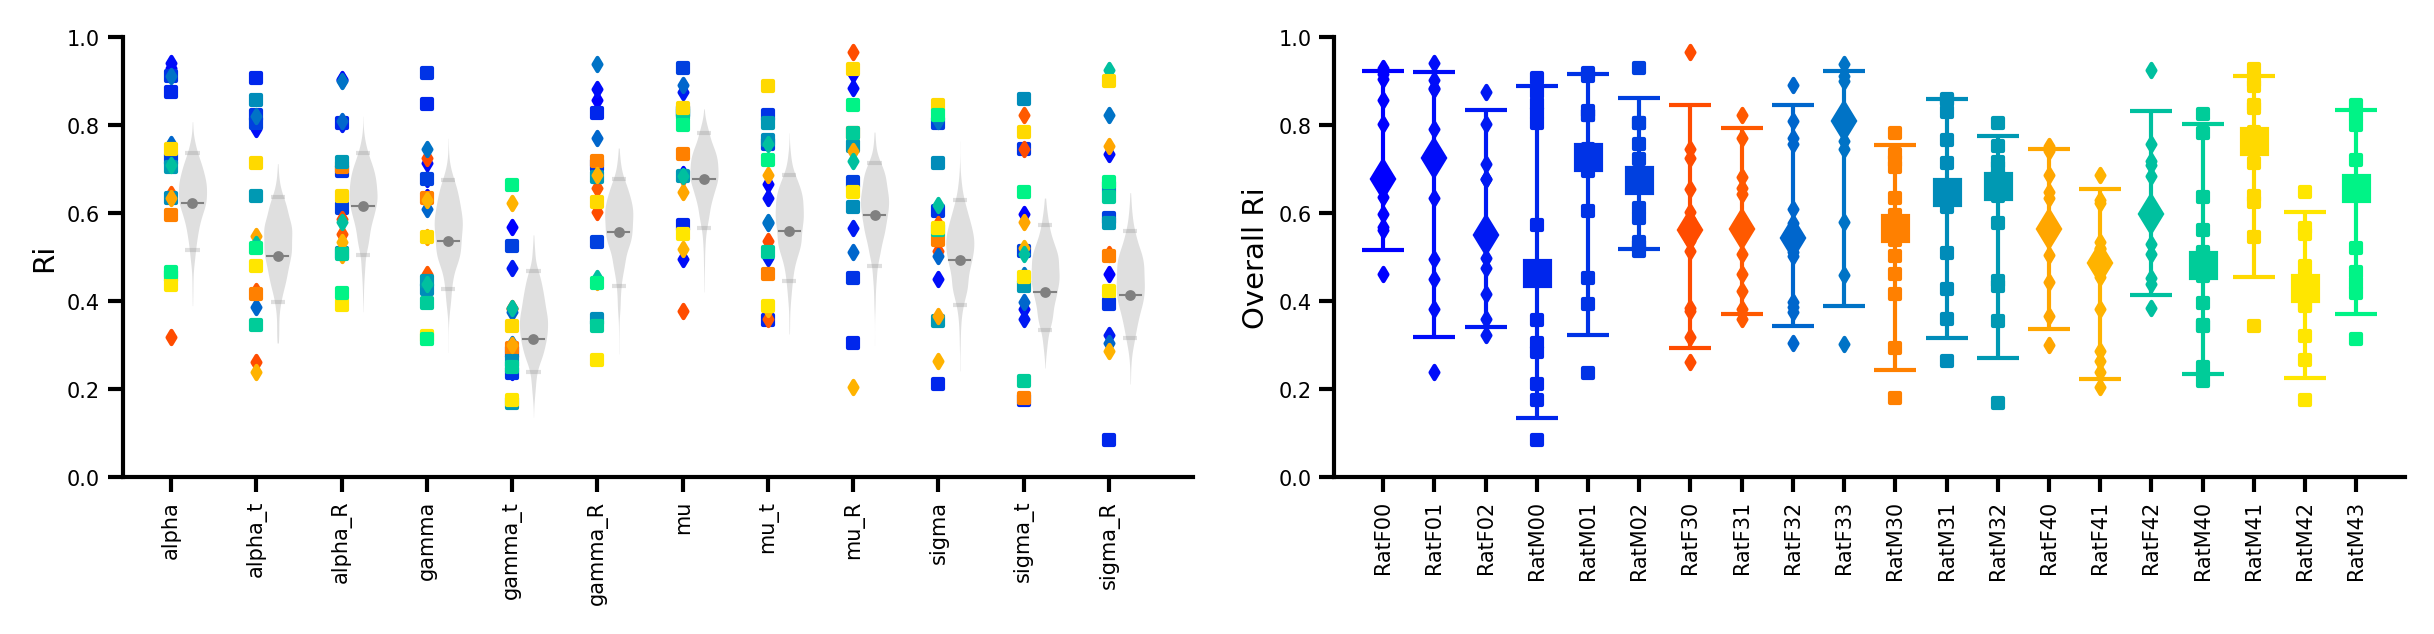

In [638]:
vars = alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R
names = ('alpha', 'alpha_t', 'alpha_R', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t', 'mu_R', 'sigma', 'sigma_t', 'sigma_R')



fig, axs = plt.subplots(1, 2, figsize=(8, 2))

populationRi = {}
conf_bottom = {}
conf_top = {}
indivRi = {}
ICC_bootstrap = {}

sig = 0.05 / len(vars)
print(f'significance level = {sig}')

for i, (var, name) in enumerate(zip(vars, names)):
    populationRi[name], indivRi[name], (conf_bottom[name], conf_top[name], ICC_bootstrap[name]) = compute_ICC(var, animalList=animalList, bootstrap=True)

for i, (var, name) in enumerate(zip(vars, names)):
    intactRi = [indivRi[name][animal] for animal in animalList if brainstatus[animal] == 'normal']
    lesionRi = [indivRi[name][animal] for animal in animalList if brainstatus[animal] != 'normal']

    print(f'{name} intact vs lesion p = {exact_mc_perm_test(intactRi, lesionRi)}')
    print(f'{name} intact vs lesion p = {stats.mannwhitneyu(intactRi, lesionRi)}')

    for animal in animalList:
        axs[0].scatter(i, indivRi[name][animal], color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)

    line = 0.25/2
    axs[0].plot([i+.25-line, i+.25+line], [populationRi[name], populationRi[name]], color='gray', lw=0.5, zorder=1)
    axs[0].scatter(i+.25, populationRi[name], color='gray', s=2.5)

    violin_parts = axs[0].violinplot(positions=[i+.25], 
                    dataset=[ICC_bootstrap[name]],
                    widths=.33, showextrema=False, 
                    quantiles=[0.05, 0.95])
    
    for vp in violin_parts['bodies']:
        vp.set_facecolor('gray')
        vp.set_edgecolor('gray')
        vp.set_linewidth(0)
        vp.set_alpha(.25)
        vp.set_zorder(0)
    # for vp in violin_parts['cquantiles']:
    violin_parts['cquantiles'].set_facecolor('gray')
    violin_parts['cquantiles'].set_edgecolor('gray')
    violin_parts['cquantiles'].set_linewidth(1)
    violin_parts['cquantiles'].set_alpha(.25)
    violin_parts['cquantiles'].set_zorder(1)
    
    for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
        try:
            vp = violin_parts[partname]
            vp.set_edgecolor('gray')
            vp.set_linewidth(0)
            vp.set_alpha(0)
        except:
            pass

for i, animal in enumerate(animalList):

    axs[1].scatter([i] * len([indivRi[name][animal] for name in names]),
                    [indivRi[name][animal] for name in names],
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)
                    
    lower = np.percentile([indivRi[name][animal] for name in names], 5)
    upper = np.percentile([indivRi[name][animal] for name in names], 95)

    axs[1].errorbar(i, np.median([indivRi[name][animal] for name in names]), 
                    yerr=[[np.median([indivRi[name][animal] for name in names]) - lower], 
                            [upper - np.median([indivRi[name][animal] for name in names])]],
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], 
                    capsize=5, capthick=1, elinewidth=1)


axs[0].set_xticks(range(len(vars)))
axs[0].set_xticklabels(names, rotation=90)
axs[0].set_ylabel('Ri')
axs[0].set_ylim(0, 1)
# axs[0].set_yticklabels('')
# axs[0].set_yticks([0, 0.5, 0.75, .9, 1])
# axs[0].set_yticks([0.25, 0.625, 0.825, .95], minor=True)
# axs[0].set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
# axs[0].tick_params(which='minor', length=0)



axs[1].set_xticks(range(len(animalList)))
axs[1].set_xticklabels(animalList, rotation=90)
axs[1].set_ylabel('Overall Ri')
axs[1].set_ylim(0, 1)
# axs[1].set_yticklabels('')
# axs[1].set_yticks([0, 0.5, 0.75, .9, 1])
# axs[1].set_yticks([0.25, 0.625, 0.825, .95], minor=True)
# axs[1].set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
# axs[1].tick_params(which='minor', length=0)


In [631]:
# overall Ri differences between animals?
values = []
for key, rat_data in indivRi.items():
    values.append(list(rat_data.values()))

res = stats.kruskal(*values)
print(res)

KruskalResult(statistic=52.24056834884857, pvalue=2.466026605177779e-07)


In [805]:
# overalll Ri differences between animals?
values = []
for key, rat_data in indivRi.items():
    values.append(list(rat_data.values()))

# Perform normality test for each group
normality_passed = True
for group_values in values:
    _, p_value = stats.shapiro(group_values)
    print(stats.shapiro(group_values))
    if p_value < 0.05:
        normality_passed = False
        break

if normality_passed:
    f_statistic, p_value = stats.f_oneway(*values)
    
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)

    if p_value < 0.05:
        print("There are significant differences between individuals.")
    else:
        print("There are no significant differences between individuals.")
else:
    print("The normality assumption is violated. Consider using non-parametric tests.")

# post hoc test
c=0
alpha = 0.05 / 78
for i, animal in enumerate(animalList):
    for j, animal2 in enumerate(animalList):
        if i < j:
            c+=1
            p_ttest = stats.ttest_ind([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names])[1]
            p_mann = stats.mannwhitneyu([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names])[1]
            p_ks = stats.ks_2samp([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names])[1]
            p_wilcoxon = stats.wilcoxon([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names])[1]
            p_perm = exact_mc_perm_test([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names], 1000)

            if p_ttest < alpha or p_mann < alpha or p_ks < alpha or p_wilcoxon < alpha or p_perm < alpha:

                print(animal, animal2)
                print(exact_mc_perm_test([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names], 1000))
                print(stats.ttest_ind([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names]))
                print(stats.mannwhitneyu([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names]))
                print(stats.ks_2samp([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names]))
                print(stats.wilcoxon([indivRi[name][animal] for name in names], [indivRi[name][animal2] for name in names]))
print(f'n comparisons: {c}')

ShapiroResult(statistic=0.9059577584266663, pvalue=0.16142801940441132)
ShapiroResult(statistic=0.8794867992401123, pvalue=0.07017853856086731)
ShapiroResult(statistic=0.9566210508346558, pvalue=0.700970470905304)
ShapiroResult(statistic=0.9400346875190735, pvalue=0.45735129714012146)
ShapiroResult(statistic=0.9167827367782593, pvalue=0.22691544890403748)
ShapiroResult(statistic=0.9315981268882751, pvalue=0.35756435990333557)
ShapiroResult(statistic=0.9071025848388672, pvalue=0.1673695594072342)
ShapiroResult(statistic=0.9416714906692505, pvalue=0.47890883684158325)
ShapiroResult(statistic=0.9355543851852417, pvalue=0.4019649624824524)
ShapiroResult(statistic=0.9764583110809326, pvalue=0.9576933979988098)
ShapiroResult(statistic=0.9734112024307251, pvalue=0.9313715696334839)
ShapiroResult(statistic=0.9655953049659729, pvalue=0.8367646932601929)
F-statistic: 7.028832753058896
p-value: 1.8585472458840567e-09
There are significant differences between individuals.


KeyError: 'RatF30'

In [85]:
# overalll Ri differences between male & female?
male_data = []
female_data = []

for key, rat_data in indivRi.items():
    male_data.extend([value for rat, value in rat_data.items() if rat.startswith('RatM')])
    female_data.extend([value for rat, value in rat_data.items() if rat.startswith('RatF')])

# Perform t-test for normally distributed data
t_statistic, p_value_t = stats.ttest_ind(male_data, female_data)

# Perform Mann-Whitney U test for non-normally distributed data
u_statistic, p_value_mw = stats.mannwhitneyu(male_data, female_data)

perm = exact_mc_perm_test(male_data, female_data, 10000)

print("T-test results:")
print("t-statistic:", t_statistic)
print("p-value (t-test):", p_value_t)

print("Mann-Whitney U test results:")
print("U-statistic:", u_statistic)
print("p-value (Mann-Whitney U):", p_value_mw)

print("Permutation test results:")
print("p-value (permutation test):", perm)


alpha = 0.05

if p_value_t < alpha:
    print("There are significant differences between male and female rats (t-test).")
else:
    print("There are no significant differences between male and female rats (t-test).")

if p_value_mw < alpha:
    print("There are significant differences between male and female rats (Mann-Whitney U test).")
else:
    print("There are no significant differences between male and female rats (Mann-Whitney U test).")

if perm < alpha:
    print("There are significant differences between male and female rats (perm test).")
else:
    print("There are no significant differences between male and female rats (perm test).")


T-test results:
t-statistic: -1.2179476264605502
p-value (t-test): 0.22510664508150702
Mann-Whitney U test results:
U-statistic: 2729.0
p-value (Mann-Whitney U): 0.29512901789538615
Permutation test results:
p-value (permutation test): 0.2252
There are no significant differences between male and female rats (t-test).
There are no significant differences between male and female rats (Mann-Whitney U test).
There are no significant differences between male and female rats (perm test).


 corr: 0.31, p: 0.2686
 corr: -0.51, p: 0.0512
 corr: 0.08, p: 0.7635


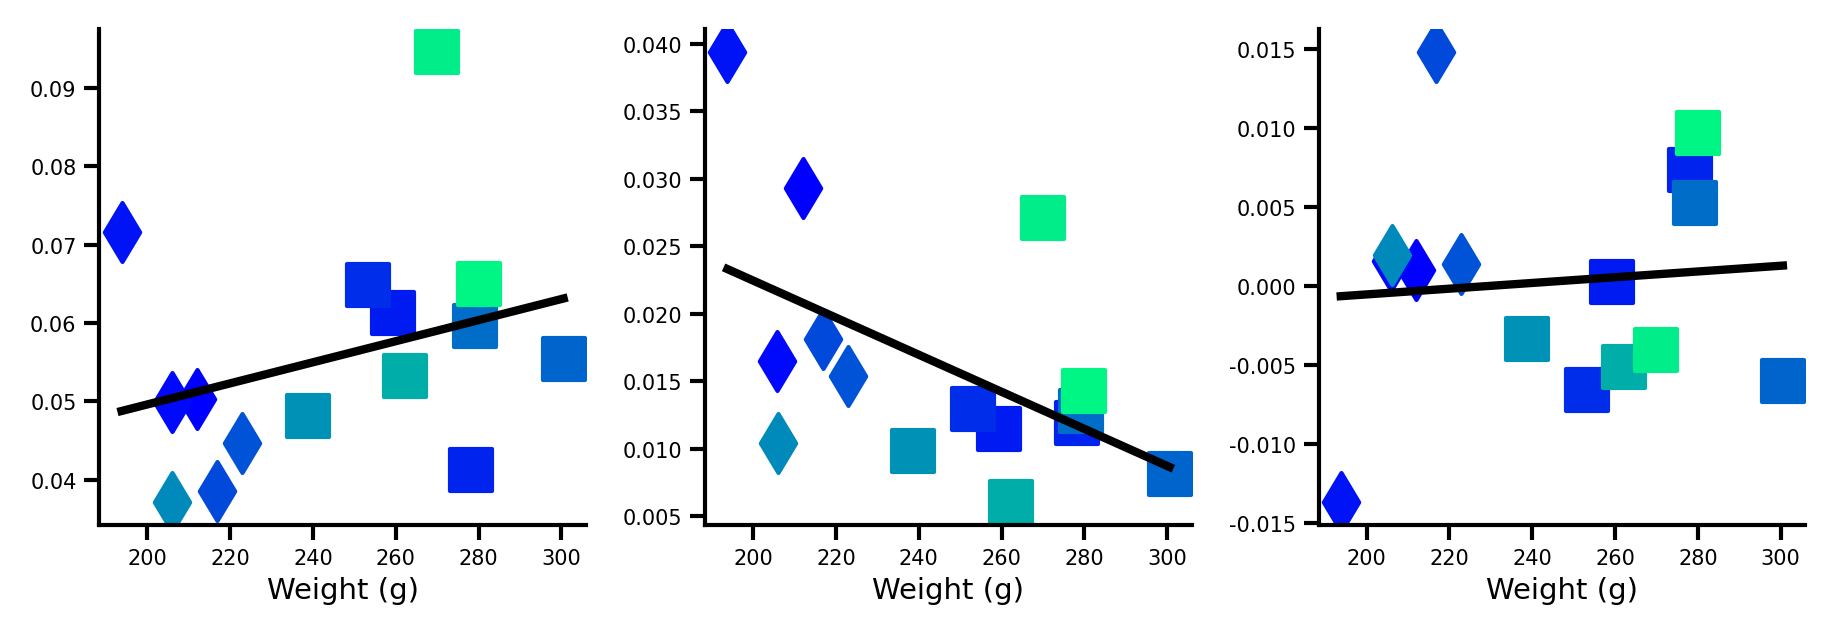

In [877]:
weights = {'RatF00': 212.02, 'RatF01': 205.85, 'RatF02': 193.75,
            'RatM00': 259.37, 'RatM01': 278.12, 'RatM02': 253.19,
            'RatF30': 217.32, 'RatF31': 228.95, 'RatF32': 216.80, 'RatF33': 222.77,
            'RatM30': 261.38, 'RatM31': 300.55, 'RatM32': 279.23, 
            'RatF40': 196.85, 'RatF41': 199.24, 'RatF42': 206.02,
            'RatM40': 238.70, 'RatM41': 238.19, 'RatM42': 242.87, 'RatM43': 262.23, 
            'RatF50': 180, 'RatF51': 205, 'RatF52': 175,##########################################
            'RatM50': 285, 'RatM51': 275, 'RatM52': 270, ##########################################
            'RatM53': 270, 'RatM54': 280 ##########################################
            }


epsilon_0, epsilon_t, epsilon_R = pickle.load(open("picklejar/TESTeffort_fit.p", "rb"))
epss = [epsilon_0, epsilon_t, epsilon_R]

fig, ax = plt.subplots(1, 3, figsize=(6, 2))
for j, var in enumerate(epss):
    _x, _y = [], []
    for animal in intact:
        # zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        y = var[animal]
        x = weights[animal]
        y /= x

        ax[j].scatter(x, y, color=rat_markers[animal][0], marker=rat_markers[animal][1], s=100)
        ax[j].set_xlabel("Weight (g)")
        # ax[j].set_ylabel(ylabelsIDLE[j])
        # ax[j].set_ylim(-2, 2)

        _x.append(x)
        _y.append(y)

    pearson = stats.pearsonr(_x, _y)
    print(f' corr: {pearson[0]:.2f}, p: {pearson[1]:.4f}')
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(_x, _y)
    ax[j].plot(np.linspace(np.min(_x), np.max(_x), 100), gradient * np.linspace(np.min(_x), np.max(_x), 100) + intercept, color='black', lw=2)


In [874]:
epsilon_0, epsilon_t, epsilon_R = pickle.load(open("picklejar/TESTeffort_fit.p", "rb"))
aaa = intact
epsilon_0_Males = [epsilon_0[animal] for animal in aaa if animal.startswith('RatM')]
epsilon_0_Females = [epsilon_0[animal] for animal in aaa if animal.startswith('RatF')]

epsilon_t_Males = [epsilon_t[animal] for animal in aaa if animal.startswith('RatM')]
epsilon_t_Females = [epsilon_t[animal] for animal in aaa if animal.startswith('RatF')]

epsilon_R_Males = [epsilon_R[animal] for animal in aaa if animal.startswith('RatM')]
epsilon_R_Females = [epsilon_R[animal] for animal in aaa if animal.startswith('RatF')]


perm_0 = exact_mc_perm_test(epsilon_0_Males, epsilon_0_Females, 10000)
perm_t = exact_mc_perm_test(epsilon_t_Males, epsilon_t_Females, 10000)
perm_R = exact_mc_perm_test(epsilon_R_Males, epsilon_R_Females, 10000)

alpha = 0.05 / 3

print("Permutation test results:")
print("p-value (permutation test) 0:", perm_0, perm_0 < alpha)
print("p-value (permutation test) t:", perm_t, perm_t < alpha)
print("p-value (permutation test) R:", perm_R, perm_R < alpha)





epsilon_0_Males = [epsilon_0[animal]/weights[animal] for animal in aaa if animal.startswith('RatM')]
epsilon_0_Females = [epsilon_0[animal]/weights[animal] for animal in aaa if animal.startswith('RatF')]

epsilon_t_Males = [epsilon_t[animal]/weights[animal] for animal in aaa if animal.startswith('RatM')]
epsilon_t_Females = [epsilon_t[animal]/weights[animal] for animal in aaa if animal.startswith('RatF')]

epsilon_R_Males = [epsilon_R[animal]/weights[animal] for animal in aaa if animal.startswith('RatM')]
epsilon_R_Females = [epsilon_R[animal]/weights[animal] for animal in aaa if animal.startswith('RatF')]


perm_0 = exact_mc_perm_test(epsilon_0_Males, epsilon_0_Females, 10000)
perm_t = exact_mc_perm_test(epsilon_t_Males, epsilon_t_Females, 10000)
perm_R = exact_mc_perm_test(epsilon_R_Males, epsilon_R_Females, 10000)

alpha = 0.05 / 3

print("Permutation test results, controling weight:")
print("p-value (permutation test) 0:", perm_0, perm_0 < alpha)
print("p-value (permutation test) t:", perm_t, perm_t < alpha)
print("p-value (permutation test) R:", perm_R, perm_R < alpha)

print(alpha)


Permutation test results:
p-value (permutation test) 0: 0.0033 True
p-value (permutation test) t: 0.2973 False
p-value (permutation test) R: 0.7086 False
Permutation test results, controling weight:
p-value (permutation test) 0: 0.1375 False
p-value (permutation test) t: 0.0539 False
p-value (permutation test) R: 0.7159 False
0.016666666666666666


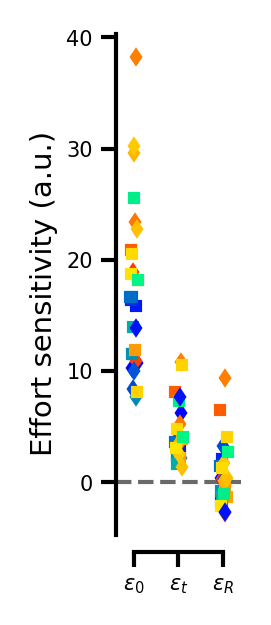

In [876]:
# epsilons distribution
# in fig 5



def Figure3X(ax=None):

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    for animal in animalList:
        zorder=2
        if animal == 'RatF02':
            zorder = 10

        x = np.random.normal(0, 0.05)
        ax.plot(np.arange(3)+x,  [epsilon_0[animal], epsilon_t[animal], epsilon_R[animal]], 
                    color=rat_markers[animal][0], label=animal, 
                    marker=rat_markers[animal][1], markersize=2, lw=0, zorder=zorder)
    ax.set_xticks(np.arange(3))
    ax.set_xticklabels([r'$\epsilon_0$', r"$\epsilon_t$", r"$\epsilon_R$"])
    ax.set_xlim(0, 2)
    # ax.set_ylim(-5, 20)
    ax.set_ylabel(f'Effort sensitivity (a.u.)')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)
    space_axes(ax, x_ratio_left=.2, x_ratio_right=.2)


fig, axs = plt.subplots(1, 1, figsize=(cm2inch(2), cm2inch(5)))
Figure3X(axs)

ValueError: too many values to unpack (expected 2)

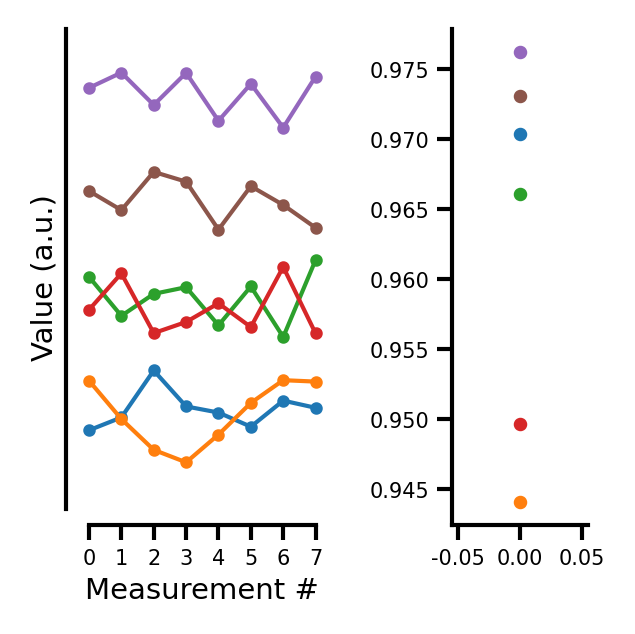

In [571]:
N = 6
do_stuff(mock_dataset(noise=0.25), '', animalList=animalList[:N])
do_stuff(mock_dataset(noise=1.5), '', animalList=animalList[:N])

In [ ]:


fig, axs = plt.subplots(1, 2, figsize=(8, 2))

populationRi = {}
conf_bottom = {}
conf_top = {}
indivRi = {}
ICC_bootstrap = {}

for i, (var, name) in enumerate(zip(vars, names)):
    populationRi, indivRi = compute_ICC(var)
    ICC_bootstrap = bootstrap_ICC(var)
    conf_bottom, conf_top = np.percentile(ICC_bootstrap, 5), np.percentile(ICC_bootstrap, 95)

for i, (var, name) in enumerate(zip(vars, names)):
    femalesRi = [indivRi[name][animal] for animal in animalList if 'F' in animal]
    malesRi = [indivRi[name][animal] for animal in animalList if 'M' in animal]

    print(f'{name} M vs F p = {exact_mc_perm_test(malesRi, femalesRi)}')
    print(f'{name} M vs F p = {stats.mannwhitneyu(malesRi, femalesRi)}')

    for animal in animalList:
        axs[0].scatter(i, indivRi[name][animal], color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)

    line = 0.25/2
    axs[0].plot([i+.25-line, i+.25+line], [populationRi[name], populationRi[name]], color='gray', lw=0.5, zorder=1)
    axs[0].scatter(i+.25, populationRi[name], color='gray', s=2.5)

    violin_parts = axs[0].violinplot(positions=[i+.25], 
                    dataset=[ICC_bootstrap[name]],
                    widths=.33, showextrema=False, 
                    quantiles=[0.05, 0.95])
    
    for vp in violin_parts['bodies']:
        vp.set_facecolor('gray')
        vp.set_edgecolor('gray')
        vp.set_linewidth(0)
        vp.set_alpha(.25)
        vp.set_zorder(0)
    # for vp in violin_parts['cquantiles']:
    violin_parts['cquantiles'].set_facecolor('gray')
    violin_parts['cquantiles'].set_edgecolor('gray')
    violin_parts['cquantiles'].set_linewidth(1)
    violin_parts['cquantiles'].set_alpha(.25)
    violin_parts['cquantiles'].set_zorder(1)
    
    for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
        try:
            vp = violin_parts[partname]
            vp.set_edgecolor('gray')
            vp.set_linewidth(0)
            vp.set_alpha(0)
        except:
            pass

for i, animal in enumerate(animalList):

    axs[1].scatter([i] * len([indivRi[name][animal] for name in names]),
                    [indivRi[name][animal] for name in names],
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)
                    
    lower = np.percentile([indivRi[name][animal] for name in names], 5)
    upper = np.percentile([indivRi[name][animal] for name in names], 95)

    axs[1].errorbar(i, np.median([indivRi[name][animal] for name in names]), 
                    yerr=[[np.median([indivRi[name][animal] for name in names]) - lower], 
                            [upper - np.median([indivRi[name][animal] for name in names])]],
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], 
                    capsize=5, capthick=1, elinewidth=1)


axs[0].set_xticks(range(len(vars)))
axs[0].set_xticklabels(names, rotation=90)
axs[0].set_ylabel('Ri')
axs[0].set_ylim(0, 1)
# axs[0].set_yticklabels('')
# axs[0].set_yticks([0, 0.5, 0.75, .9, 1])
# axs[0].set_yticks([0.25, 0.625, 0.825, .95], minor=True)
# axs[0].set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
# axs[0].tick_params(which='minor', length=0)



axs[1].set_xticks(range(len(animalList)))
axs[1].set_xticklabels(animalList, rotation=90)
axs[1].set_ylabel('Overall Ri')
axs[1].set_ylim(0, 1)
# axs[1].set_yticklabels('')
# axs[1].set_yticks([0, 0.5, 0.75, .9, 1])
# axs[1].set_yticks([0.25, 0.625, 0.825, .95], minor=True)
# axs[1].set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
# axs[1].tick_params(which='minor', length=0)


# archetypes

In [716]:
brainstatus = {'RatF00': 'normal', 'RatF01': 'normal', 'RatF02': 'normal',
               'RatM00': 'normal', 'RatM01': 'normal', 'RatM02': 'normal',
            #    'RatF20': 'thcre', 'RatF21': 'thcre', 'RatF22': 'thcre',
            #    'RatM20': 'thcre', 'RatM21': 'thcre', 'RatM22': 'thcre',
               'RatF30': 'DLS', 'RatF31': 'DLS', 'RatF32': 'normal', 'RatF33': 'normal',
               'RatM30': 'DLS', 'RatM31': 'normal', 'RatM32': 'normal',
               'RatF40': 'DLS', 'RatF41': 'DMS', 'RatF42': 'normal',
               'RatM40': 'normal', 'RatM41': 'DLS', 'RatM42': 'DMS', 'RatM43': 'normal', 

                'RatF50': 'DMS', 'RatF51': 'DLS', 'RatF52': 'DLS',
               'RatM50': 'DMS', 'RatM51': 'DMS', 'RatM52': 'DLS', 'RatM53': 'normal', 'RatM54': 'normal'
               }

intact_map = plt.cm.get_cmap('winter')
lesion_map = plt.cm.get_cmap('autumn')

# markers = {'normal': 'o', 'thcre': 'd', 'lesion': 'x', 'biglesion': 'X'}
# lines = {'normal': '-', 'thcre': '--', 'lesion': ':', 'biglesion': '-.'}

markers = {'normal': 'o', 'DLS': 'X', 'DMS': 'x'}
lines = {'normal': '-', 'DLS': '-', 'DMS': '-'}
colormaps = {'normal': intact_map, 'DLS': lesion_map, 'DMS': lesion_map}

# RATS
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
              'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
              'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43', 
                'RatF50', 'RatF51', 'RatF52', 'RatM50', 'RatM51', 'RatM52', 'RatM53', 'RatM54'
                ]


for index, animal in enumerate(animalList):
    print(f'Loading data for {animal}')
    # define marker and color for each rat, used in plots
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[colormaps[brainstatus[animal]](index/len(animalList)), 'd', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[colormaps[brainstatus[animal]](index/len(animalList)), 's', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

Loading data for RatF00
Loading data for RatF01
Loading data for RatF02
Loading data for RatM00
Loading data for RatM01
Loading data for RatM02
Loading data for RatF30
Loading data for RatF31
Loading data for RatF32
Loading data for RatF33
Loading data for RatM30
Loading data for RatM31
Loading data for RatM32
Loading data for RatF40
Loading data for RatF41
Loading data for RatF42
Loading data for RatM40
Loading data for RatM41
Loading data for RatM42
Loading data for RatM43
Loading data for RatF50
Loading data for RatF51
Loading data for RatF52
Loading data for RatM50
Loading data for RatM51
Loading data for RatM52
Loading data for RatM53
Loading data for RatM54


In [574]:
# https://github.com/atmguille/archetypal-analysis/
from abc import ABC, abstractmethod
class AA_Abstract(ABC):

    def __init__(self, n_archetypes: int, max_iter: int = 100, tol: float = 1e-6, verbose: bool = False):
        self.n_archetypes = n_archetypes
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.Z = None  # Archetypes
        self.n_samples, self.n_features = None, None
        self.RSS = None

    def fit(self, X: np.ndarray) -> 'AA_Abstract':
        """
        Computes the archetypes and the RSS from the data X, which are stored
        in the corresponding attributes
        :param X: data matrix, with shape (n_samples, n_features)
        :return: self
        """
        self.n_samples, self.n_features = X.shape
        self._fit(X)
        return self

    def _fit(self, X: np.ndarray):
        """
        Internal function that computes the archetypes and the RSS from the data X
        :param X: data matrix, with shape (n_samples, n_features)
        :return: None
        """
        # Initialize the archetypes
        B = np.eye(self.n_archetypes, self.n_samples)
        Z = B @ X

        A = np.eye(self.n_samples, self.n_archetypes)
        prev_RSS = None

        for _ in range(self.max_iter):
            A = self._computeA(X, Z, A)
            B = self._computeB(X, A, B)
            Z = B @ X
            RSS = self._rss(X, A, Z)
            if prev_RSS is not None and abs(prev_RSS - RSS) / prev_RSS < self.tol:
                break
            prev_RSS = RSS

        self.Z = Z
        self.RSS = RSS

    @staticmethod
    @abstractmethod
    def _computeA(X: np.ndarray, Z: np.ndarray, A: np.ndarray = None) -> np.ndarray:
        """
        Updates the A matrix given the data matrix X and the archetypes Z.
        A is the matrix that gives the best convex approximation of X by Z,
        so this function can be used during training and inference.
        For the latter, use the transform method instead
        :param X: data matrix, with shape (n_samples, n_features)
        :param Z: archetypes matrix, with shape (n_archetypes, n_features)
        :param A: A matrix, with shape (n_samples, n_archetypes)
        :return: A matrix, with shape (n_samples, n_archetypes)
        """
        pass

    @staticmethod
    @abstractmethod
    def _computeB(X: np.ndarray, A: np.ndarray, B: np.ndarray = None) -> np.ndarray:
        """
        Updates the B matrix given the data matrix X and the A matrix
        :param X: data matrix, with shape (n_samples, n_features)
        :param A: A matrix, with shape (n_samples, n_archetypes)
        :param B: B matrix, with shape (n_archetypes, n_samples)
        :return: B matrix, with shape (n_archetypes, n_samples)
        """
        pass

    def archetypes(self) -> np.ndarray:
        """
        Returns the archetypes' matrix
        :return: archetypes matrix, with shape (n_archetypes, n_features)
        """
        return self.Z

    def transform(self, X: np.ndarray) -> np.ndarray:
        """
        Computes the best convex approximation A of X by the archetypes
        :param X: data matrix, with shape (n_samples, n_features)
        :return: A matrix, with shape (n_samples, n_archetypes)
        """
        return self._computeA(X, self.Z)

    @staticmethod
    def _rss(X: np.ndarray, A: np.ndarray, Z: np.ndarray) -> float:
        """
        Computes the RSS of the data matrix X, given the A matrix and the archetypes Z
        :param X: data matrix, with shape (n_samples, n_features)
        :param A: A matrix, with shape (n_samples, n_archetypes)
        :param Z: archetypes matrix, with shape (n_archetypes, n_features)
        :return: RSS
        """
        return np.linalg.norm(X - A @ Z)**2


class AA_Fast(AA_Abstract):

    def __init__(self, n_archetypes: int, max_iter: int = 100, tol: float = 1e-6, verbose: bool = False,
                 derivative_max_iter: int = 10):
        super().__init__(n_archetypes, max_iter, tol, verbose)
        self.derivative_max_iter = derivative_max_iter

    def _computeA(self, X: np.ndarray, Z: np.ndarray, A: np.ndarray = None) -> np.ndarray:
        A = np.zeros((self.n_samples, self.n_archetypes))
        A[:, 0] = 1.0
        e = np.zeros(A.shape)
        for t in range(self.derivative_max_iter):
            # brackets are VERY important to save time
            G = 2.0 * (A @ (Z @ Z.T) - X @ Z.T)
            # Get the argument mins along each column
            argmins = np.argmin(G, axis=1)
            e[range(self.n_samples), argmins] = 1.0
            A += 2.0 / (t + 2.0) * (e - A)
            e[range(self.n_samples), argmins] = 0.0
        return A

    def _computeB(self, X: np.ndarray, A: np.ndarray, B: np.ndarray = None) -> np.ndarray:
        B = np.zeros((self.n_archetypes, self.n_samples))
        B[:, 0] = 1.0
        e = np.zeros(B.shape)
        for t in range(self.derivative_max_iter):
            # brackets are VERY important to save time
            t1 = (A.T @ A) @ (B @ X) @ X.T
            t2 = (A.T @ X) @ X.T
            G = 2.0 * (t1 - t2)
            argmins = np.argmin(G, axis=1)
            e[range(self.n_archetypes), argmins] = 1.0
            B += 2.0 / (t + 2.0) * (e - B)
            e[range(self.n_archetypes), argmins] = 0.0
        return B

In [566]:
n_samples = 100
n_features = 12
data = np.random.rand(n_samples, n_features)
data.shape

(100, 12)

In [717]:
alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R = pickle.load(open("picklejar/TESTintact_lesionFITS.p", "rb"))
n_features = 12
# data = np.array((len(animalList)*len(conds), n_features))
# data
data = []
data_avg = []
labels = []
labels_avg = []

for animal in animalList:
    data_avg.append((np.mean([alpha[animal][cond] for cond in conds]), np.mean([alpha_t[animal][cond] for cond in conds]), np.mean([alpha_R[animal][cond] for cond in conds]), np.mean([gamma[animal][cond] for cond in conds]), np.mean([gamma_t[animal][cond] for cond in conds]), np.mean([gamma_R[animal][cond] for cond in conds]), np.mean([mu[animal][cond] for cond in conds]), np.mean([mu_t[animal][cond] for cond in conds]), np.mean([mu_R[animal][cond] for cond in conds]), np.mean([sigma[animal][cond] for cond in conds]), np.mean([sigma_t[animal][cond] for cond in conds]), np.mean([sigma_R[animal][cond] for cond in conds])))
    labels_avg.append(animal)
    for cond in conds:
        data.append((alpha[animal][cond], alpha_t[animal][cond], alpha_R[animal][cond], gamma[animal][cond], gamma_t[animal][cond], gamma_R[animal][cond], mu[animal][cond], mu_t[animal][cond], mu_R[animal][cond], sigma[animal][cond], sigma_t[animal][cond], sigma_R[animal][cond]))
        labels.append(animal)
data = np.array(data)
data_avg = np.array(data_avg)

print(data.shape)
print(data_avg.shape)

(224, 12)
(28, 12)


In [718]:
# https://github.com/nichohelmut/football_results/tree/3b4f5b7ab72e31298a61e8b7116817f6180c5102
def proc(data):
    model = AA_Fast(n_archetypes=3, max_iter=1000, tol=1e-6, verbose=True)
    archs = model.fit(data)
    return archs

def transform(data):
    A = proc(data).transform(data)
    return A

s = transform(data)
s.shape

(224, 3)

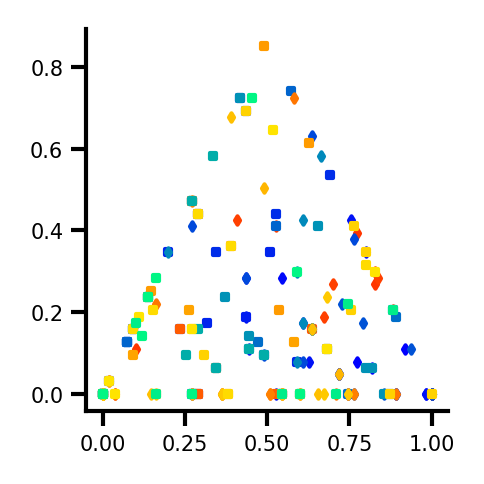

In [719]:
def scatter_triangle(points, labels=None, ax=None, vmin=0, vmax=1):

    if ax is None:
        fig, ax = plt.subplots(figsize=(1.5, 1.5))

    def _project(p):
        a = p[0]
        b = p[1]
        x = a + b/2
        y = np.sqrt(3) / 2  * b
        return np.array([x, y])

    x, y = list(zip(*[_project(p) for p in points]))

    for i in range(len(x)):
        if labels is None:
            ax.scatter(x[i], y[i], s=2, color='black')
        else:
            ax.scatter(x[i], y[i], s=2, color=rat_markers[labels[i]][0], marker=rat_markers[labels[i]][1])

scatter_triangle(s, labels)

In [720]:
intact = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43', 'RatM53', 'RatM54']
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
              'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
              'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43', 
                'RatF50', 'RatF51', 'RatF52', 'RatM50', 'RatM51', 'RatM52', 'RatM53', 'RatM54'
                ]



# intact = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
#             'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43']
# animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
#             'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43']

Zalpha = {animal: {key: (alpha[animal][key] - np.mean([alpha[animal][key] for animal in intact]))/np.std([alpha[animal][key] for animal in intact]) for key in alpha[animal]} for animal in animalList}
Zalpha_t = {animal: {key: (alpha_t[animal][key] - np.mean([alpha_t[animal][key] for animal in intact]))/np.std([alpha_t[animal][key] for animal in intact]) for key in alpha_t[animal]} for animal in animalList}
Zalpha_R = {animal: {key: (alpha_R[animal][key] - np.mean([alpha_R[animal][key] for animal in intact]))/np.std([alpha_R[animal][key] for animal in intact]) for key in alpha_R[animal]} for animal in animalList}
Zgamma = {animal: {key: (gamma[animal][key] - np.mean([gamma[animal][key] for animal in intact]))/np.std([gamma[animal][key] for animal in intact]) for key in gamma[animal]} for animal in animalList}
Zgamma_t = {animal: {key: (gamma_t[animal][key] - np.mean([gamma_t[animal][key] for animal in intact]))/np.std([gamma_t[animal][key] for animal in intact]) for key in gamma_t[animal]} for animal in animalList}
Zgamma_R = {animal: {key: (gamma_R[animal][key] - np.mean([gamma_R[animal][key] for animal in intact]))/np.std([gamma_R[animal][key] for animal in intact]) for key in gamma_R[animal]} for animal in animalList}


Zmu = {animal: {key: (mu[animal][key] - np.mean([mu[animal][key] for animal in intact]))/np.std([mu[animal][key] for animal in intact]) for key in mu[animal]} for animal in animalList}
Zmu_t = {animal: {key: (mu_t[animal][key] - np.mean([mu_t[animal][key] for animal in intact]))/np.std([mu_t[animal][key] for animal in intact]) for key in mu_t[animal]} for animal in animalList}
Zmu_R = {animal: {key: (mu_R[animal][key] - np.mean([mu_R[animal][key] for animal in intact]))/np.std([mu_R[animal][key] for animal in intact]) for key in mu_R[animal]} for animal in animalList}
Zsigma = {animal: {key: (sigma[animal][key] - np.mean([sigma[animal][key] for animal in intact]))/np.std([sigma[animal][key] for animal in intact]) for key in sigma[animal]} for animal in animalList}
Zsigma_t = {animal: {key: (sigma_t[animal][key] - np.mean([sigma_t[animal][key] for animal in intact]))/np.std([sigma_t[animal][key] for animal in intact]) for key in sigma_t[animal]} for animal in animalList}
Zsigma_R = {animal: {key: (sigma_R[animal][key] - np.mean([sigma_R[animal][key] for animal in intact]))/np.std([sigma_R[animal][key] for animal in intact]) for key in sigma_R[animal]} for animal in animalList}


traits = {animal: [] for animal in animalList}
traitsIDLE = {animal: [] for animal in animalList}
ZvarsIDLE = [Zalpha, Zalpha_t, Zalpha_R, Zgamma, Zgamma_t, Zgamma_R]
for j, zvar in enumerate(ZvarsIDLE):
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        traits[animal].append(np.mean(zscores))

traitsRUN = {animal: [] for animal in animalList}
ZvarsRUN = [Zmu, Zmu_t, Zmu_R, Zsigma, Zsigma_t, Zsigma_R]
for j, zvar in enumerate(ZvarsRUN):
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        traits[animal].append(np.mean(zscores))

traits

{'RatF00': [-1.6220557507948534,
  0.2971285167780656,
  1.1107160376893925,
  -1.1790575992040784,
  0.1941245637091082,
  0.9028997415262325,
  -0.3470840822294373,
  1.334610662347755,
  0.11371597145212703,
  0.8957429829697527,
  1.3289211318370449,
  0.4629757173449996],
 'RatF01': [-0.6190845872552522,
  1.0161420374011214,
  0.6174253018521023,
  -0.7675257711805268,
  -0.18935096055361467,
  0.772231998019434,
  -0.43797834159637516,
  0.07450951416417964,
  0.17342326378155593,
  -0.4390862438110734,
  0.8920160920132144,
  0.5382947864004133],
 'RatF02': [-0.30952783006830287,
  1.7137377098122057,
  0.7743869369964698,
  -0.6709385444352953,
  0.27203117004767197,
  0.5630185437573327,
  0.04966362920711615,
  2.218750625901683,
  -1.4470520289567859,
  0.9863687838877023,
  1.0684214791327764,
  -1.3697024081060887],
 'RatM00': [1.6503428837468594,
  0.10207757694499586,
  -1.4153638870639103,
  0.42652029525472757,
  0.7568916627422103,
  -0.6771981909936544,
  0.30066475

In [721]:
n_features = 12
data = []
data_avg = []
labels = []
labels_avg = []

for animal in animalList:
    data_avg.append(traits[animal])
    labels_avg.append(animal)
    for cond in conds:
        data.append((Zalpha[animal][cond], Zalpha_t[animal][cond], Zalpha_R[animal][cond], Zgamma[animal][cond], Zgamma_t[animal][cond], Zgamma_R[animal][cond], Zmu[animal][cond], Zmu_t[animal][cond], Zmu_R[animal][cond], Zsigma[animal][cond], Zsigma_t[animal][cond], Zsigma_R[animal][cond]))
        labels.append(animal)
data = np.array(data)
data_avg = np.array(data_avg)

print(data.shape)
print(data_avg.shape)

(224, 12)
(28, 12)


In [722]:

s = transform(data)
ss = transform(data_avg)

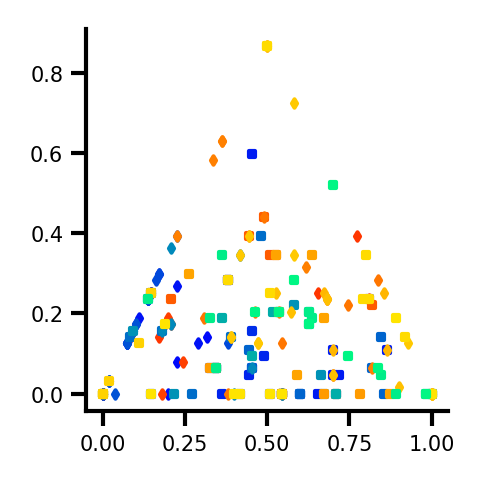

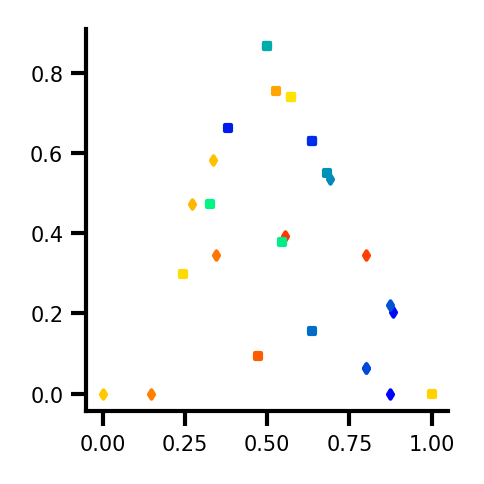

In [723]:
scatter_triangle(s, labels)
scatter_triangle(ss, labels_avg)

# PCA CLEAN

In [947]:
intact = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43', 'RatM53', 'RatM54']
            
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
              'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
              'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43', 
                'RatF50', 'RatF51', 'RatF52', 'RatM50', 'RatM51', 'RatM52', 'RatM53', 'RatM54'
                ]
            
alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R = pickle.load(open("picklejar/TESTintact_lesionFITS.p", "rb"))
vars = alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R
names = 'alpha', 'alpha_t', 'alpha_R', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t', 'mu_R', 'sigma', 'sigma_t', 'sigma_R'

vars = alpha, alpha_t, gamma, gamma_t, gamma_R, mu, mu_t, sigma
names = 'alpha', 'alpha_t', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t', 'sigma_0'

vars = alpha, alpha_t, gamma, gamma_t, gamma_R, mu, mu_t
names = 'alpha', 'alpha_t', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t'

In [948]:
def compute_intercept(var, animalList=animalList):


    conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]

    expected_60 = np.mean([var[animal]["60"] for animal in animalList])
    expected_90 = np.mean([var[animal]["90"] for animal in animalList])
    expected_120 = np.mean([var[animal]["120"] for animal in animalList])
    expected_20 = np.mean([var[animal]["20"] for animal in animalList])
    expected_10 = np.mean([var[animal]["10"] for animal in animalList])
    expected_2 = np.mean([var[animal]["2"] for animal in animalList])
    expected_rev10 = np.mean([var[animal]["rev10"] for animal in animalList])
    expected_rev20 = np.mean([var[animal]["rev20"] for animal in animalList])

    individual_intercepts = {}
    x = np.arange(len(conds))


    for animal in animalList:

        y = np.array([
            var[animal]["60"], 
                        var[animal]["90"], 
                        var[animal]["120"],
                        var[animal]["rev20"], 
                        var[animal]["rev10"], 
                        var[animal]["2"], 
                        var[animal]["10"], 
                        var[animal]["20"]])

        #############################""
        y_expected = np.array([
                                var[animal]["60"] - expected_60,
                                var[animal]["90"] - expected_90,
                                var[animal]["120"] - expected_120,
                                var[animal]["rev20"] - expected_rev20,
                                var[animal]["rev10"] - expected_rev10,
                                var[animal]["2"] - expected_2,
                                var[animal]["10"] - expected_10,
                                var[animal]["20"] - expected_20])


        #find intercept
        X = np.ones((len(x), 1))
        Y = y_expected.reshape(-1, 1)
        coefficients = np.linalg.lstsq(X, Y, rcond=None)[0]
        intercept = coefficients[0][0]
        individual_intercepts[animal] = intercept
    return individual_intercepts

compute_intercept(mu)
# do_stuff(sigma)
# do_stuff(alpha, 'alpha')

{'RatF00': -0.10450672399125893,
 'RatF01': -0.1243085991053571,
 'RatF02': -0.05574701614002346,
 'RatM00': -0.02957552401451387,
 'RatM01': -0.1096449376108816,
 'RatM02': 0.0005137743002029381,
 'RatF30': 0.03082810047354827,
 'RatF31': -0.1321449786367784,
 'RatF32': -0.16481601849418454,
 'RatF33': -0.12615440725072943,
 'RatM30': 0.13536691079800436,
 'RatM31': 0.0008222950487000161,
 'RatM32': 0.03430522414176353,
 'RatF40': 0.12376039062847619,
 'RatF41': 0.3702226444390667,
 'RatF42': -0.22572018979999517,
 'RatM40': -0.13233168859988886,
 'RatM41': -0.13851304754465318,
 'RatM42': 0.0006248822713828567,
 'RatM43': -0.08916254492734434,
 'RatF50': 0.20830746125754937,
 'RatF51': 0.11414694171899493,
 'RatF52': 0.23035562670833531,
 'RatM50': -0.1427786591531257,
 'RatM51': 0.11052953942231017,
 'RatM52': 0.03176779565435367,
 'RatM53': 0.14471451361934332,
 'RatM54': 0.039138234786705556}

In [949]:
df = pd.DataFrame(index=intact)

for var, name in zip(vars, names):
    l = np.array(list(compute_intercept(var, intact).values()))
    df[name] = l / np.std(l)  # normalize by std to have a mean of 0 and std of 1
    print(name, np.mean(l), np.std(l), np.std(l / np.std(l)))

print(df.head())

# df to array
data = df.to_numpy()
labels = df.index.to_numpy()
variables = df.columns.to_numpy()
print(labels)

alpha -7.401486830834377e-18 0.3072705270016046 0.9999999999999998
alpha_t -3.7007434154171884e-18 0.06340425893533076 1.0
gamma -5.551115123125783e-17 0.19766851251217596 1.0
gamma_t -9.251858538542971e-19 0.016576111085099918 0.9999999999999999
gamma_R -7.401486830834377e-18 0.07131577027902372 0.9999999999999999
mu 9.251858538542971e-19 0.09176201500317431 1.0
mu_t 2.3129646346357427e-18 0.022322756701435763 1.0
           alpha   alpha_t     gamma   gamma_t   gamma_R        mu      mu_t
RatF00 -1.914221  0.386289 -1.616920  0.227449  1.164140 -0.454166  1.596212
RatF01 -0.752804  1.249264 -1.044358 -0.282957  1.017752 -0.669962  0.066975
RatF02 -0.288358  2.188010 -0.890841  0.468808  0.673109  0.077206  2.757876
RatM00  1.944737  0.154733  0.565083  1.379131 -0.873342  0.362416 -0.577700
RatM01  0.684253 -0.171436  0.558837  0.478149 -0.671222 -0.510161 -0.349874
['RatF00' 'RatF01' 'RatF02' 'RatM00' 'RatM01' 'RatM02' 'RatF32' 'RatF33'
 'RatM31' 'RatM32' 'RatF42' 'RatM40' 'RatM43' 

In [950]:
# https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

pca = PCA(n_components=3) # estimate only 2 PCs
X_new = pca.fit_transform(data) # project the original data into the PCA space

In [951]:
# v = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", 
#         r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]

# v = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", 
#         r'$\mu_0$', r"$\mu_t$", r'$\sigma_0$']

print(abs( pca.components_ ))
# importance of each feature for PC1 and PC2

[[0.41386989 0.35843391 0.48348997 0.27013117 0.47616112 0.22264196
  0.34235156]
 [0.20715652 0.46033565 0.03926996 0.29992747 0.12325906 0.54366701
  0.58558691]
 [0.03318776 0.16603007 0.09421081 0.73856929 0.160627   0.62310584
  0.05394808]]


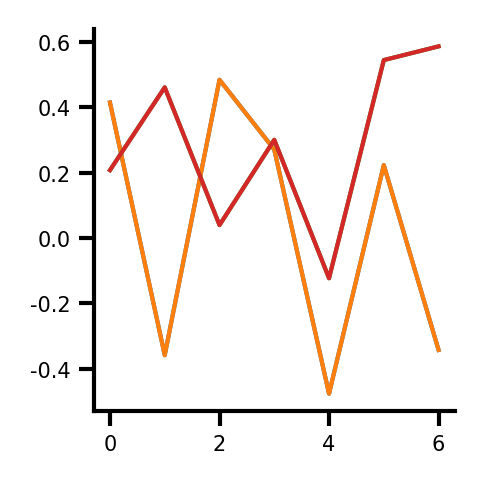

In [952]:
fig, ax = plt.subplots(figsize=(1.5, 1.5))
v = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", 
        r'$\mu_0$', r"$\mu_t$", r'$\sigma_0$']
for PC in range(2):
    ax.plot(pca.components_[PC, :],)
    ax.plot(pca.components_[PC, :], )

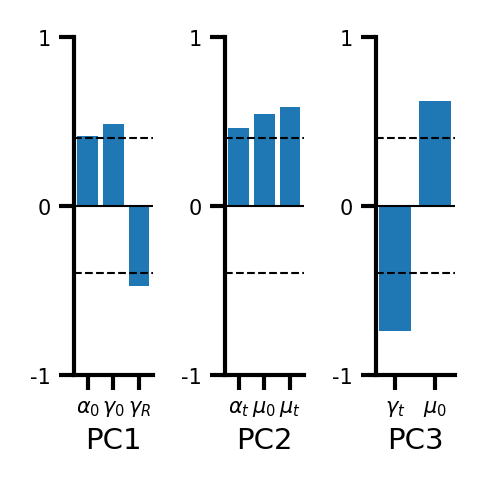

In [953]:
# keep features that are > 0.5 or < -0.5

limitPos = 0.4
limitNeg = -0.4
# filter out the features that are > 0.5 or < -0.5
important_features_PC1 = [_ > limitPos or _ < limitNeg for _ in pca.components_[0, :]]
strenght_important_features_PC1 = [_ for _ in pca.components_[0, :] if _ > limitPos or _ < limitNeg]
labels_PC1 = [v[i] for i, x in enumerate(important_features_PC1) if x]

important_features_PC2 = [_ > limitPos or _ < limitNeg for _ in pca.components_[1, :]]
strenght_important_features_PC2 = [_ for _ in pca.components_[1, :] if _ > limitPos or _ < limitNeg]
labels_PC2 = [v[i] for i, x in enumerate(important_features_PC2) if x]

important_features_PC3 = [_ > limitPos or _ < limitNeg for _ in pca.components_[2, :]]
strenght_important_features_PC3 = [_ for _ in pca.components_[2, :] if _ > limitPos or _ < limitNeg]
labels_PC3 = [v[i] for i, x in enumerate(important_features_PC3) if x]



fig, axs = plt.subplots(1, 3, figsize=(1.5, 1.5))
axs[0].bar(labels_PC1, strenght_important_features_PC1, )
axs[0].set_xlabel('PC1')
axs[1].bar(labels_PC2, strenght_important_features_PC2, )
axs[1].set_xlabel('PC2')
axs[2].bar(labels_PC3, strenght_important_features_PC3, )
axs[2].set_xlabel('PC3')

for ax in axs:
    ax.set_ylim(-1, 1)
    ax.set_yticks([-1, 0, 1])
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axhline(limitPos, color='black', linewidth=0.5, linestyle='--')
    ax.axhline(limitNeg, color='black', linewidth=0.5, linestyle='--')

PC1 vs epsilon_0: r_value = 0.5313023259460015, p_value = 0.04153998041335629, std_err = 0.5211956082555599
PC2 vs epsilon_0: r_value = 0.5199009327318173, p_value = 0.003232612925191836, std_err = 0.44553692426514113
PC3 vs epsilon_0: r_value = 0.5207183523747102, p_value = 0.0002453768856732137, std_err = 0.40516362996352107


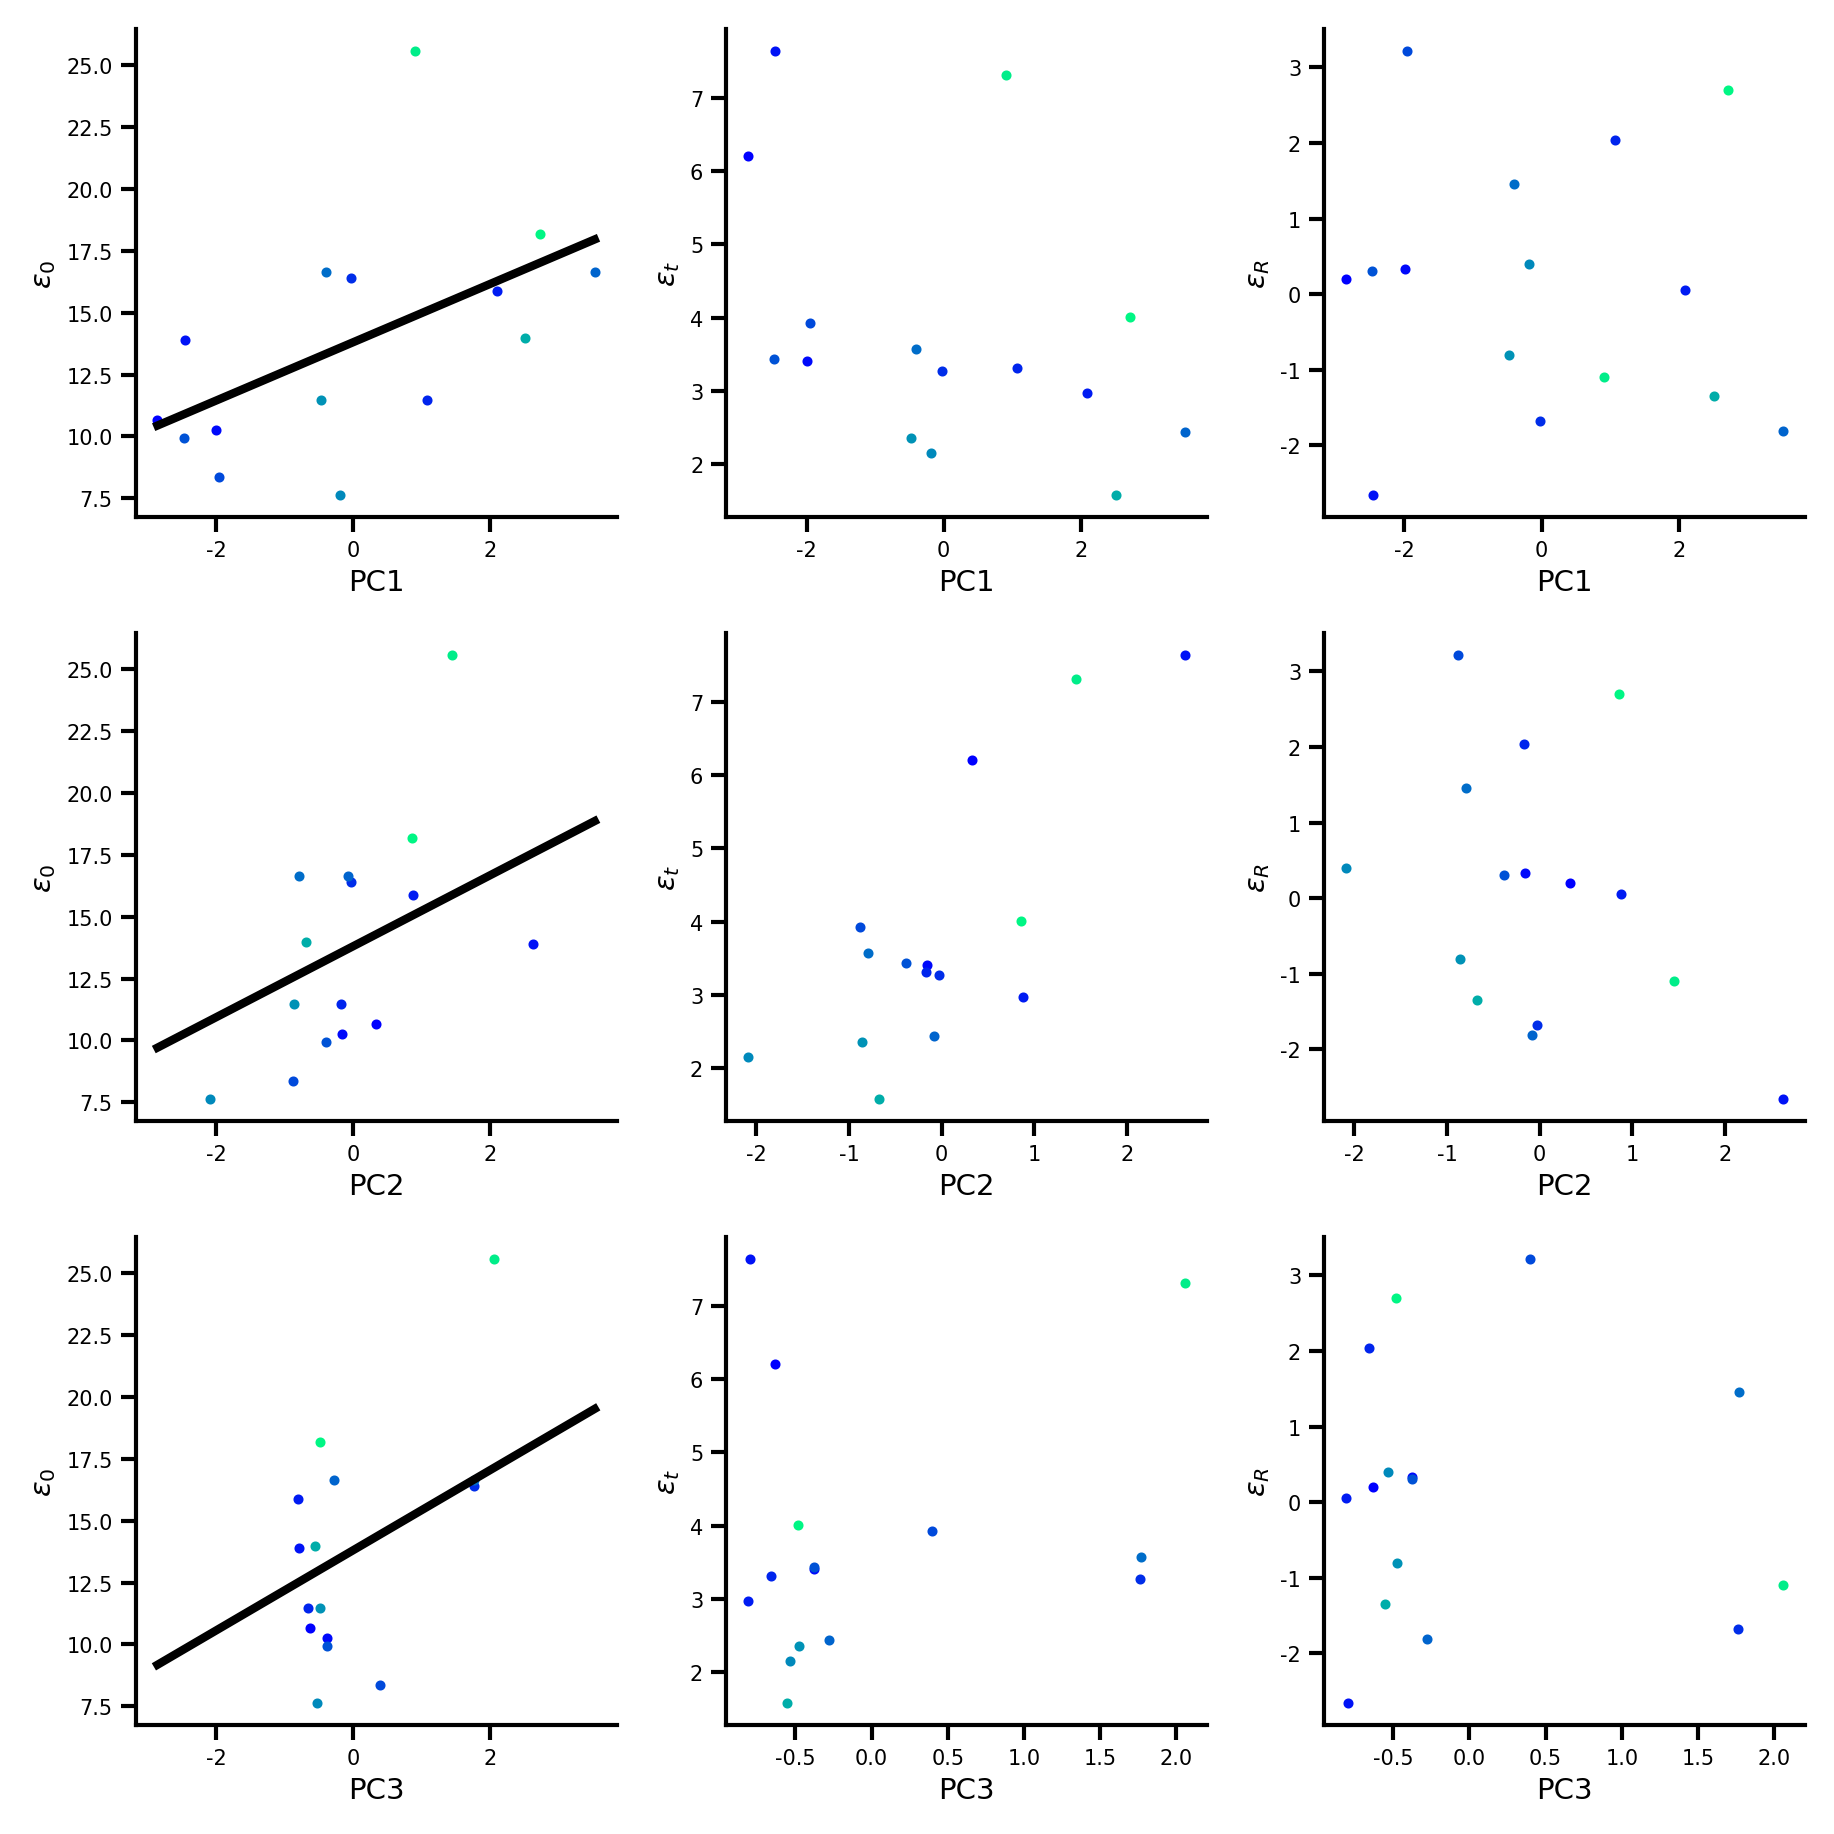

In [980]:
epsilon_0, epsilon_t, epsilon_R = pickle.load(open("picklejar/TESTeffort_fit.p", "rb"))

fig, axs = plt.subplots(3, 3, figsize=(6, 6), constrained_layout=True)
x1, y1 = [], []
x2, y2 = [], []
x3, y3 = [], []

for i in range(3):
    for animal, loadings in zip(labels, X_new):
        
        axs[i, 0].scatter(loadings[i], epsilon_0[animal], color=rat_markers[animal][0], s=2)
        axs[i, 1].scatter(loadings[i], epsilon_t[animal], color=rat_markers[animal][0], s=2)
        axs[i, 2].scatter(loadings[i], epsilon_R[animal], color=rat_markers[animal][0], s=2)

        axs[i, 0].set_ylabel(r'$\epsilon_0$')
        axs[i, 1].set_ylabel(r'$\epsilon_t$')
        axs[i, 2].set_ylabel(r'$\epsilon_R$')

        axs[i, 0].set_xlabel(f'PC{i+1}')
        axs[i, 1].set_xlabel(f'PC{i+1}')
        axs[i, 2].set_xlabel(f'PC{i+1}')

        x1.append(loadings[i])
        y1.append(epsilon_0[animal])
        x2.append(loadings[i])
        y2.append(epsilon_t[animal])
        x3.append(loadings[i])
        y3.append(epsilon_R[animal])


        # regressions

    gradient, intercept, r_value, p_value, std_err = stats.linregress(x1, y1)
    axs[i, 0].plot(np.linspace(np.min(x1), np.max(x1), 100), 
                gradient * np.linspace(np.min(x1), np.max(x1), 100) + intercept, color='black', lw=2)
    print(f"PC{i+1} vs epsilon_0: r_value = {r_value}, p_value = {p_value}, std_err = {std_err}")

    # gradient, intercept, r_value, p_value, std_err = stats.linregress(x2, y2)
    # axs[i, 1].plot(np.linspace(np.min(x2), np.max(x2), 100),
    #             gradient * np.linspace(np.min(x2), np.max(x2), 100) + intercept, color='black', lw=2)
    # print(f"PC{i+1} vs epsilon_t: r_value = {r_value}, p_value = {p_value}, std_err = {std_err}")

    # gradient, intercept, r_value, p_value, std_err = stats.linregress(x3, y3)
    # axs[i, 2].plot(np.linspace(np.min(x3), np.max(x3), 100),
    #             gradient * np.linspace(np.min(x3), np.max(x3), 100) + intercept, color='black', lw=2)
    # print(f"PC{i+1} vs epsilon_R: r_value = {r_value}, p_value = {p_value}, std_err = {std_err}")



PC1 vs epsilon_0: r_value = 0.2378462056347933, p_value = 0.39332247978788626, std_err = 0.001914541269945135
PC2 vs epsilon_0: r_value = 0.4001475344828501, p_value = 0.028449119810128102, std_err = 0.0015314610538061033
PC3 vs epsilon_0: r_value = 0.4182655777752957, p_value = 0.004246854077749817, std_err = 0.001381141022279336


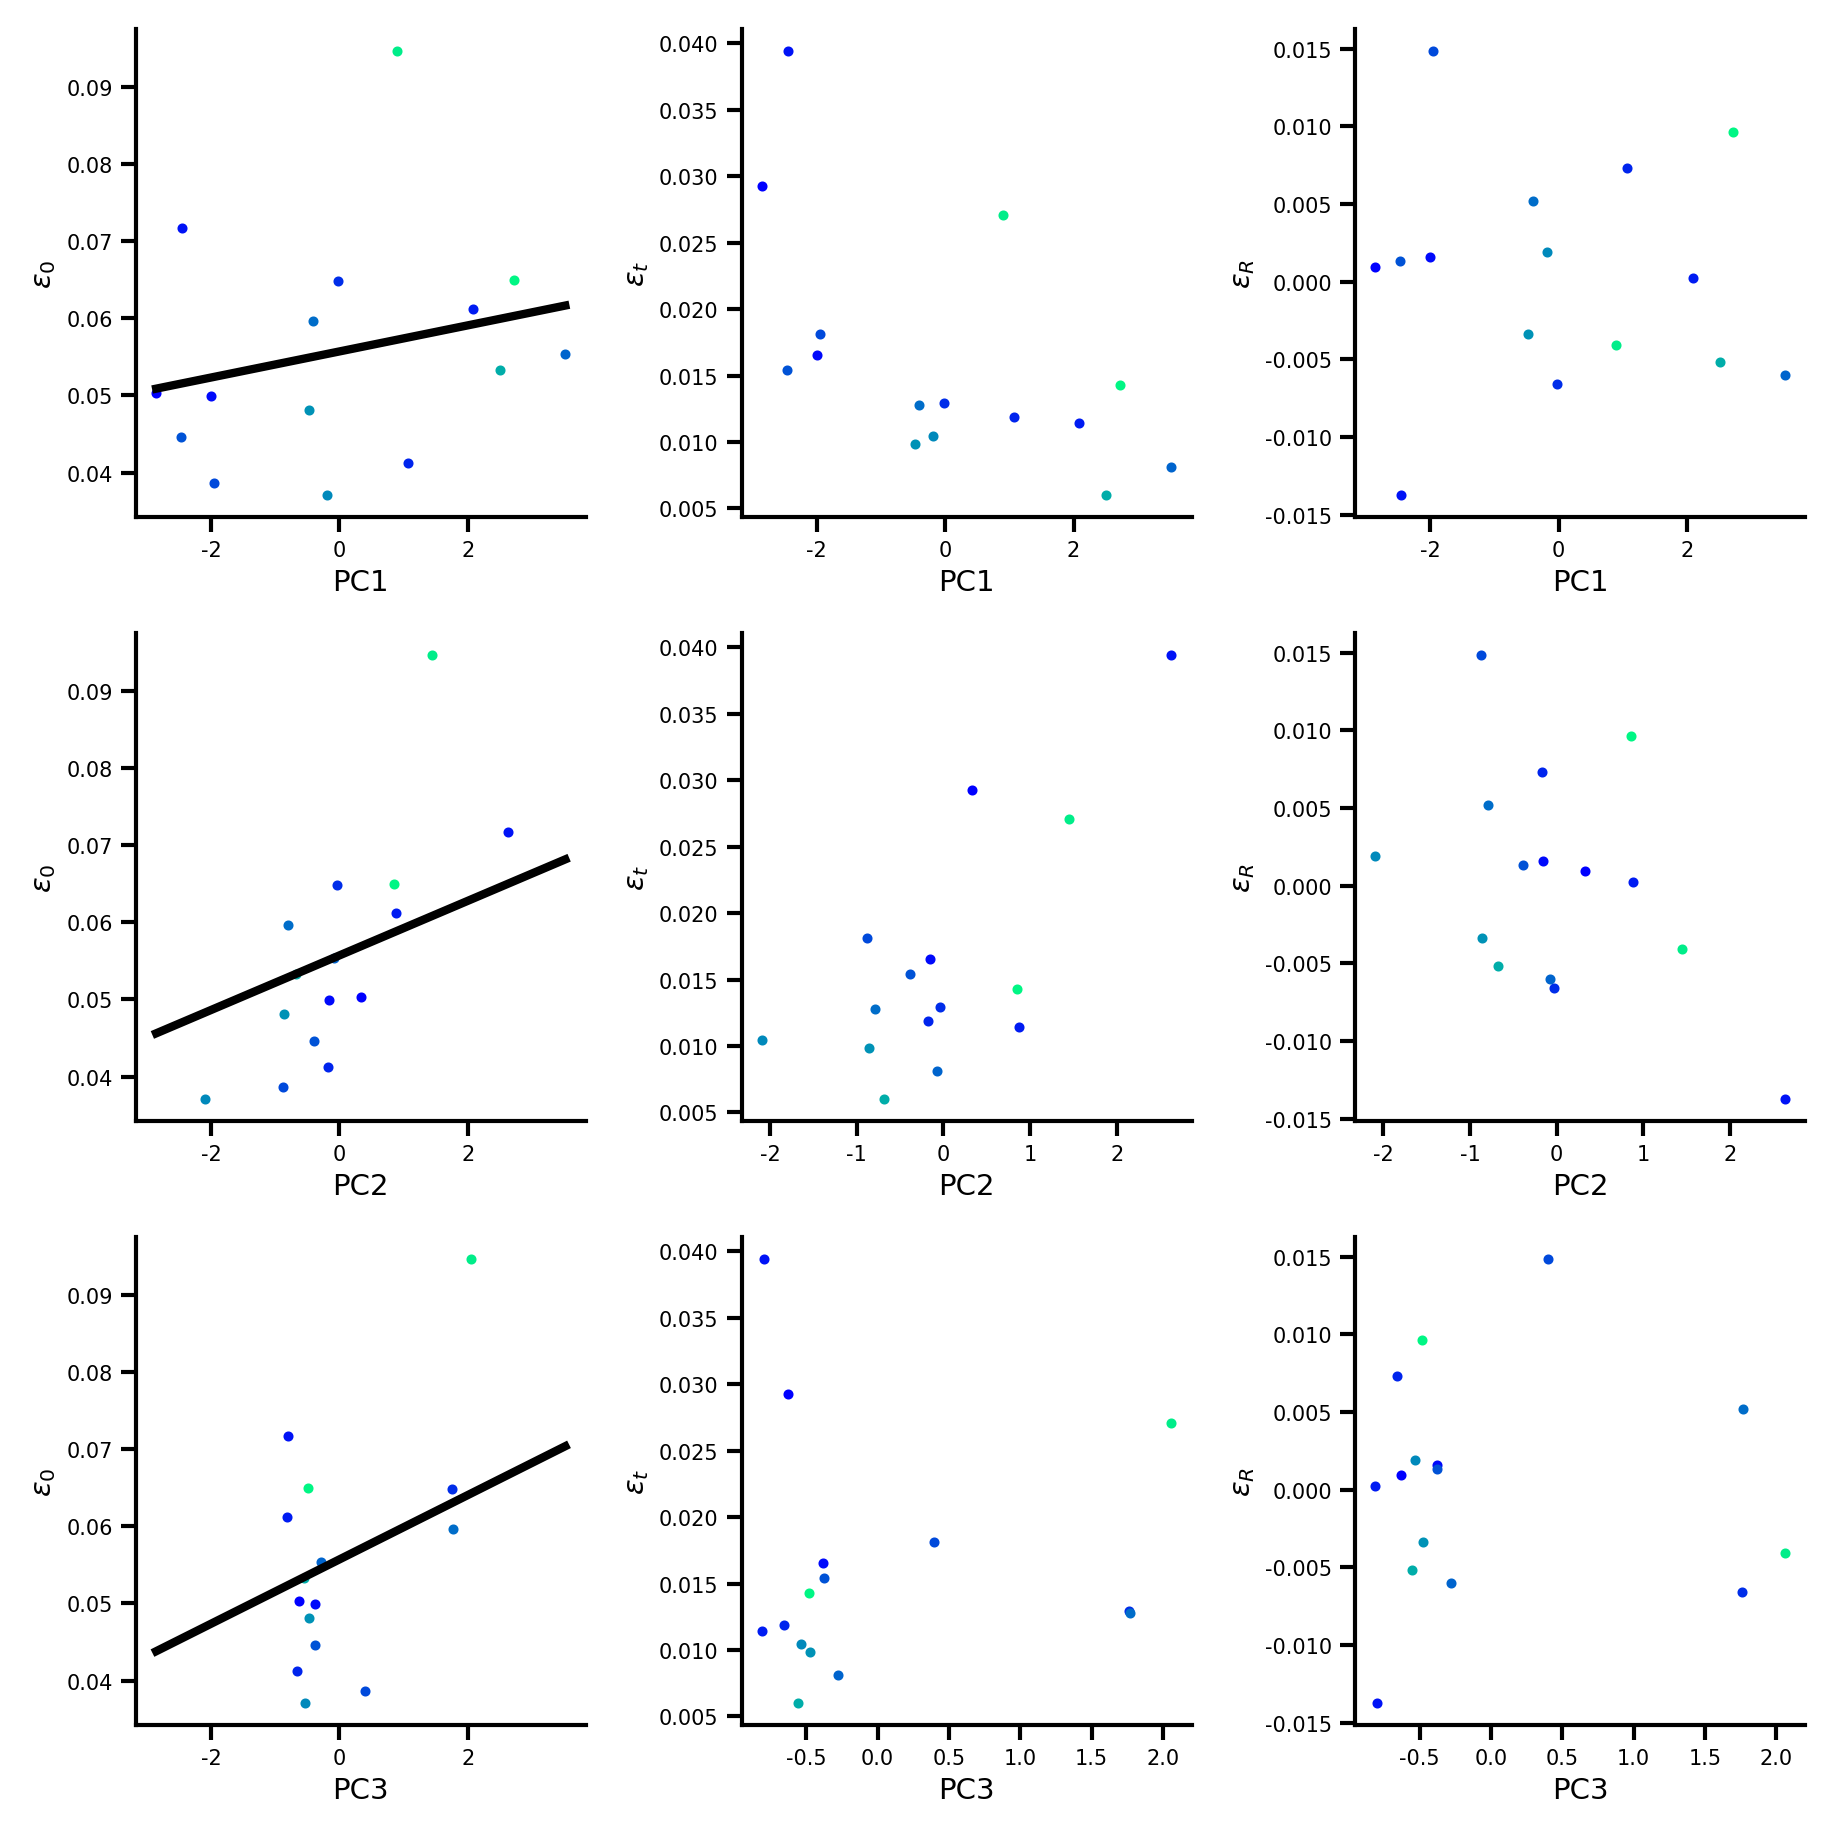

In [981]:
epsilon_0, epsilon_t, epsilon_R = pickle.load(open("picklejar/TESTeffort_fit.p", "rb"))

fig, axs = plt.subplots(3, 3, figsize=(6, 6), constrained_layout=True)
x1, y1 = [], []
x2, y2 = [], []
x3, y3 = [], []

for i in range(3):
    for animal, loadings in zip(labels, X_new):
        
        axs[i, 0].scatter(loadings[i], epsilon_0[animal]/weights[animal], color=rat_markers[animal][0], s=2)
        axs[i, 1].scatter(loadings[i], epsilon_t[animal]/weights[animal], color=rat_markers[animal][0], s=2)
        axs[i, 2].scatter(loadings[i], epsilon_R[animal]/weights[animal], color=rat_markers[animal][0], s=2)

        axs[i, 0].set_ylabel(r'$\epsilon_0$')
        axs[i, 1].set_ylabel(r'$\epsilon_t$')
        axs[i, 2].set_ylabel(r'$\epsilon_R$')

        axs[i, 0].set_xlabel(f'PC{i+1}')
        axs[i, 1].set_xlabel(f'PC{i+1}')
        axs[i, 2].set_xlabel(f'PC{i+1}')

        x1.append(loadings[i])
        y1.append(epsilon_0[animal]/weights[animal])
        x2.append(loadings[i])
        y2.append(epsilon_t[animal]/weights[animal])
        x3.append(loadings[i])
        y3.append(epsilon_R[animal]/weights[animal])


        # regressions

    gradient, intercept, r_value, p_value, std_err = stats.linregress(x1, y1)
    axs[i, 0].plot(np.linspace(np.min(x1), np.max(x1), 100), 
                gradient * np.linspace(np.min(x1), np.max(x1), 100) + intercept, color='black', lw=2)
    print(f"PC{i+1} vs epsilon_0: r_value = {r_value}, p_value = {p_value}, std_err = {std_err}")

    # gradient, intercept, r_value, p_value, std_err = stats.linregress(x2, y2)
    # axs[i, 1].plot(np.linspace(np.min(x2), np.max(x2), 100),
    #             gradient * np.linspace(np.min(x2), np.max(x2), 100) + intercept, color='black', lw=2)
    # print(f"PC{i+1} vs epsilon_t: r_value = {r_value}, p_value = {p_value}, std_err = {std_err}")

    # gradient, intercept, r_value, p_value, std_err = stats.linregress(x3, y3)
    # axs[i, 2].plot(np.linspace(np.min(x3), np.max(x3), 100),
    #             gradient * np.linspace(np.min(x3), np.max(x3), 100) + intercept, color='black', lw=2)
    # print(f"PC{i+1} vs epsilon_R: r_value = {r_value}, p_value = {p_value}, std_err = {std_err}")



0.0013
0.815
0.2526


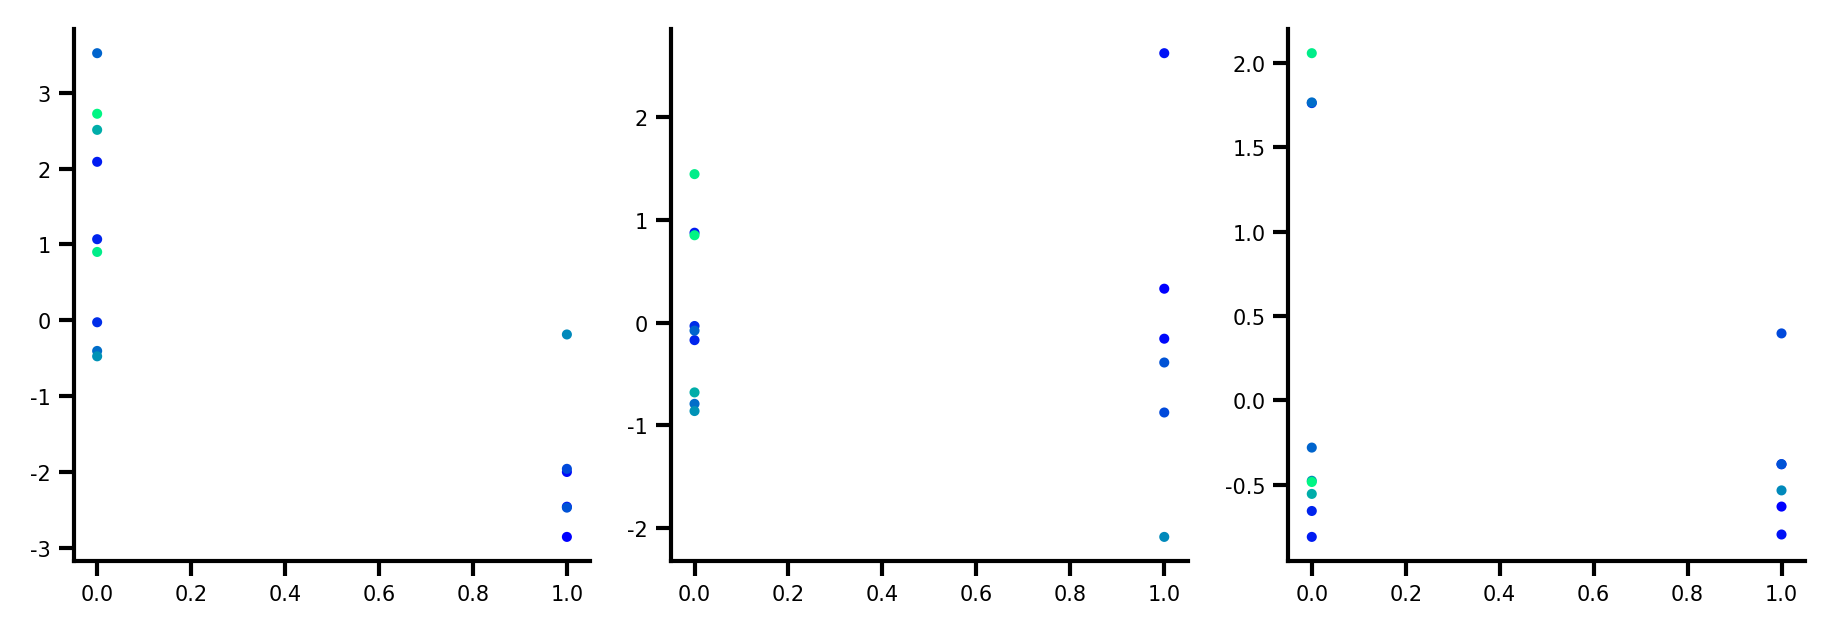

In [954]:
PC1_M, PC1_F = [], []
PC2_M, PC2_F = [], []
PC3_M, PC3_F = [], []

for animal, loadings in zip(labels, X_new):
    if animal[3] == 'M':
        PC1_M.append(loadings[0])
        PC2_M.append(loadings[1])
        PC3_M.append(loadings[2])
    else:
        PC1_F.append(loadings[0])
        PC2_F.append(loadings[1])
        PC3_F.append(loadings[2])


fig, axs = plt.subplots(1, 3, figsize=(6, 2), constrained_layout=True)
axs[0].scatter([0]*len(PC1_M), PC1_M, c=[rat_markers[animal][0] for animal in labels if animal[3] == 'M'], s=2)
axs[0].scatter([1]*len(PC1_F), PC1_F, c=[rat_markers[animal][0] for animal in labels if animal[3] == 'F'], s=2)

axs[1].scatter([0]*len(PC2_M), PC2_M, c=[rat_markers[animal][0] for animal in labels if animal[3] == 'M'],  s=2)
axs[1].scatter([1]*len(PC2_F), PC2_F, c=[rat_markers[animal][0] for animal in labels if animal[3] == 'F'],  s=2)

axs[2].scatter([0]*len(PC3_M), PC3_M, c=[rat_markers[animal][0] for animal in labels if animal[3] == 'M'], s=2)
axs[2].scatter([1]*len(PC3_F), PC3_F, c=[rat_markers[animal][0] for animal in labels if animal[3] == 'F'],  s=2)



print(exact_mc_perm_test(PC1_M, PC1_F))
print(exact_mc_perm_test(PC2_M, PC2_F))
print(exact_mc_perm_test(PC3_M, PC3_F))


PC1 corr: 0.84, p: 0.0001
PC2 corr: 0.02, p: 0.9451
PC3 corr: 0.31, p: 0.2560


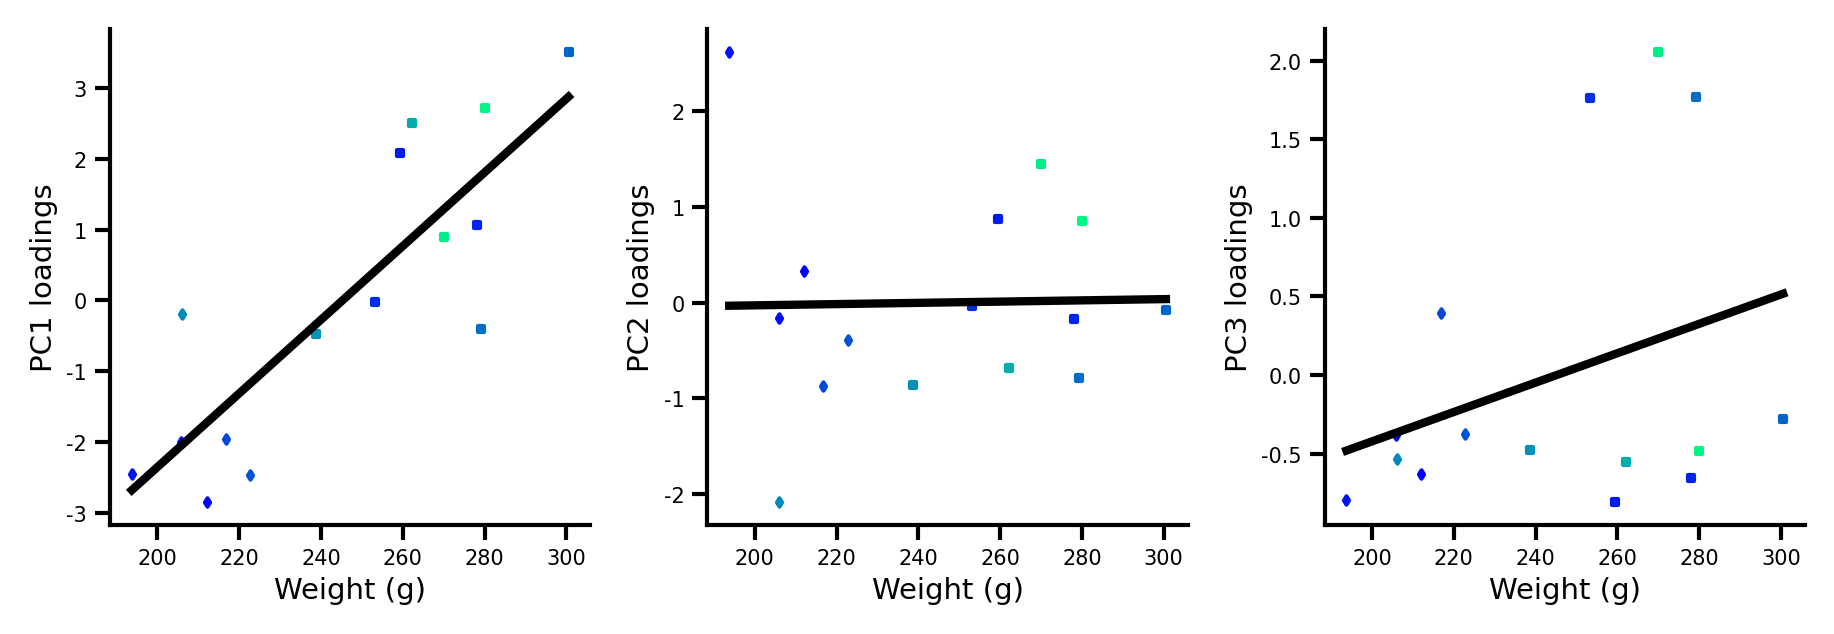

In [955]:
weights = {'RatF00': 212.02, 'RatF01': 205.85, 'RatF02': 193.75,
            'RatM00': 259.37, 'RatM01': 278.12, 'RatM02': 253.19,
            'RatF30': 217.32, 'RatF31': 228.95, 'RatF32': 216.80, 'RatF33': 222.77,
            'RatM30': 261.38, 'RatM31': 300.55, 'RatM32': 279.23, 
            'RatF40': 196.85, 'RatF41': 199.24, 'RatF42': 206.02,
            'RatM40': 238.70, 'RatM41': 238.19, 'RatM42': 242.87, 'RatM43': 262.23, 
            'RatF50': 180, 'RatF51': 205, 'RatF52': 175,##########################################
            'RatM50': 285, 'RatM51': 275, 'RatM52': 270, ##########################################
            'RatM53': 270, 'RatM54': 280 ##########################################
            }

fig, axs = plt.subplots(1, 3, figsize=(6, 2), constrained_layout=True)
for i in range(3):
    x, y = [], []
    for animal, loadings in zip(labels, X_new):
        axs[i].scatter(weights[animal], loadings[i], color=rat_markers[animal][0], marker=rat_markers[animal][1], s=2)
        axs[i].set_xlabel("Weight (g)")
        axs[i].set_ylabel(f"PC{i+1} loadings")

        x.append(weights[animal])
        y.append(loadings[i])


    pearson = stats.pearsonr(x, y)
    print(f'PC{i+1} corr: {pearson[0]:.2f}, p: {pearson[1]:.4f}')
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    axs[i].plot(np.linspace(np.min(x), np.max(x), 100), gradient * np.linspace(np.min(x), np.max(x), 100) + intercept, color='black', lw=2)
    # linear regression
    

   

In [956]:
conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]
totEffort = {animal: [] for animal in animalList}
totWater = {animal: [] for animal in animalList}
# for animal in animalList:
#     try:

#         l1 = [total_effort_by_animal[cond][animal] for cond in conds]
#         l2 = [total_drops_by_animal[cond][animal] for cond in conds]

#         print(animal, l1, np.sum(l1), l2, np.sum(l2))
#         totEffort[animal] = np.sum(np.array([total_effort_by_animal[cond][animal] for cond in conds]))
#         totWater[animal] = np.sum([total_drops_by_animal[cond][animal] for cond in conds])
#     except:
#         pass

# fig, axs = plt.subplots(1, 3, figsize=(6, 2), constrained_layout=True)
for idx, animal in enumerate(animalList):
    try:
        totEffort[animal] = np.sum([np.median(total_dist_by_animal[cond][animal]) for cond in conds])
        totWater[animal] = np.sum([np.median(total_drops_by_animal[cond][animal]) for cond in conds])
        # axs[0].plot([jdx+idx/15 for jdx in range(len(conds))], [np.median(total_dist_by_animal[cond][animal]) for cond in conds], color=rat_markers[animal][0])
        # axs[1].plot([jdx+idx/15 for jdx in range(len(conds))], [np.median(total_drops_by_animal[cond][animal]) for cond in conds], color=rat_markers[animal][0])
        # axs[2].plot([jdx+idx/15 for jdx in range(len(conds))], [np.median(total_effort_by_animal[cond][animal]) for cond in conds], color=rat_markers[animal][0])
    except:
        pass

PC1 corr: 0.80, p: 0.0009
PC1 corr: 0.83, p: 0.0005
PC2 corr: -0.36, p: 0.2328
PC2 corr: -0.41, p: 0.1613
PC3 corr: 0.15, p: 0.6339
PC3 corr: -0.05, p: 0.8586


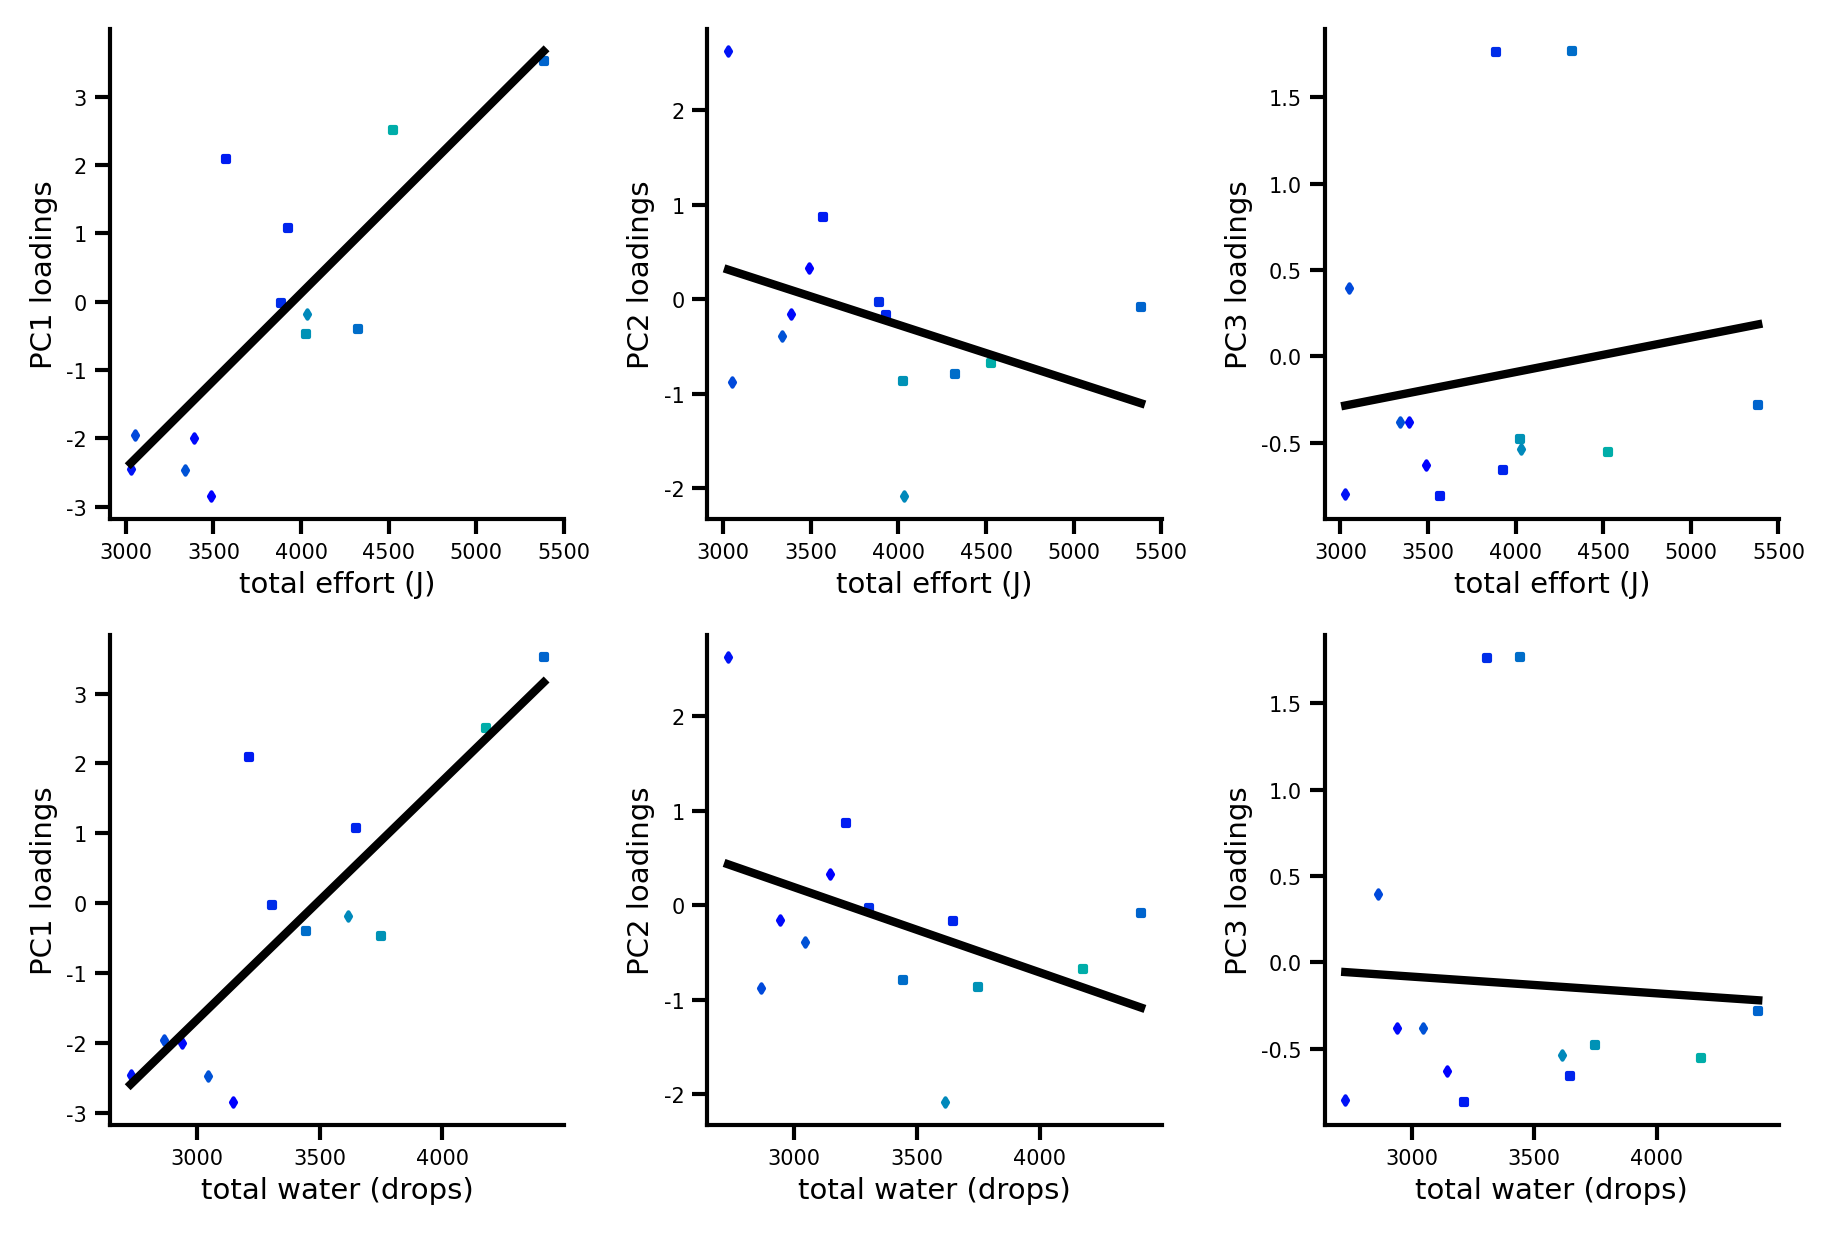

In [957]:
total_dist_by_animal, total_drops_by_animal, total_effort_by_animal = pickle.load(open("picklejar/totaldist_totaldrops_totaleffort.p", "rb"))


fig, axs = plt.subplots(2, 3, figsize=(6, 4), constrained_layout=True)
for i in range(3):
    xE, yE = [], []
    xW, yW = [], []
    for animal, loadings in zip(labels, X_new):
        try:
            axs[0, i].scatter(totEffort[animal], loadings[i], color=rat_markers[animal][0], marker=rat_markers[animal][1], s=2)
            axs[0, i].set_xlabel("total effort (J)")
            axs[0, i].set_ylabel(f"PC{i+1} loadings")

            xE.append(totEffort[animal])
            yE.append(loadings[i])


            axs[1, i].scatter(totWater[animal], loadings[i], color=rat_markers[animal][0], marker=rat_markers[animal][1], s=2)
            axs[1, i].set_xlabel("total water (drops)")
            axs[1, i].set_ylabel(f"PC{i+1} loadings")

            xW.append(totWater[animal])
            yW.append(loadings[i])

        except:
            pass


    pearson = stats.pearsonr(xE, yE)
    print(f'PC{i+1} corr: {pearson[0]:.2f}, p: {pearson[1]:.4f}')
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(xE, yE)
    axs[0, i].plot(np.linspace(np.min(xE), np.max(xE), 100), gradient * np.linspace(np.min(xE), np.max(xE), 100) + intercept, color='black', lw=2)


    pearson = stats.pearsonr(xW, yW)
    print(f'PC{i+1} corr: {pearson[0]:.2f}, p: {pearson[1]:.4f}')

    gradient, intercept, r_value, p_value, std_err = stats.linregress(xW, yW)
    axs[1, i].plot(np.linspace(np.min(xW), np.max(xW), 100), gradient * np.linspace(np.min(xW), np.max(xW), 100) + intercept, color='black', lw=2)

In [958]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax=None, n_std=2.0, color='k'):
    '''This is from https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html'''
    if ax is None:
        fig, ax = plt.subplots(figsize=(2, 2))

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)

    # contour
    ellipse_contour = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                        linewidth=1, color=color, fill=False, alpha=.8, zorder=1)
    # fill
    ellipse_fill = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                        linewidth=1, color=color, fill=True, alpha=0.1, zorder=0)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
                        .rotate_deg(45) \
                        .scale(scale_x, scale_y) \
                        .translate(mean_x, mean_y)

    ellipse_contour.set_transform(transf + ax.transData)
    ellipse_fill.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse_contour), ax.add_patch(ellipse_fill)
    # return ax.add_patch(ellipse)

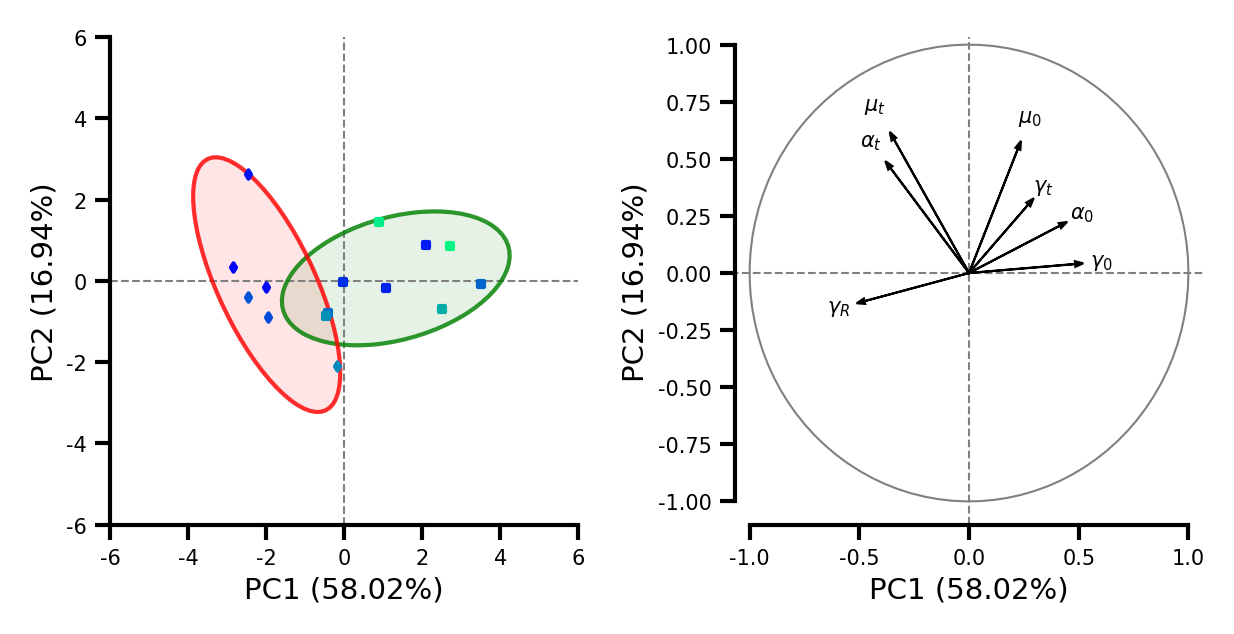

In [960]:
def PCA_individuals_plot(score, labels, pca=pca, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    x = score[:,0]  # PC1
    y = score[:,1]  # PC2

    x_males, y_males = [], []
    x_females, y_females = [], []

    for animal in labels:
        ax.scatter(x[labels==animal], y[labels==animal], 
                    c=[rat_markers[animal][0] for _ in range(len(x[labels==animal]))], 
                    marker=rat_markers[animal][1], s=2, zorder=10)

        if 'M' in animal:
            x_males.append(x[labels==animal])
            y_males.append(y[labels==animal])
        else:
            x_females.append(x[labels==animal])
            y_females.append(y[labels==animal])


    ax.axhline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)
    ax.axvline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')


    confidence_ellipse(np.array(x_males).flatten(), np.array(y_males).flatten(), color='g', ax=ax)
    confidence_ellipse(np.array(x_females).flatten(), np.array(y_females).flatten(), color='r', ax=ax)    

    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)

def PCA_variables_plot(coeff, variables=variables, pca=pca, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    assert len(coeff) == len(variables)

    for i, var in enumerate(variables):
        ax.arrow(0, 0, coeff[i, 0], coeff[i, 1], 
                color='k', linestyle='-', linewidth=.5, width=0.001, head_width=0.025, zorder=1)

        offset = 1.25
        x_offset, y_offset = 0, 0

        # # if two variables are close to each other, we don't want their names to overlap
        # for j in range(i+1, len(variables)):

        #         if np.abs(coeff[i, 0] - coeff[j, 0]) < 0.1 and np.abs(coeff[i, 1] - coeff[j, 1]) < 0.01:
        #             print(i, j , np.abs(coeff[i, 0] - coeff[j, 0]) , np.abs(coeff[i, 1] - coeff[j, 1]))
        #             if np.abs(coeff[i, 0] - coeff[j, 0]) < np.abs(coeff[i, 1] - coeff[j, 1]):
        #                 x_offset = .1
        #             else:
        #                 y_offset = .1

        # heck it, just do it manually
        # if i == 0:
        #     y_offset = .05
        # elif i == 3:
        #     y_offset = -.05
        # elif i == 6:
        #     x_offset = .025
        #     y_offset = .025
        # elif i == 8:
        #     x_offset = -.05
        # elif i == 11:
        #     x_offset = .05

        ax.text(coeff[i, 0]*offset+x_offset, coeff[i, 1]*offset+y_offset, var, 
                color='k', ha='center', va='center', fontsize=5)

    # plot circle
    theta = np.linspace(0, 2*np.pi, 100)
    radius = 1
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    ax.plot(x, y, color='gray', linewidth=.5, zorder=0)

    ax.axhline(0, xmin=-1, xmax=1, color='gray', linestyle='--', linewidth=.5, zorder=0)
    ax.axvline(0, ymin=-1, ymax=1, color='gray', linestyle='--', linewidth=.5, zorder=0)

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1-1/30, 1+1/30)
    space_axes(ax)
    ax.spines['left'].set_bounds(-1, 1)

v = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", 
        r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]

v = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", 
        r'$\mu_0$', r"$\mu_t$", r'$\sigma_0$']


v = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", 
        r'$\mu_0$', r"$\mu_t$"]

fig, axs = plt.subplots(1, 2, figsize=(4, 2), constrained_layout=True)
PCA_individuals_plot(X_new, labels, pca=pca, ax=axs[0])
PCA_variables_plot(np.transpose(pca.components_[0:2, :]), variables=v, pca=pca, ax=axs[1])


In [967]:
df = pd.DataFrame(X_new, index=intact)
# add a column with the color
# df['color'] = [rat_markers[animal][0] for animal in intact]
df['rat'] = intact
color_discrete_map = {animal: 'red' if 'F' in animal else 'green' for animal in intact}

# df = px.data.iris()
fig = px.scatter_3d(df, x=0, y=1, z=2, color='rat',
              color_discrete_map=color_discrete_map)
fig.show()

In [965]:
df

,0,1,2,rat
RatF00,-2.852922,0.330317,-0.630096,RatF00
RatF01,-1.997418,-0.157209,-0.379397,RatF01
RatF02,-2.455155,2.627092,-0.795575,RatF02
RatM00,2.089482,0.876311,-0.809789,RatM00
RatM01,1.069802,-0.171320,-0.656150,RatM01
RatM02,-0.024761,-0.033262,1.761407,RatM02
RatF32,-1.956138,-0.876955,0.396337,RatF32
RatF33,-2.467135,-0.389387,-0.378473,RatF33
RatM31,3.520752,-0.078526,-0.280420,RatM31
RatM32,-0.402500,-0.792500,1.765493,RatM32


# clustering rats and parameters

In [902]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

In [904]:
# params loadings

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=df.columns)
print(loadings)

              PC1       PC2       PC3
alpha    0.413870  0.207157  0.033188
alpha_t -0.358434  0.460336 -0.166030
gamma    0.483490  0.039270  0.094211
gamma_t  0.270131  0.299927 -0.738569
gamma_R -0.476161 -0.123259  0.160627
mu       0.222642  0.543667  0.623106
mu_t    -0.342352  0.585587 -0.053948


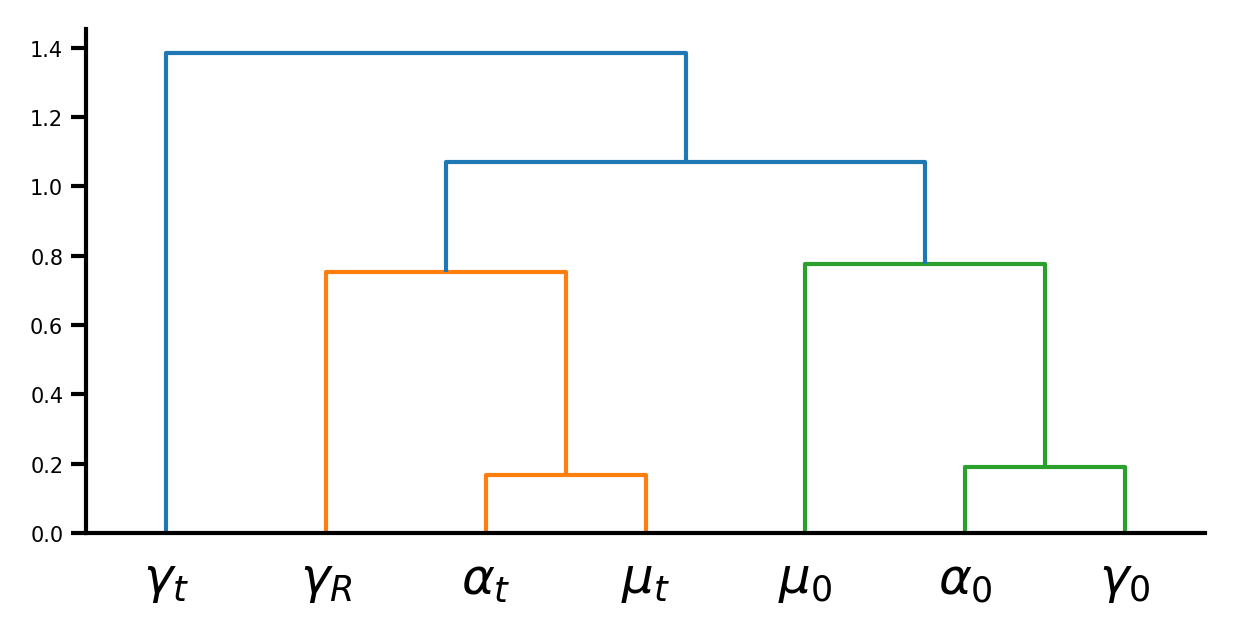

In [905]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
cl_mergings = linkage(loadings, method="complete", metric='euclidean')
dendrogram(cl_mergings, labels=v);

In [906]:
# rats 
df_ = pd.DataFrame(X_new, index=intact, columns=['PC1', 'PC2', 'PC3'])
df_.head()

,PC1,PC2,PC3
RatF00,-2.852922,0.330317,-0.630096
RatF01,-1.997418,-0.157209,-0.379397
RatF02,-2.455155,2.627092,-0.795575
RatM00,2.089482,0.876311,-0.809789
RatM01,1.069802,-0.171320,-0.656150


[0 0 0 1 1 1 0 0 1 1 1 1 1 1 1]


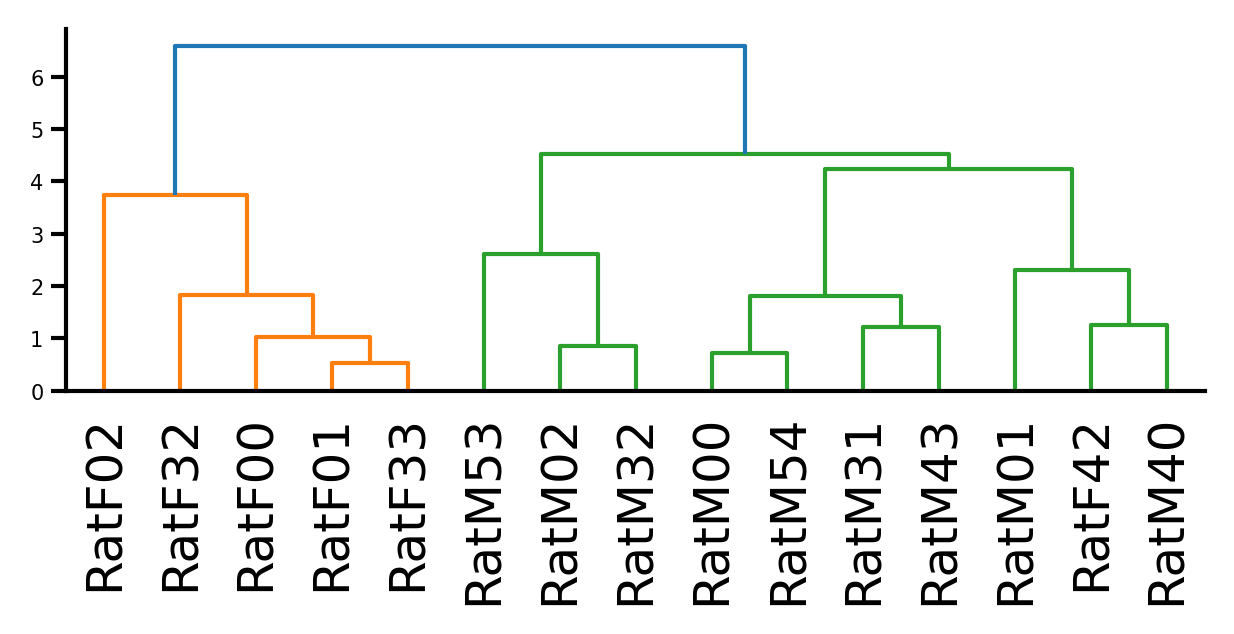

In [907]:
fig = plt.figure(figsize=(4, 2))
cl_mergings = linkage(df_, method="complete", metric='euclidean')
# cl_mergings = linkage(df_, method='ward', metric='euclidean')
dendrogram(cl_mergings, labels=intact, #orientation='left');
                orientation='top', leaf_rotation=90)

cl_cluster_labels = cut_tree(cl_mergings, n_clusters=2).reshape(-1, )
print(cl_cluster_labels)



plt.show()

# test all rats
Phenotyping Using Mulitdimensional Behavioral Analysis Algorithm? PUMBAAAAA

In [909]:
rat_markers = {}

brainstatus = {'RatF00': 'normal', 'RatF01': 'normal', 'RatF02': 'normal',
               'RatM00': 'normal', 'RatM01': 'normal', 'RatM02': 'normal',
            #    'RatF20': 'thcre', 'RatF21': 'thcre', 'RatF22': 'thcre',
            #    'RatM20': 'thcre', 'RatM21': 'thcre', 'RatM22': 'thcre',
               'RatF30': 'DLS', 'RatF31': 'DLS', 'RatF32': 'normal', 'RatF33': 'normal',
               'RatM30': 'DLS', 'RatM31': 'normal', 'RatM32': 'normal',
               'RatF40': 'DLS', 'RatF41': 'DMS', 'RatF42': 'normal',
               'RatM40': 'normal', 'RatM41': 'DLS', 'RatM42': 'DMS', 'RatM43': 'normal', 

                'RatF50': 'DMS', 'RatF51': 'DLS', 'RatF52': 'DLS',
               'RatM50': 'DMS', 'RatM51': 'DMS', 'RatM52': 'DLS', 'RatM53': 'normal', 'RatM54': 'normal'
               }

intact_map = plt.cm.get_cmap('winter')
lesion_map = plt.cm.get_cmap('autumn')


markers = {'normal': 'o', 'DLS': 'X', 'DMS': 'x'}
lines = {'normal': '-', 'DLS': '-', 'DMS': '-'}
colormaps = {'normal': intact_map, 'DLS': lesion_map, 'DMS': lesion_map}

# RATS
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
              'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
              'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43', 
                'RatF50', 'RatF51', 'RatF52', 'RatM50', 'RatM51', 'RatM52', 'RatM53', 'RatM54']


for index, animal in enumerate(animalList):
    # define marker and color for each rat, used in plots
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[colormaps[brainstatus[animal]](index/len(animalList)), 'd', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[colormaps[brainstatus[animal]](index/len(animalList)), 's', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")


In [910]:
alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R = pickle.load(open("picklejar/TESTintact_lesionFITS.p", "rb"))
vars = alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R
names = 'alpha', 'alpha_t', 'alpha_R', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t', 'mu_R', 'sigma', 'sigma_t', 'sigma_R'

vars = alpha, alpha_t, gamma, gamma_t, gamma_R, mu, mu_t, 
names = 'alpha', 'alpha_t', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t'

df = pd.DataFrame(index=animalList)
for var, name in zip(vars, names):
    l = np.array(list(compute_intercept(var, animalList).values()))
    df[name] = l / np.std(l)  # normalize by std to have a mean of 0 and std of 1
    print(name, np.mean(l), np.std(l), np.std(l / np.std(l)))

print(df.head())

# df to array
data = df.to_numpy()
labels = df.index.to_numpy()
variables = df.columns.to_numpy()


alpha 8.921435019309294e-18 0.3252328550983942 1.0
alpha_t -2.6020852139652106e-18 0.06211241470620747 1.0
gamma -2.3790493384824782e-17 0.17410176943136402 0.9999999999999999
gamma_t 2.4781763942525814e-19 0.021261459326329564 1.0
gamma_R -1.9825411154020653e-17 0.06320405405342805 0.9999999999999999
mu 9.615324409700017e-17 0.13847674240698266 1.0
mu_t 2.4781763942525814e-19 0.02467222307625765 1.0
           alpha   alpha_t     gamma   gamma_t   gamma_R        mu      mu_t
RatF00 -2.116956  0.741510 -1.866817  0.134251  1.352183 -0.754688  1.560492
RatF01 -1.019683  1.622434 -1.216751 -0.263678  1.187007 -0.897686  0.176880
RatF02 -0.580888  2.580704 -1.042453  0.322422  0.798133 -0.402573  2.611534
RatM00  1.528875  0.505138  0.610547  1.032139 -0.946793 -0.213578 -0.406405
RatM01  0.338007  0.172185  0.603456  0.329704 -0.718732 -0.791793 -0.200274


In [911]:
pca = PCA(n_components=3) # estimate only 2 PCs
X_new = pca.fit_transform(data) # project the original data into the PCA space



0.1777
0.0533


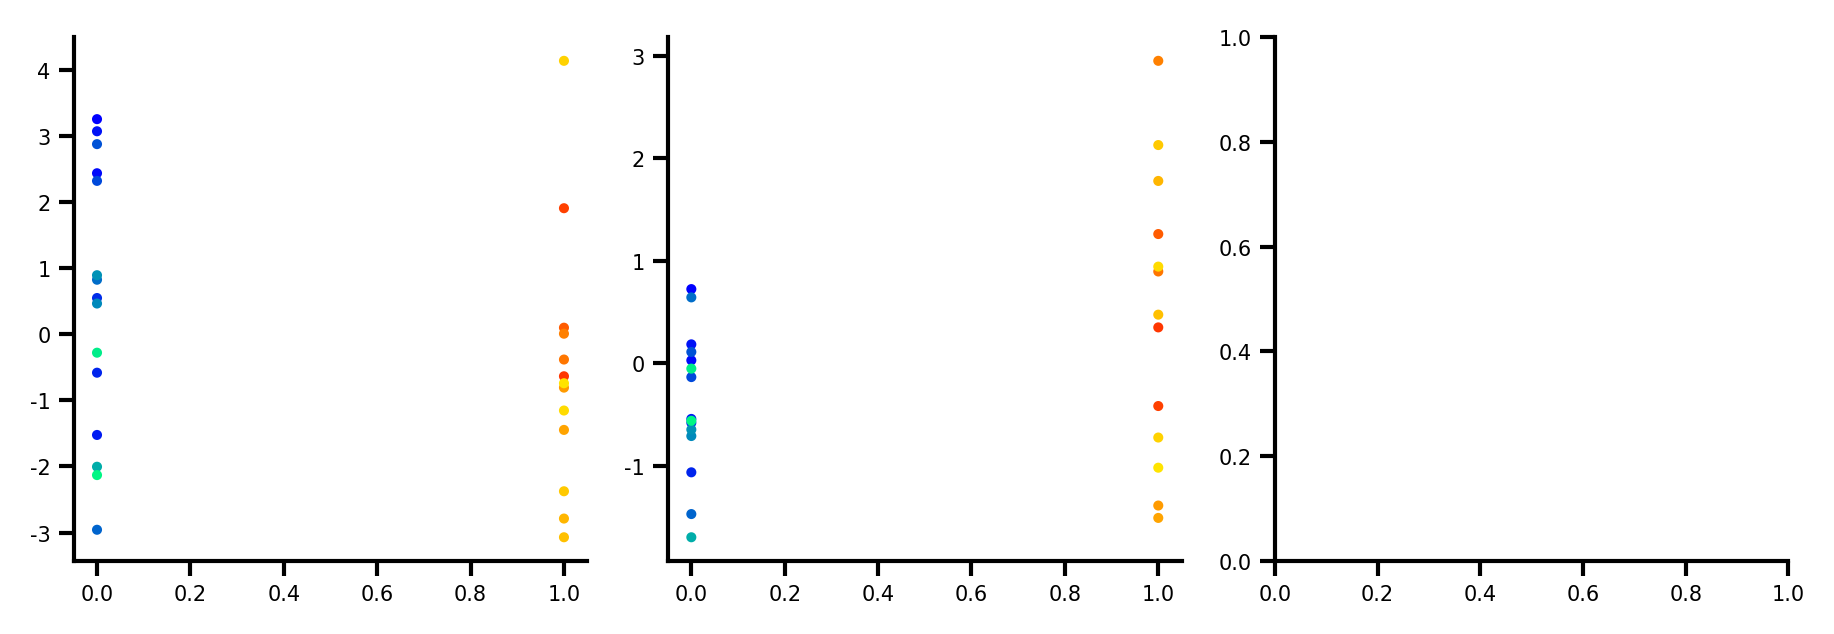

In [837]:
PC1_intact, PC2_intact, PC3_intact = [], [], []
PC1_lesion, PC2_lesion, PC3_lesion = [], [], []

for animal, loadings in zip(labels, X_new):
    if brainstatus[animal] == 'normal':
        PC1_intact.append(loadings[0])
        PC2_intact.append(loadings[1])
        # PC3_intact.append(loadings[2])
    else:
        PC1_lesion.append(loadings[0])
        PC2_lesion.append(loadings[1])
        # PC3_lesion.append(loadings[2])

fig, axs = plt.subplots(1, 3, figsize=(6, 2), constrained_layout=True)
axs[0].scatter([0]*len(PC1_intact), PC1_intact, c=[rat_markers[animal][0] for animal in labels if brainstatus[animal] == 'normal'], s=2)
axs[0].scatter([1]*len(PC1_lesion), PC1_lesion, c=[rat_markers[animal][0] for animal in labels if brainstatus[animal] != 'normal'], s=2)

axs[1].scatter([0]*len(PC2_intact), PC2_intact, c=[rat_markers[animal][0] for animal in labels if brainstatus[animal] == 'normal'],  s=2)
axs[1].scatter([1]*len(PC2_lesion), PC2_lesion, c=[rat_markers[animal][0] for animal in labels if brainstatus[animal] != 'normal'],  s=2)

# axs[2].scatter([0]*len(PC3_intact), PC3_intact, c=[rat_markers[animal][0] for animal in labels if brainstatus[animal] == 'normal'], s=2)
# axs[2].scatter([1]*len(PC3_lesion), PC3_lesion, c=[rat_markers[animal][0] for animal in labels if brainstatus[animal] != 'normal'],  s=2)


print(exact_mc_perm_test(PC1_intact, PC1_lesion))
print(exact_mc_perm_test(PC2_intact, PC2_lesion))
# print(exact_mc_perm_test(PC3_intact, PC3_lesion))


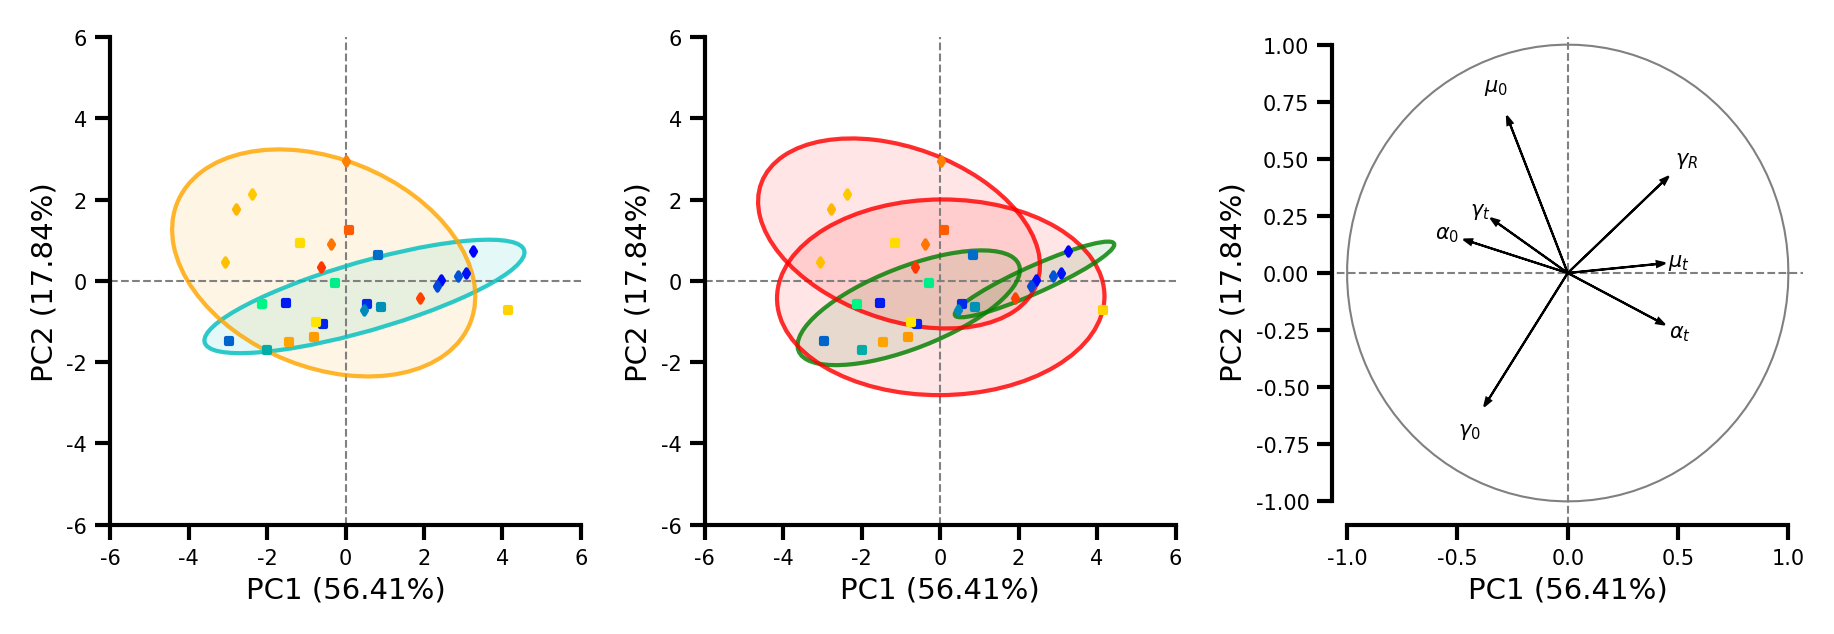

In [912]:
v = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", 
        r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]

v = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", 
        r'$\mu_0$', r"$\mu_t$",]


def PCA_lesion(score, labels, pca=pca, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    x = score[:,0]  # PC1
    y = score[:,1]  # PC2

    x_intact, y_intact = [], []
    x_lesion, y_lesion = [], []

    for animal in labels:
        ax.scatter(x[labels==animal], y[labels==animal], 
                    c=[rat_markers[animal][0] for _ in range(len(x[labels==animal]))], 
                    marker=rat_markers[animal][1], s=2, zorder=10)

        if animal in intact:
            x_intact.append(x[labels==animal])
            y_intact.append(y[labels==animal])
        else:
            x_lesion.append(x[labels==animal])
            y_lesion.append(y[labels==animal])


    ax.axhline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)
    ax.axvline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')


    confidence_ellipse(np.array(x_intact).flatten(), np.array(y_intact).flatten(), color='c', ax=ax)
    confidence_ellipse(np.array(x_lesion).flatten(), np.array(y_lesion).flatten(), color='orange', ax=ax)    

    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)

def PCA_individualsXlesion(score, labels, pca=pca, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    x = score[:,0]  # PC1
    y = score[:,1]  # PC2

    x_intactM, y_intactM = [], []
    x_lesionM, y_lesionM = [], []
    x_intactF, y_intactF = [], []
    x_lesionF, y_lesionF = [], []

    for animal in labels:
        ax.scatter(x[labels==animal], y[labels==animal], 
                    c=[rat_markers[animal][0] for _ in range(len(x[labels==animal]))], 
                    marker=rat_markers[animal][1], s=2, zorder=10)

        if animal in intact:
            if 'M' in animal:
                x_intactM.append(x[labels==animal])
                y_intactM.append(y[labels==animal])
            else:
                x_intactF.append(x[labels==animal])
                y_intactF.append(y[labels==animal])

        else:
            if 'M' in animal:
                x_lesionM.append(x[labels==animal])
                y_lesionM.append(y[labels==animal])
            else:
                x_lesionF.append(x[labels==animal])
                y_lesionF.append(y[labels==animal])


    ax.axhline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)
    ax.axvline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

    confidence_ellipse(np.array(x_intactM).flatten(), np.array(y_intactM).flatten(), color='g', ax=ax)
    confidence_ellipse(np.array(x_lesionM).flatten(), np.array(y_lesionM).flatten(), color='r', ax=ax)
    confidence_ellipse(np.array(x_intactF).flatten(), np.array(y_intactF).flatten(), color='g', ax=ax)
    confidence_ellipse(np.array(x_lesionF).flatten(), np.array(y_lesionF).flatten(), color='r', ax=ax)

    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)


fig, axs = plt.subplots(1,3 , figsize=(6, 2), constrained_layout=True)
PCA_lesion(X_new, labels, pca=pca, ax=axs[0])
PCA_individualsXlesion(X_new, labels, pca=pca, ax=axs[1])
PCA_variables_plot(np.transpose(pca.components_[0:2, :]), variables=v, pca=pca, ax=axs[2])

              PC1       PC2       PC3
alpha   -0.435863  0.135736  0.064393
alpha_t  0.405989 -0.208684 -0.362523
gamma   -0.358161 -0.552384  0.272663
gamma_t -0.318141  0.218732 -0.827110
gamma_R  0.429212  0.397279  0.149108
mu      -0.261706  0.652443  0.284959
mu_t     0.403719  0.039291  0.050390


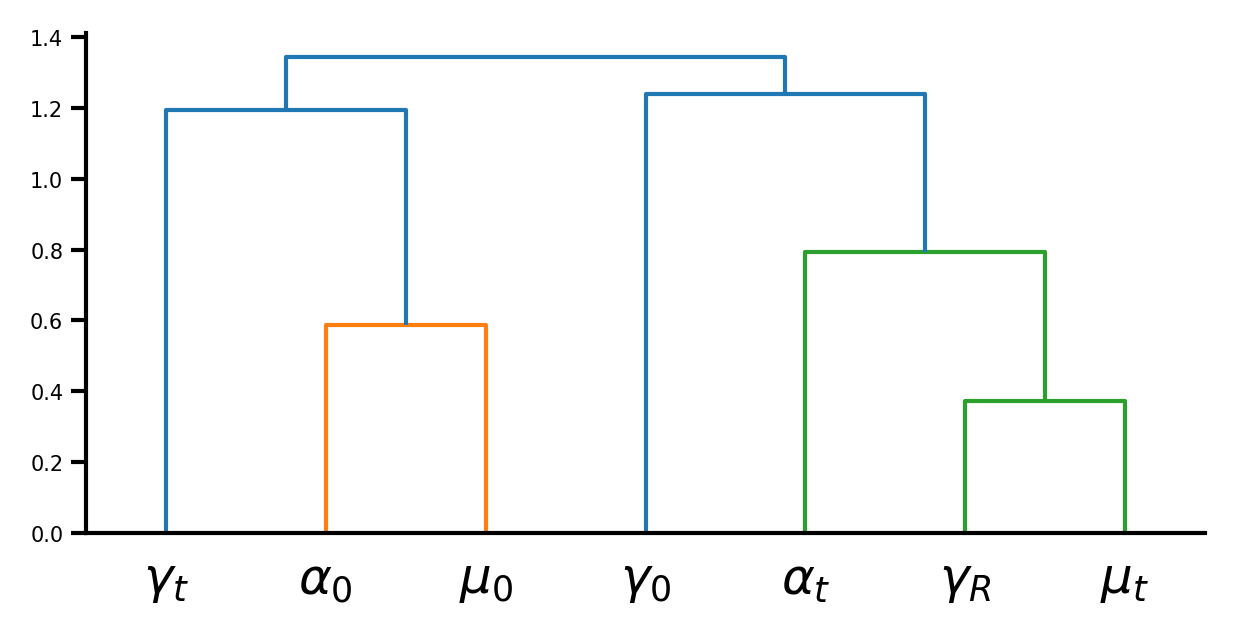

In [913]:
# params loadings

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=df.columns)
print(loadings)
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
cl_mergings = linkage(loadings, method="complete", metric='euclidean')
dendrogram(cl_mergings, labels=v);

[0 0 0 1 1 2 2 0 0 0 2 1 2 2 2 2 2 1 1 1 3 3 3 0 2 1 2 1]


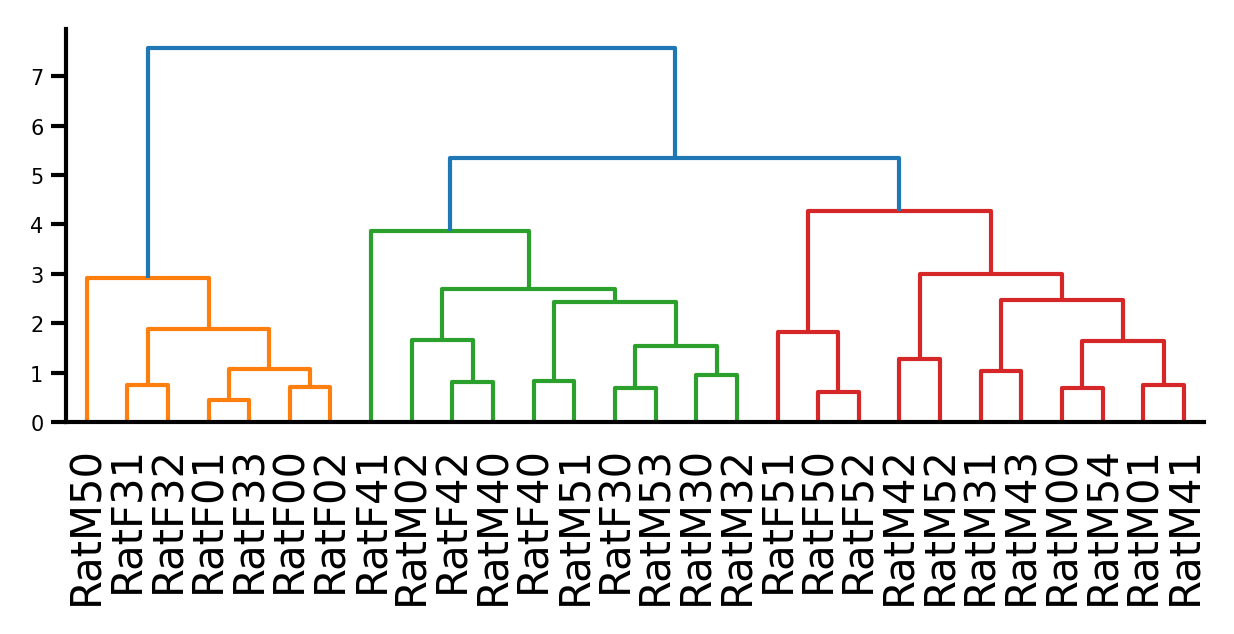

In [914]:
# rats 
df_ = pd.DataFrame(X_new, index=animalList, columns=['PC1', 'PC2', 'PC3'])
df_.head()
fig = plt.figure(figsize=(4, 2))
cl_mergings = linkage(df_, method="complete", metric='euclidean')
# cl_mergings = linkage(df_, method='ward', metric='euclidean')
dendrogram(cl_mergings, labels=animalList, #orientation='left');
                orientation='top', leaf_rotation=90)

cl_cluster_labels = cut_tree(cl_mergings, n_clusters=4).reshape(-1, )
print(cl_cluster_labels)


plt.show()

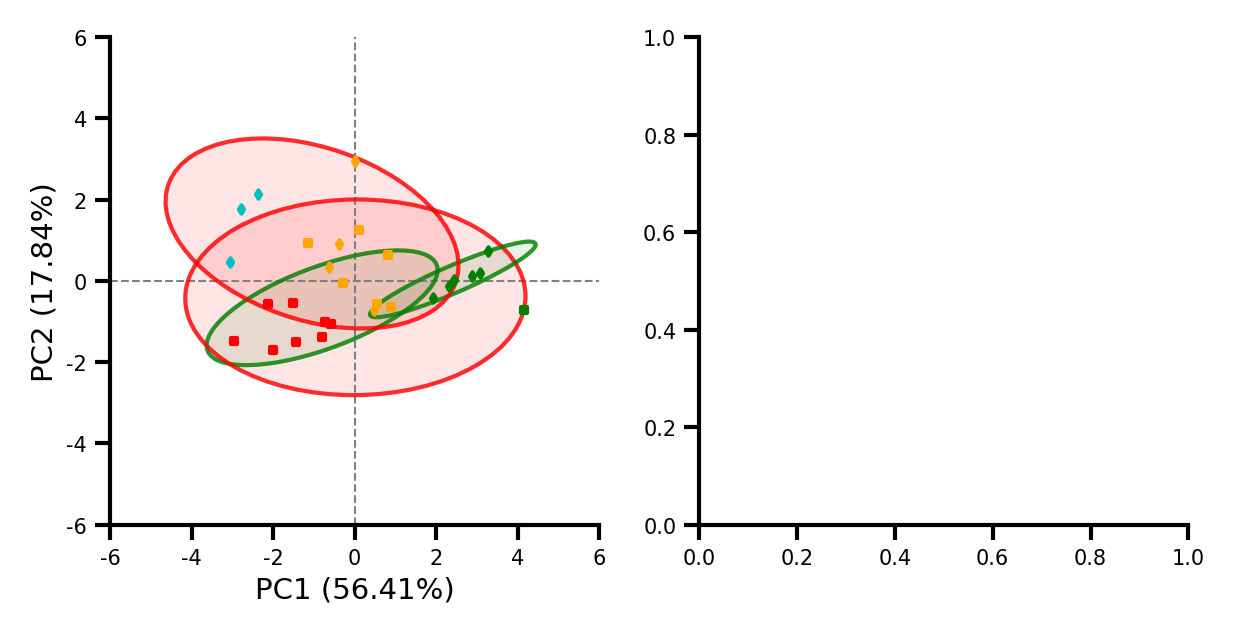

In [916]:
v = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", 
        r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]

v = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", 
        r'$\mu_0$', r"$\mu_t$",]


def PCA_individualsXlesion(score, labels, groups, pca=pca, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    x = score[:,0]  # PC1
    y = score[:,1]  # PC2

    x_intactM, y_intactM = [], []
    x_lesionM, y_lesionM = [], []
    x_intactF, y_intactF = [], []
    x_lesionF, y_lesionF = [], []

    group_colors = ['g', 'r', 'orange', 'c']

    for animal, group in zip(labels, groups):
        ax.scatter(x[labels==animal], y[labels==animal],
                    c=group_colors[group], 
                    marker=rat_markers[animal][1], s=2, zorder=10)


        if animal in intact:
            if 'M' in animal:
                x_intactM.append(x[labels==animal])
                y_intactM.append(y[labels==animal])
            else:
                x_intactF.append(x[labels==animal])
                y_intactF.append(y[labels==animal])

        else:
            if 'M' in animal:
                x_lesionM.append(x[labels==animal])
                y_lesionM.append(y[labels==animal])
            else:
                x_lesionF.append(x[labels==animal])
                y_lesionF.append(y[labels==animal])


    ax.axhline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)
    ax.axvline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

    confidence_ellipse(np.array(x_intactM).flatten(), np.array(y_intactM).flatten(), color='g', ax=ax)
    confidence_ellipse(np.array(x_lesionM).flatten(), np.array(y_lesionM).flatten(), color='r', ax=ax)
    confidence_ellipse(np.array(x_intactF).flatten(), np.array(y_intactF).flatten(), color='g', ax=ax)
    confidence_ellipse(np.array(x_lesionF).flatten(), np.array(y_lesionF).flatten(), color='r', ax=ax)

    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)


fig, axs = plt.subplots(1, 2, figsize=(4, 2), constrained_layout=True)
PCA_individualsXlesion(X_new, labels, cl_cluster_labels, pca=pca, ax=axs[0])

In [945]:
df = pd.DataFrame(X_new, index=animalList)
# add a column with the color
df['color'] = [rat_markers[animal][0] for animal in animalList]
df['rat'] = animalList
color_discrete_map = {animal: rat_markers[animal][0] for animal in animalList}

In [946]:

# df = px.data.iris()
fig = px.scatter_3d(df, x=0, y=1, z=2, color='rat',
              color_discrete_map=color_discrete_map)
fig.show()

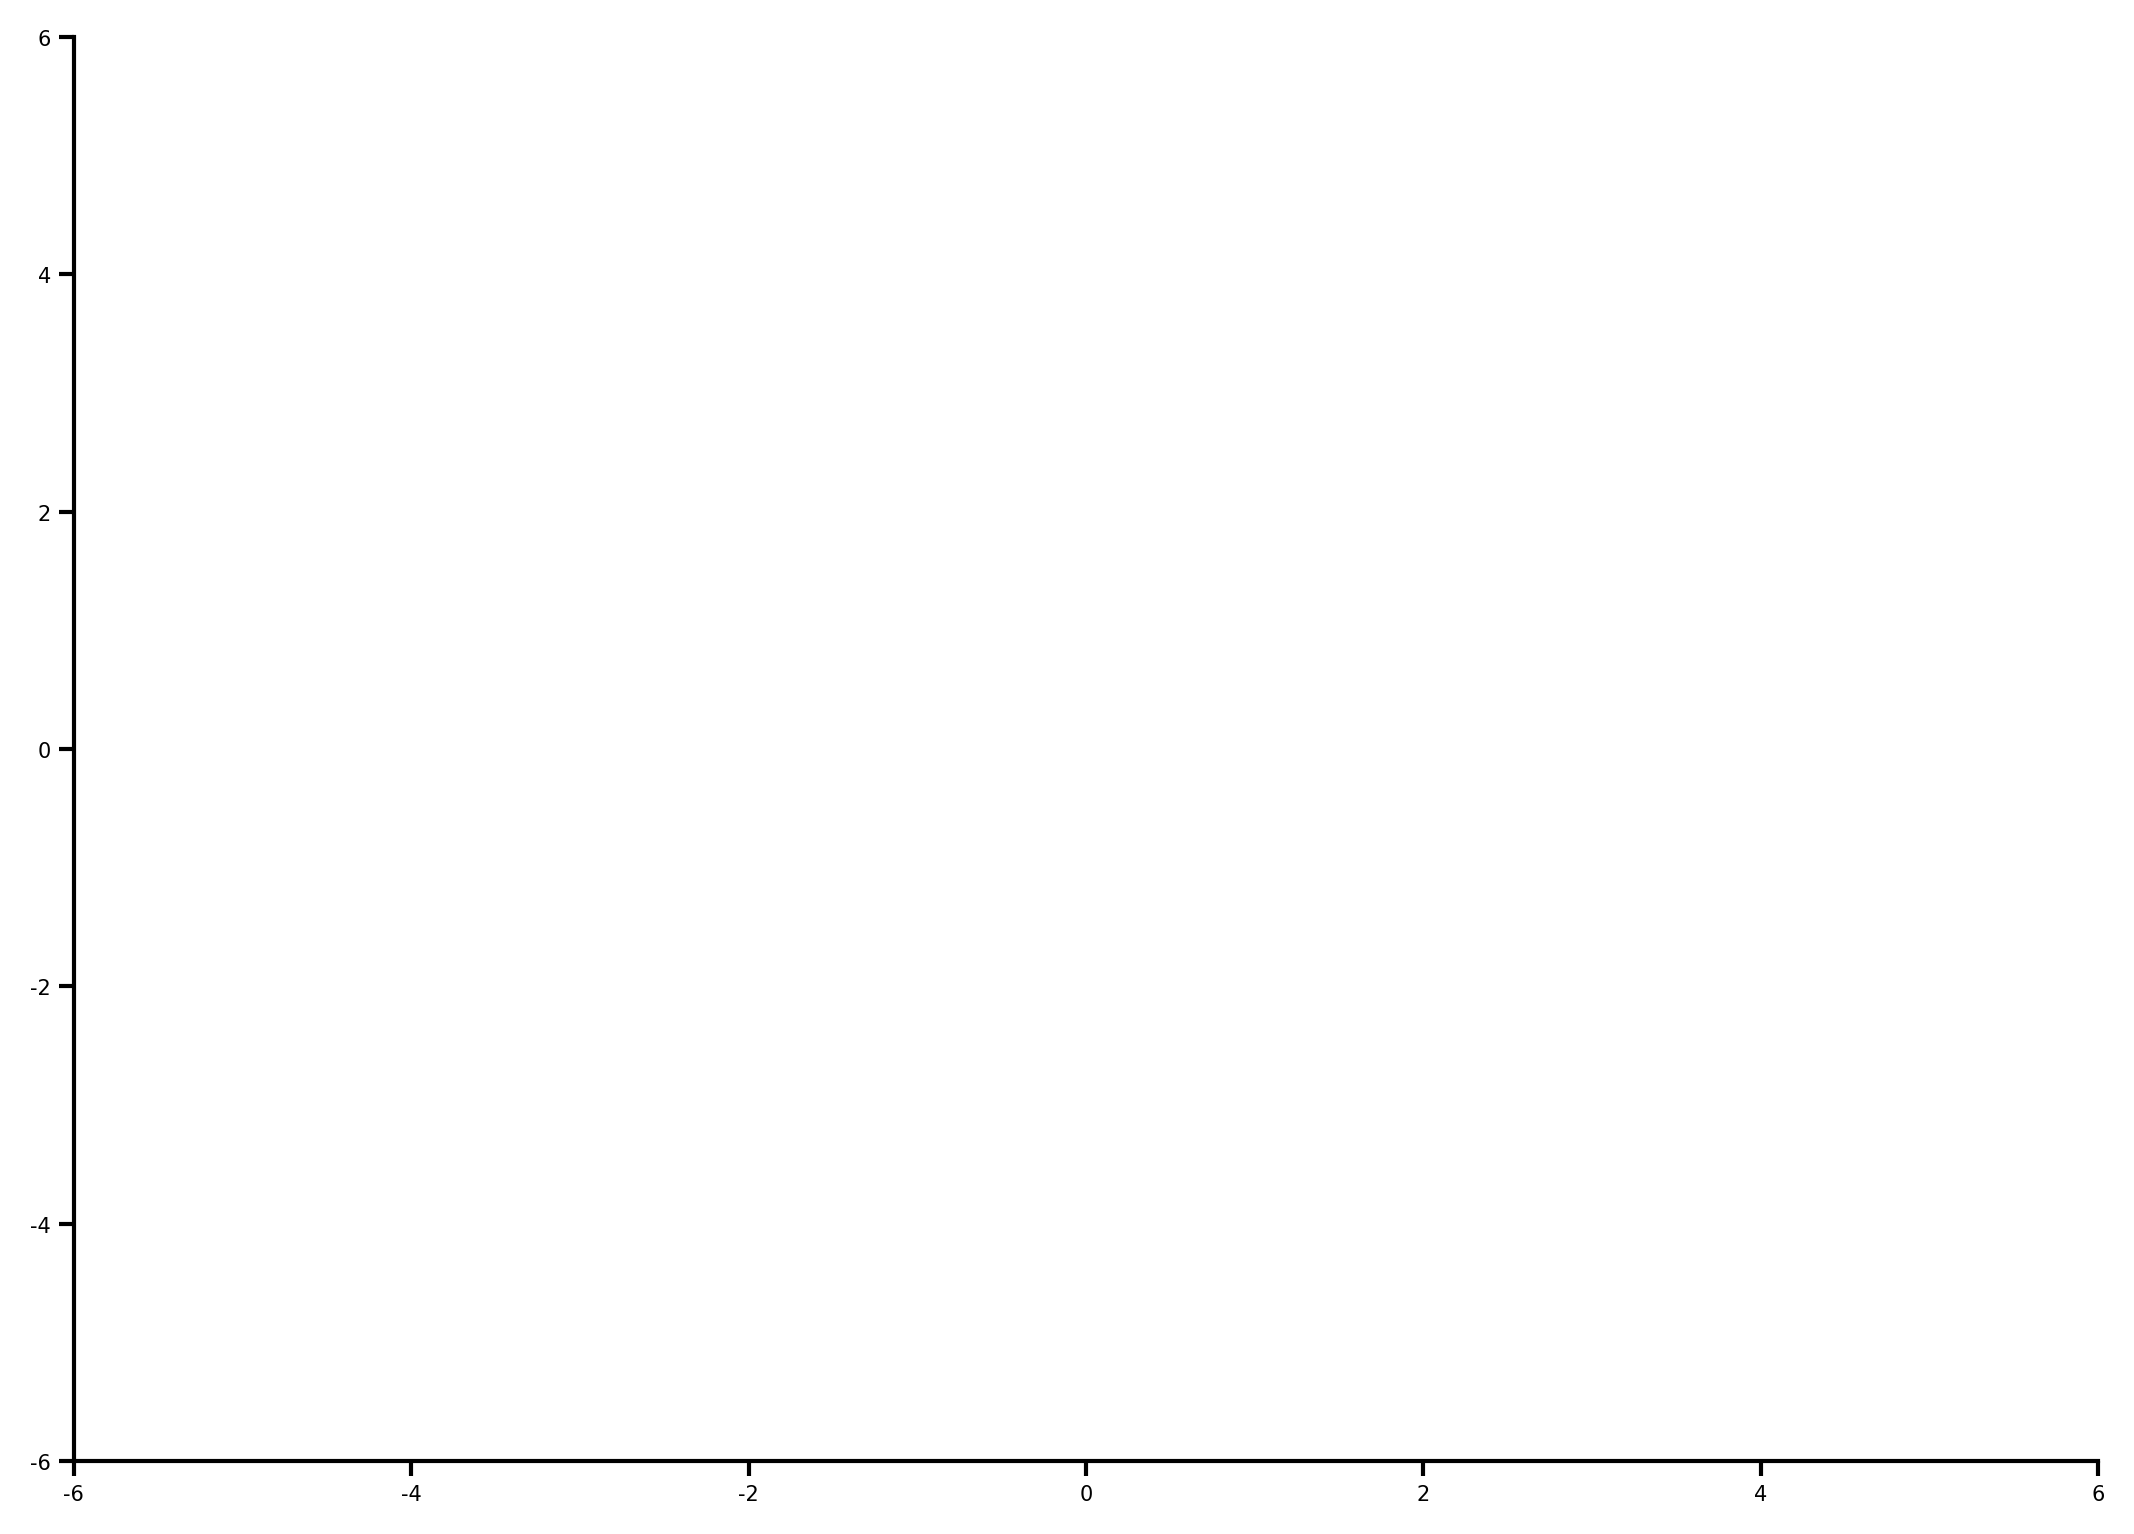

In [921]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


def PCA_3d_plot(score, labels, pca=pca, ax=None):
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111)

    x = score[:,0]  # PC1
    y = score[:,1]  # PC2
    z = score[:,2]  # PC3

    x_males, y_males, z_males = [], [], []
    x_females, y_females, z_females = [], [], []


    for animal in labels:
        px.scatter_3d(x[labels==animal], y[labels==animal], z[labels==animal])

        # if 'M' in animal:
        #     x_males.append(x[labels==animal])
        #     y_males.append(y[labels==animal])
        # else:
        #     x_females.append(x[labels==animal])
        #     y_females.append(y[labels==animal])


    # ax.axhline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)
    # ax.axvline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)

    # ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    # ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
    # ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)')


    # confidence_ellipse(np.array(x_males).flatten(), np.array(y_males).flatten(), color='g', ax=ax)
    # confidence_ellipse(np.array(x_females).flatten(), np.array(y_females).flatten(), color='r', ax=ax)    

    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)

PCA_3d_plot(X_new, labels, pca=pca)

# archetype with intercepts

In [772]:
alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R = pickle.load(open("picklejar/TESTintact_lesionFITS.p", "rb"))
vars = alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R
names = 'alpha', 'alpha_t', 'alpha_R', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t', 'mu_R', 'sigma', 'sigma_t', 'sigma_R'

# vars = alpha, alpha_t, gamma, gamma_t, gamma_R, mu, mu_t, sigma,
# names = 'alpha', 'alpha_t', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t', 'sigma'

df = pd.DataFrame(index=intact)
for var, name in zip(vars, names):
    l = np.array(list(compute_intercept(var, intact).values()))
    df[name] = l / np.std(l)  # normalize by std to have a mean of 0 and std of 1
    print(name, np.mean(l), np.std(l), np.std(l / np.std(l)))

print(df.head())

# df to array
data = df.to_numpy()
labels = df.index.to_numpy()
variables = df.columns.to_numpy()

alpha -7.401486830834377e-18 0.3072705270016046 0.9999999999999998
alpha_t -3.7007434154171884e-18 0.06340425893533076 1.0
alpha_R -1.0177044392397268e-17 0.10322174109121302 1.0
gamma -5.551115123125783e-17 0.19766851251217596 1.0
gamma_t -9.251858538542971e-19 0.016576111085099918 0.9999999999999999
gamma_R -7.401486830834377e-18 0.07131577027902372 0.9999999999999999
mu 9.251858538542971e-19 0.09176201500317431 1.0
mu_t 2.3129646346357427e-18 0.022322756701435763 1.0
mu_R 0.0 0.02908217306272269 1.0
sigma 8.673617379884035e-19 0.013855308411066233 0.9999999999999999
sigma_t 3.4694469519536144e-19 0.007724439341346578 0.9999999999999999
sigma_R 1.7347234759768072e-19 0.008170678220295904 0.9999999999999999
           alpha   alpha_t   alpha_R     gamma   gamma_t   gamma_R        mu  \
RatF00 -1.914221  0.386289  1.355656 -1.616920  0.227449  1.164140 -0.454166   
RatF01 -0.752804  1.249264  0.766233 -1.044358 -0.282957  1.017752 -0.669962   
RatF02 -0.288358  2.188010  0.916818 -0.89

In [773]:
def proc(data):
    model = AA_Fast(n_archetypes=3, max_iter=1000, tol=1e-6, verbose=True)
    archs = model.fit(data)
    return archs

def transform(data):
    A = proc(data).transform(data)
    return A

s = transform(data)
s.shape

(15, 3)

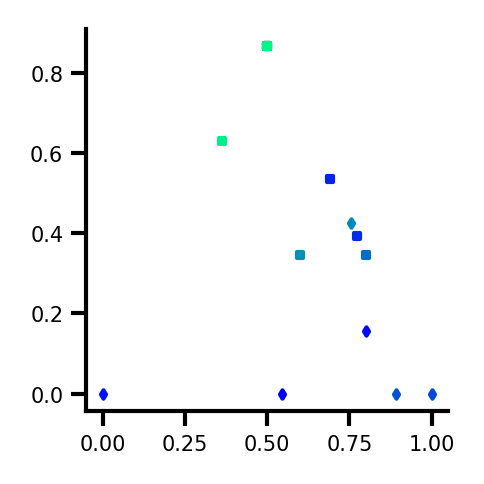

In [774]:
def scatter_triangle(points, labels=None, ax=None, vmin=0, vmax=1):

    if ax is None:
        fig, ax = plt.subplots(figsize=(1.5, 1.5))

    def _project(p):
        a = p[0]
        b = p[1]
        x = a + b/2
        y = np.sqrt(3) / 2  * b
        return np.array([x, y])

    x, y = list(zip(*[_project(p) for p in points]))

    for i in range(len(x)):
        if labels is None:
            ax.scatter(x[i], y[i], s=2, color='black')
        else:
            ax.scatter(x[i], y[i], s=2, color=rat_markers[labels[i]][0], marker=rat_markers[labels[i]][1])

scatter_triangle(s, labels)

# bootstrap confidence interval

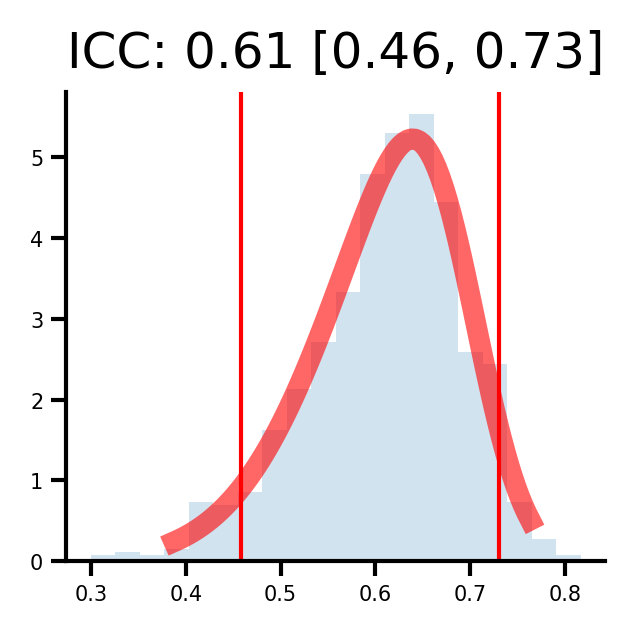

In [625]:
# bootstrap random rats
def bootstrap_ICC(var, animalList=animalList, num_bootstrap=1000, plot=False):
    icc_values = np.zeros(num_bootstrap)
    bootstrap_samples = []

    for _ in range(num_bootstrap):
        bootstrap_animals = np.random.choice(animalList, size=len(animalList), replace=True)
        bootstrap_sample = {animal: {} for animal in bootstrap_animals}
        
        for animal in bootstrap_animals:
            for cond, value in var[animal].items():
                bootstrap_sample[animal][cond] = value

        icc_values[_] = compute_ICC(bootstrap_sample, animalList=bootstrap_animals)[0]
        bootstrap_samples.append(bootstrap_sample)

    #fit skew normal
    a, loc, scale = stats.skewnorm.fit(icc_values)
    x = np.linspace(stats.skewnorm.ppf(0.01, a, loc, scale),
                    stats.skewnorm.ppf(0.99, a, loc, scale), 100)
    y = stats.skewnorm.pdf(x, a, loc, scale)

    lower_bound = np.percentile(icc_values, 5)
    upper_bound = np.percentile(icc_values, 95)

    if plot:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))
        ax.plot(x, y, 'r-', lw=5, alpha=0.6, label='skewnorm pdf')
        ax.hist(icc_values, bins=20, density=True, histtype='stepfilled', alpha=0.2)
        ax.axvline(lower_bound, color='red')
        ax.axvline(upper_bound, color='red')
        ax.set_title('ICC: {:.2f} [{:.2f}, {:.2f}]'.format(np.mean(icc_values), lower_bound, upper_bound))

    return icc_values


_ = bootstrap_ICC(alpha, animalList=animalList, num_bootstrap=1000, plot=True)